# Surprise Housing Company Australian Housing Market Case Study

#### Background
A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
For the same purpose, the company has collected a data set from the sale of houses in Australia.

#### Problem Statement
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


#### Goals
- Predict the actual value of the prospective properties and decide whether to invest in them or not
- Identify which variables are significant in predicting the price of a house
- Explain how well those variables describe the price of a house


## Step I: Reading and Understanding Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error

In [5]:
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
housing.drop(['Id'], axis = 1, inplace = True)

In [7]:
housing.shape

(1460, 80)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
housing.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

### Relabelling Categorical Values wherever Required

In [10]:
housing['MSSubClass'].nunique()

15

In [11]:
housing['MSSubClass'].replace(
{
20: " 1-STORY 1946 & NEWER ALL STYLES" , 
30: " 1-STORY 1945 & OLDER" , 
40: " 1-STORY W/FINISHED ATTIC ALL AGES" , 
45: " 1-1/2 STORY - UNFINISHED ALL AGES" , 
50: " 1-1/2 STORY FINISHED ALL AGES" , 
60: " 2-STORY 1946 & NEWER" , 
70: " 2-STORY 1945 & OLDER" , 
75: " 2-1/2 STORY ALL AGES" , 
80: " SPLIT OR MULTI-LEVEL" , 
85: " SPLIT FOYER" , 
90: " DUPLEX - ALL STYLES AND AGES" , 
120: " 1-STORY PUD (Planned Unit Development) - 1946 & NEWER" , 
150: " 1-1/2 STORY PUD - ALL AGES" , 
160: " 2-STORY PUD - 1946 & NEWER" , 
180: " PUD - MULTILEVEL - INCL SPLIT LEV/FOYER" , 
190: " 2 FAMILY CONVERSION - ALL STYLES AND AGES"
},inplace=True)

In [12]:
housing['MSSubClass'].nunique()

15

In [13]:
housing['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [14]:
housing['MSZoning'].replace(
{
"A": "Agriculture" , 
"C (all)": "Commercial" , 
"FV": "Floating Village Residential" , 
"I": "Industrial" , 
"RH": "Residential High Density" , 
"RL": "Residential Low Density" , 
"RP": "Residential Low Density Park " , 
"RM": "Residential Medium Density"
}
,inplace=True)

In [15]:
housing['MSZoning'].unique()

array(['Residential Low Density', 'Residential Medium Density',
       'Commercial', 'Floating Village Residential',
       'Residential High Density'], dtype=object)

In [16]:
housing['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [17]:
housing['Street'].replace(
{
"Grvl": "Street_Gravel",
"Pave": "Street_Paved"
}
,inplace=True)

In [18]:
housing['Street'].unique()

array(['Street_Paved', 'Street_Gravel'], dtype=object)

In [19]:
housing['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [20]:
housing['Alley'].fillna('Alley_No alley access',inplace=True)

In [21]:
housing['Alley'].unique()

array(['Alley_No alley access', 'Grvl', 'Pave'], dtype=object)

In [22]:
housing['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [23]:
housing['LotShape'].replace(
{
"Reg": "LotShape_Regular",
"IR1": "LotShape_Slightly irregular",
"IR2": "LotShape_Moderately Irregular",
"IR3": "LotShape_Irregular",
}
,inplace=True)

In [24]:
housing['LotShape'].nunique()

4

In [25]:
housing['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [26]:
housing['LandContour'].replace(
{
"Lvl": "LandContour_Near Flat/Level",
"Bnk": "LandContour_Banked",
"HLS": "LandContour_Hillside",
"Low": "LandContour_Depression",
}
,inplace=True)

In [27]:
housing['LandContour'].unique()

array(['LandContour_Near Flat/Level', 'LandContour_Banked',
       'LandContour_Depression', 'LandContour_Hillside'], dtype=object)

In [28]:
housing['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [29]:
housing['Utilities'].replace(
{
"AllPub": "Utilities_All public Utilities (E,G,W,& S)",
"NoSewr": "Utilities_Electricity, Gas, and Water (Septic Tank)",
"NoSeWa": "Utilities_Electricity and Gas Only",
"ELO": "Utilities_Electricity only",
}
,inplace=True)

In [30]:
housing['Utilities'].unique()

array(['Utilities_All public Utilities (E,G,W,& S)',
       'Utilities_Electricity and Gas Only'], dtype=object)

In [31]:
housing['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [32]:
housing['LotConfig'].replace(
{
"Inside": "LotConfig_Inside lot",
"Corner": "LotConfig_Corner lot",
"CulDSac": "LotConfig_Cul-de-sac",
"FR2": "LotConfig_Frontage on 2 sides of property",
"FR3": "LotConfig_Frontage on 3 sides of property",
}
,inplace=True)

In [33]:
housing['LotConfig'].unique()

array(['LotConfig_Inside lot',
       'LotConfig_Frontage on 2 sides of property',
       'LotConfig_Corner lot', 'LotConfig_Cul-de-sac',
       'LotConfig_Frontage on 3 sides of property'], dtype=object)

In [34]:
housing['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [35]:
housing['LandSlope'].replace(
{
"Gtl": "LandSlope_Gentle slope",
"Mod": "LandSlope_Moderate Slope  ",
"Sev": "LandSlope_Severe Slope",
}
,inplace=True)

In [36]:
housing['LandSlope'].unique()

array(['LandSlope_Gentle slope', 'LandSlope_Moderate Slope  ',
       'LandSlope_Severe Slope'], dtype=object)

In [37]:
housing['Neighborhood'].nunique()

25

In [38]:
housing['Neighborhood'].replace(
{
"Blmngtn": "Neighborhood_BloomingtonHeights",
"Blueste": "Neighborhood_Bluestem",
"BrDale": "Neighborhood_Briardale",
"BrkSide": "Neighborhood_Brookside",
"ClearCr": "Neighborhood_ClearCreek",
"CollgCr": "Neighborhood_CollegeCreek",
"Crawfor": "Neighborhood_Crawford",
"Edwards": "Neighborhood_Edwards",
"Gilbert": "Neighborhood_Gilbert",
"IDOTRR": "Neighborhood_IowaDOTandRailRoad",
"MeadowV": "Neighborhood_MeadowVillage",
"Mitchel": "Neighborhood_Mitchell",
"Names": "Neighborhood_NorthAmes",
"NoRidge": "Neighborhood_Northridge",
"NPkVill": "Neighborhood_NorthparkVilla",
"NridgHt": "Neighborhood_NorthridgeHeights",
"NWAmes": "Neighborhood_NorthwestAmes",
"OldTown": "Neighborhood_OldTown",
"SWISU": "Neighborhood_South&WestofIowaStateUniversity",
"Sawyer": "Neighborhood_Sawyer",
"SawyerW": "Neighborhood_SawyerWest",
"Somerst": "Neighborhood_Somerset",
"StoneBr": "Neighborhood_StoneBrook",
"Timber": "Neighborhood_Timberland",
"Veenker": "Neighborhood_Veenker",

}
,inplace=True)

In [39]:
housing['Neighborhood'].nunique()

25

In [40]:
housing['Condition1'].nunique()

9

In [41]:
housing['Condition1'].replace(
{
"Artery": "Condition1_Adjacent to arterial street",
"Feedr": "Condition1_Adjacent to feeder street",
"Norm": "Condition1_Normal  ",
"RRNn": "Condition1_Within 200' of North-South Railroad",
"RRAn": "Condition1_Adjacent to North-South Railroad",
"PosN": "Condition1_Near positive off-site feature--park, greenbelt, etc.",
"PosA": "Condition1_Adjacent to postive off-site feature",
"RRNe": "Condition1_Within 200' of East-West Railroad",
"RRAe": "Condition1_Adjacent to East-West Railroad",
}
,inplace=True)

In [42]:
housing['Condition1'].nunique()

9

In [43]:
housing['Condition2'].nunique()

8

In [44]:
housing['Condition2'].replace(
{
"Artery": "Condition2_Adjacent to arterial street",
"Feedr": "Condition2_Adjacent to feeder street",
"Norm": "Condition2_Normal  ",
"RRNn": "Condition2_Within 200' of North-South Railroad",
"RRAn": "Condition2_Adjacent to North-South Railroad",
"PosN": "Condition2_Near positive off-site feature--park, greenbelt, etc.",
"PosA": "Condition2_Adjacent to postive off-site feature",
"RRNe": "Condition2_Within 200' of East-West Railroad",
"RRAe": "Condition2_Adjacent to East-West Railroad",
}
,inplace=True)

In [45]:
housing['Condition2'].nunique()

8

In [46]:
housing['BldgType'].nunique()

5

In [47]:
housing['BldgType'].replace(
{
"1Fam": "BldgType_1Fam",
"2FmCon": "BldgType_2FmCon",
"Duplx": "BldgType_Duplx",
"TwnhsE": "BldgType_TwnhsE",
"TwnhsI": "BldgType_TwnhsI",
}
,inplace=True)

In [48]:
housing['BldgType'].nunique()

5

In [49]:
housing['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [50]:
housing['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [51]:
housing['OverallQual'].replace(
{
10:"Very Excellent",
9:"Excellent",
8:"Very Good",
7:"Good",
6:"Above Average",
5:"Average",
4:"Below Average",
3:"Fair",
2:"Poor",
1:"Very Poor",
}
,inplace=True)

In [52]:
housing['OverallQual'].unique()

array(['Good', 'Above Average', 'Very Good', 'Average', 'Excellent',
       'Below Average', 'Very Excellent', 'Fair', 'Very Poor', 'Poor'],
      dtype=object)

In [53]:
housing['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [54]:
housing['OverallCond'].replace(
{
10:"Very Excellent",
9:"Excellent",
8:"Very Good",
7:"Good",
6:"Above Average",
5:"Average",
4:"Below Average",
3:"Fair",
2:"Poor",
1:"Very Poor",
}
,inplace=True)

In [55]:
housing['OverallCond'].unique()

array(['Average', 'Very Good', 'Above Average', 'Good', 'Below Average',
       'Poor', 'Fair', 'Excellent', 'Very Poor'], dtype=object)

In [56]:
housing['YearBuilt'].values

array([2003, 1976, 2001, ..., 1941, 1950, 1965], dtype=int64)

In [57]:
housing['YearBuilt'] = housing['YearBuilt'].astype(object)
housing['YearBuilt'].values

array([2003, 1976, 2001, ..., 1941, 1950, 1965], dtype=object)

In [58]:
housing['YearRemodAdd'] = housing['YearRemodAdd'].astype(object)
housing['YearRemodAdd'].values

array([2003, 1976, 2002, ..., 2006, 1996, 1965], dtype=object)

In [59]:
housing['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [60]:
housing['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [61]:
housing['Exterior1st'].nunique()

15

In [62]:
housing['Exterior1st'].replace(
{
"AsbShng": "Exterior1st_AsbShng",
"AsphShn": "Exterior1st_AsphShn",
"BrkComm": "Exterior1st_BrkComm",
"BrkFace": "Exterior1st_BrkFace",
"CBlock": "Exterior1st_CBlock",
"CemntBd": "Exterior1st_CemntBd",
"HdBoard": "Exterior1st_HdBoard",
"ImStucc": "Exterior1st_ImStucc",
"MetalSd": "Exterior1st_MetalSd",
"Other": "Exterior1st_Other",
"Plywood": "Exterior1st_Plywood",
"PreCast": "Exterior1st_PreCast",
"Stone": "Exterior1st_Stone",
"Stucco": "Exterior1st_Stucco",
"VinylSd": "Exterior1st_VinylSd",
"Wd Sdng": "Exterior1st_Wd Sdng",
"WdShing": "Exterior1st_WdShing",

}
,inplace=True)

In [63]:
housing['Exterior1st'].nunique()

15

In [64]:
housing['Exterior2nd'].nunique()

16

In [65]:
housing['Exterior2nd'].replace(
{
"AsbShng": "Exterior2nd_AsbShng",
"AsphShn": "Exterior2nd_AsphShn",
"BrkComm": "Exterior2nd_BrkComm",
"BrkFace": "Exterior2nd_BrkFace",
"CBlock": "Exterior2nd_CBlock",
"CemntBd": "Exterior2nd_CemntBd",
"HdBoard": "Exterior2nd_HdBoard",
"ImStucc": "Exterior2nd_ImStucc",
"MetalSd": "Exterior2nd_MetalSd",
"Other": "Exterior2nd_Other",
"Plywood": "Exterior2nd_Plywood",
"PreCast": "Exterior2nd_PreCast",
"Stone": "Exterior2nd_Stone",
"Stucco": "Exterior2nd_Stucco",
"VinylSd": "Exterior2nd_VinylSd",
"Wd Sdng": "Exterior2nd_Wd Sdng",
"WdShing": "Exterior2nd_WdShing",
}
,inplace=True)

In [66]:
housing['Exterior2nd'].nunique()

16

In [67]:
housing['MasVnrType'].nunique()

4

In [68]:
housing['MasVnrType'].replace(
{
"BrkCmn": "MasVnrType_BrkCmn",
"BrkFace": "MasVnrType_BrkFace",
"CBlock": "MasVnrType_CBlock",
"None": "MasVnrType_None",
"Stone": "MasVnrType_Stone",
}
,inplace=True)

In [69]:
housing['MasVnrType'].nunique()

4

In [70]:
housing['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [71]:
housing['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [72]:
housing['Foundation'].nunique()

6

In [73]:
housing['Foundation'].replace(
{
"BrkTil": "Foundation_BrkTil",
"CBlock": "Foundation_CBlock",
"PConc": "Foundation_PConc",
"Slab": "Foundation_Slab",
"Stone": "Foundation_Stone",
"Wood": "Foundation_Wood",
}
,inplace=True)

In [74]:
housing['Foundation'].nunique()

6

In [75]:
housing['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [76]:
housing['BsmtQual'].fillna("No Basement",inplace=True)

housing['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [77]:
housing['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [78]:
housing['BsmtCond'].fillna("No Basement",inplace=True)

housing['BsmtCond'].unique()

array(['TA', 'Gd', 'No Basement', 'Fa', 'Po'], dtype=object)

In [79]:
housing['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [80]:
housing['BsmtExposure'].fillna("No Basement",inplace=True)

housing['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'No Basement'], dtype=object)

In [81]:
housing['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [82]:
housing['BsmtFinType1'].fillna("No Basement",inplace=True)

housing['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No Basement', 'LwQ'],
      dtype=object)

In [83]:
housing['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [84]:
housing['BsmtFinType2'].fillna("No Basement",inplace=True)

housing['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'No Basement', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

In [85]:
housing['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [86]:
housing['FireplaceQu'].fillna("No Fireplace",inplace=True)

housing['FireplaceQu'].unique()

array(['No Fireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [87]:
housing['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [88]:
housing['GarageType'].fillna("No Garage",inplace=True)

housing['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No Garage', 'Basment',
       '2Types'], dtype=object)

In [89]:
housing['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [90]:
housing['GarageFinish'].fillna("No Garage",inplace=True)

housing['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'No Garage'], dtype=object)

In [91]:
housing['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [92]:
housing['GarageQual'].fillna("No Garage",inplace=True)

housing['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Ex', 'Po'], dtype=object)

In [93]:
housing['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [94]:
housing['GarageCond'].fillna("No Garage",inplace=True)

housing['GarageCond'].unique()

array(['TA', 'Fa', 'No Garage', 'Gd', 'Po', 'Ex'], dtype=object)

In [95]:
housing['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [96]:
housing['PoolQC'].fillna("No Pool",inplace=True)

housing['PoolQC'].unique()

array(['No Pool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [97]:
housing['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [98]:
housing['Fence'].fillna("No Fence",inplace=True)

housing['Fence'].unique()

array(['No Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [99]:
housing['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [100]:
housing['MiscFeature'].fillna("None",inplace=True)

housing['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [101]:
housing['MoSold'] = housing['MoSold'].astype(object)
housing['MoSold'].values

array([2, 5, 9, ..., 5, 4, 6], dtype=object)

In [102]:
housing['YrSold'] = housing['YrSold'].astype(object)
housing['YrSold'].values

array([2008, 2007, 2008, ..., 2010, 2010, 2008], dtype=object)

In [103]:
housing['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [104]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(object)
housing['GarageYrBlt'].values

array([2003.0, 1976.0, 2001.0, ..., 1941.0, 1950.0, 1965.0], dtype=object)

In [105]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

## Step II: Data Cleaning

In [106]:
# Check the percentage of missing values

In [107]:
NA_Percentage_columns = (  (housing.isna().sum() / housing.shape[0])*100  )
NA_Percentage_columns[NA_Percentage_columns>20].index.tolist()

[]

In [108]:
# Since Percentage of missing values in the columns are less than 20%, there is no need for droping any columns

In [109]:
NA_Percentage_rows = (  (housing.isna().sum(axis=1) / housing.shape[0])*100  )
NA_Percentage_rows[NA_Percentage_rows>20].index.tolist()

[]

In [110]:
# Since Percentage of missing values in the row are less than 20%, there is no need for droping any rows as well

In [111]:
NA_Percentage_columns[NA_Percentage_columns>0].index.tolist()


['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [112]:
housing[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt']].describe()

LotFrontage   MasVnrArea
count  1201.000000  1452.000000
mean     70.049958   103.685262
std      24.284752   181.066207
min      21.000000     0.000000
25%      59.000000     0.000000
50%      69.000000     0.000000
75%      80.000000   166.000000
max     313.000000  1600.000000

In [113]:
import seaborn as sns

In [114]:
# LotFrontage Imputation

<AxesSubplot:ylabel='LotFrontage'>

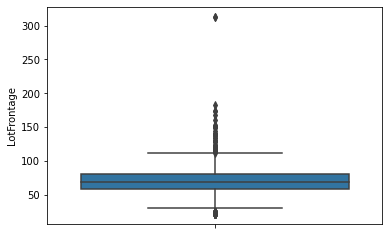

In [115]:
sns.boxplot(y= housing['LotFrontage'])

In [116]:
#Since there are many outliers using median imputation

housing["LotFrontage"].fillna(housing["LotFrontage"].median(),inplace=True)

<AxesSubplot:ylabel='LotFrontage'>

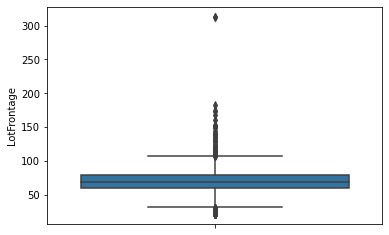

In [117]:
sns.boxplot(y=housing["LotFrontage"])

In [118]:
# MasVnrType Imputation

<AxesSubplot:xlabel='MasVnrType', ylabel='Count'>

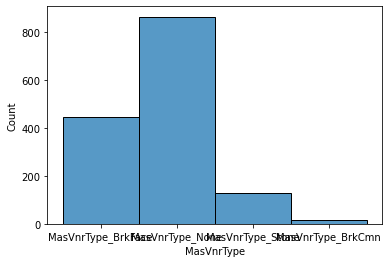

In [119]:
sns.histplot(housing["MasVnrType"])

In [120]:
housing['MasVnrType'].unique()

array(['MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'MasVnrType_BrkCmn', nan], dtype=object)

In [121]:
housing["MasVnrType"].replace(np.nan, housing["MasVnrType"].mode()[0],inplace=True)

In [122]:
housing['MasVnrType'].unique()

array(['MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'MasVnrType_BrkCmn'], dtype=object)

<AxesSubplot:xlabel='MasVnrType', ylabel='Count'>

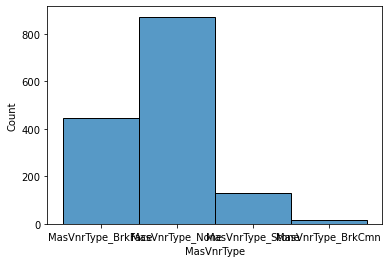

In [123]:
sns.histplot(housing["MasVnrType"])

In [124]:
# MasVnrArea Imputation

<AxesSubplot:ylabel='MasVnrArea'>

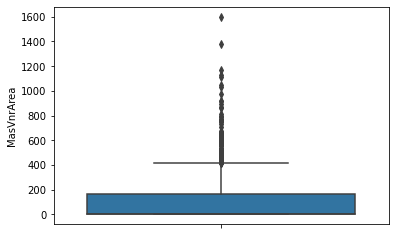

In [125]:
sns.boxplot(y=housing["MasVnrArea"])

In [126]:
housing["MasVnrArea"].shape

(1460,)

In [127]:
housing["MasVnrArea"].median()

0.0

<AxesSubplot:ylabel='MasVnrArea'>

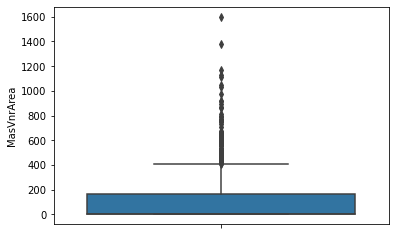

In [128]:
#Since there are many outliers using median imputation

housing["MasVnrArea"].replace(np.nan,housing["MasVnrArea"].median(),inplace=True)
sns.boxplot(y=housing["MasVnrArea"])

In [129]:
# Electrical Imputation

In [130]:
housing["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

<AxesSubplot:xlabel='Electrical', ylabel='Count'>

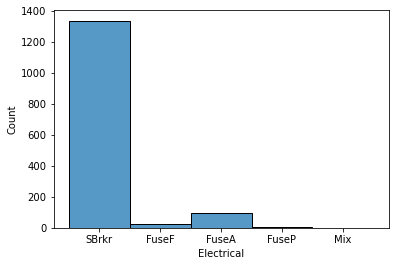

In [131]:
housing["Electrical"].replace(np.nan,housing["Electrical"].mode()[0],inplace=True)
sns.histplot(housing["Electrical"])

In [132]:
housing['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [133]:
# GarageYrBlt Imputation

In [134]:
housing["GarageYrBlt"].unique()

array([2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0,
       1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0,
       1970.0, 1967.0, 1958.0, 1930.0, 2002.0, 1968.0, 2007.0, 2008.0,
       1957.0, 1920.0, 1966.0, 1959.0, 1995.0, 1954.0, 1953.0, nan,
       1983.0, 1977.0, 1997.0, 1985.0, 1963.0, 1981.0, 1964.0, 1999.0,
       1935.0, 1990.0, 1945.0, 1987.0, 1989.0, 1915.0, 1956.0, 1948.0,
       1974.0, 2009.0, 1950.0, 1961.0, 1921.0, 1900.0, 1979.0, 1951.0,
       1969.0, 1936.0, 1975.0, 1971.0, 1923.0, 1984.0, 1926.0, 1955.0,
       1986.0, 1988.0, 1916.0, 1932.0, 1972.0, 1918.0, 1980.0, 1924.0,
       1996.0, 1940.0, 1949.0, 1994.0, 1910.0, 1978.0, 1982.0, 1992.0,
       1925.0, 1941.0, 2010.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0,
       1952.0, 1928.0, 1922.0, 1934.0, 1906.0, 1914.0, 1946.0, 1908.0,
       1929.0, 1933.0], dtype=object)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

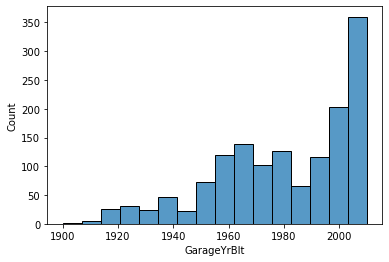

In [135]:
housing["GarageYrBlt"].replace(np.nan,housing["GarageYrBlt"].mode()[0],inplace=True)
sns.histplot(housing["GarageYrBlt"])

In [136]:
housing["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1983., 1977., 1997., 1985., 1963.,
       1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [137]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

## Step 2: Visualising the Data


#### Visualising Numeric Variables


In [138]:
#Categorical columns
categorical_col = housing.select_dtypes(include='object').columns
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [139]:
# Numeric columns
continuous_col = housing.select_dtypes(exclude='object').columns
continuous_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

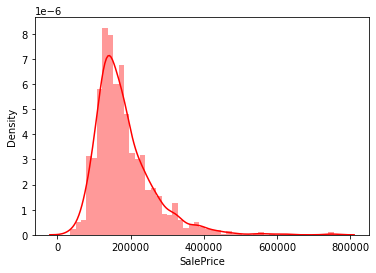

In [140]:
##Target Variable
plt.figure()
sns.distplot(housing['SalePrice'],color='red')
plt.show()

In [141]:
housing.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521  ...   
std     441.866955   438.705324   386.587738   436.528436     48.623081  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     223.000000   795.750000   882.000000     0.000000      0.000000  ...   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000  ...   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000  ...   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000  

[8 rows x 30 columns]

In [142]:
# IQR to remove the outlier

Q1 = housing[continuous_col].quantile(0.05)
Q3 = housing[continuous_col].quantile(0.95)
IQR = Q3 - Q1

housing = housing[~((housing[continuous_col] < (Q1 - 1.5 * IQR)) |(housing[continuous_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [143]:
housing.describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1266.000000   1266.000000  1266.000000  1266.000000  1266.000000   
mean     69.081359   9640.176935   103.954186   441.757504    40.281201   
std      19.976837   4133.746732   173.174685   428.430328   137.986440   
min      21.000000   1300.000000     0.000000     0.000000     0.000000   
25%      60.000000   7500.000000     0.000000     0.000000     0.000000   
50%      69.000000   9356.500000     0.000000   387.500000     0.000000   
75%      78.750000  11433.250000   168.750000   719.000000     0.000000   
max     182.000000  36500.000000  1129.000000  2188.000000   972.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1266.000000  1266.000000  1266.000000  1266.000000        1266.0  ...   
mean    574.886256  1056.924961  1143.785150   336.422591           0.0  ...   
std     439.848270   397.931851   367.996322   424.218030           0.0  ...   
min       0.000000     0.000000   334.000000     0.000000           0.0  ...   
25%     242.500000   799.250000   864.250000     0.000000           0.0  ...   
50%     483.500000   990.000000  1072.000000     0.000000           0.0  ...   
75%     808.000000  1276.750000  1362.000000   720.000000           0.0  ...   
max    2336.000000  3206.000000  3228.000000  1818.000000           0.0  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1266.000000  1266.000000  1266.000000  1266.000000    1266.000000   
mean      1.783570   475.955766    93.585308    45.843602      21.109795   
std       0.730314   208.283388   120.249869    60.675897      59.192870   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   331.500000     0.000000     0.000000       0.000000   
50%       2.000000   478.000000     0.000000    27.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1390.000000   736.000000   364.000000     386.000000   

       3SsnPorch  ScreenPorch  PoolArea  MiscVal      SalePrice  
count     1266.0  1266.000000    1266.0   1266.0    1266.000000  
mean         0.0    14.796998       0.0      0.0  181610.662717  
std          0.0    53.234175       0.0      0.0   75827.202320  
min          0.0     0.000000       0.0      0.0   35311.000000  
25%          0.0     0.000000       0.0      0.0  131000.000000  
50%          0.0     0.000000       0.0      0.0  165000.000000  
75%          0.0     0.000000       0.0      0.0  215000.000000  
max          0.0   396.000000       0.0      0.0  611657.000000  

[8 rows x 30 columns]

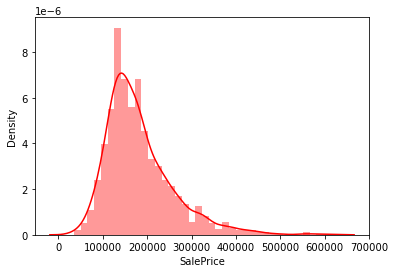

In [144]:
##Target Variable
plt.figure()
sns.distplot(housing['SalePrice'],color='red')
plt.show()

#### Univariate Analysis

---------------- MSSubClass -------------------


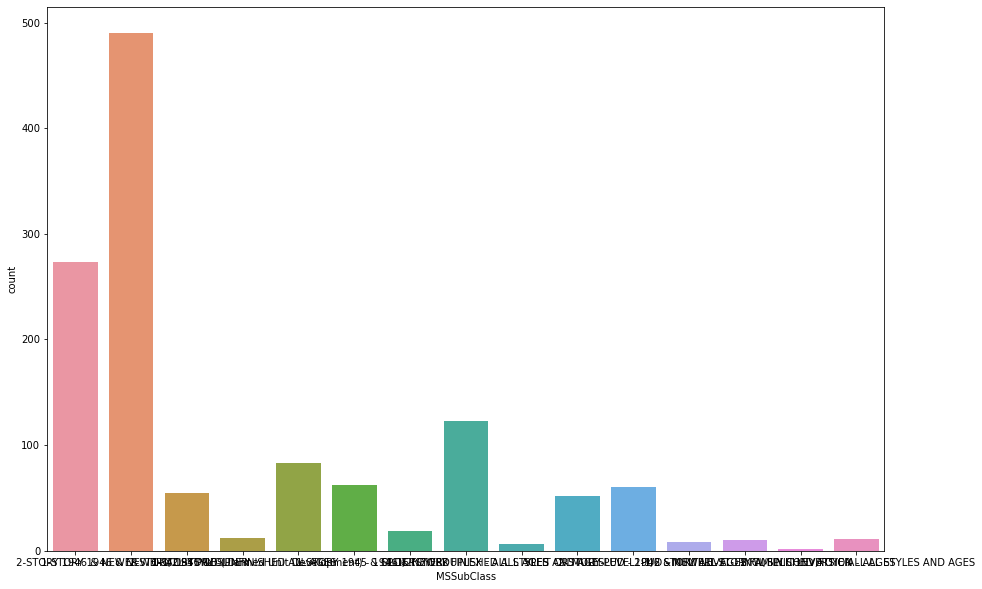

---------------- MSZoning -------------------


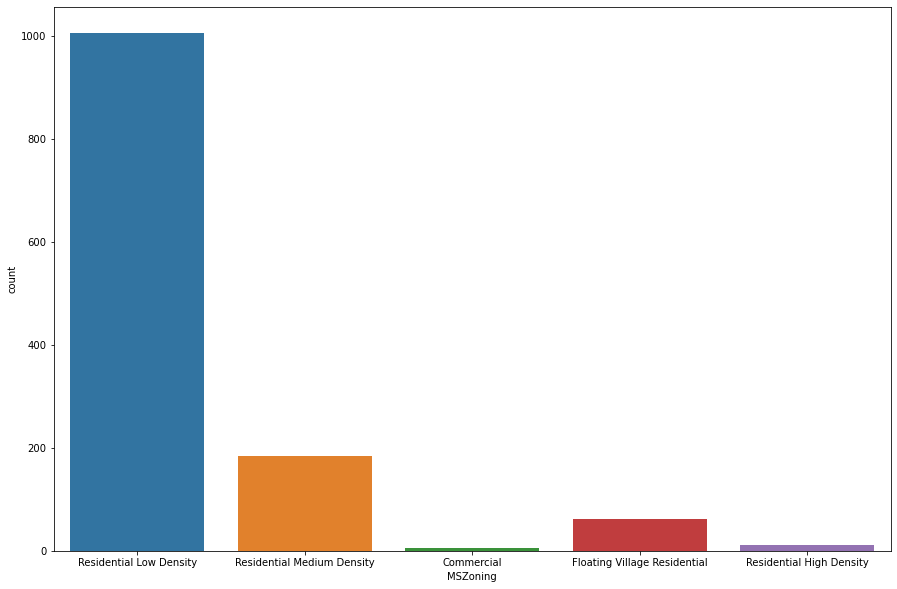

---------------- Street -------------------


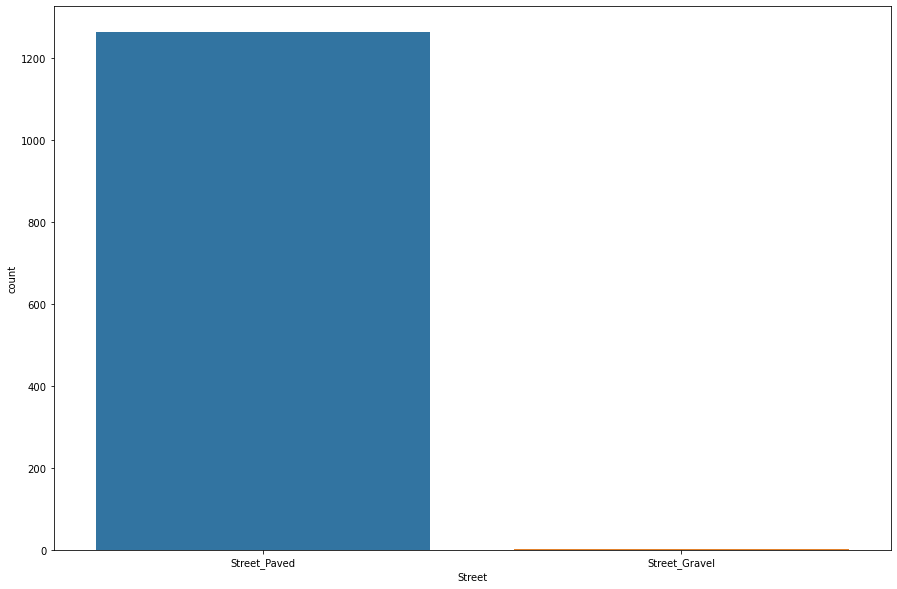

---------------- Alley -------------------


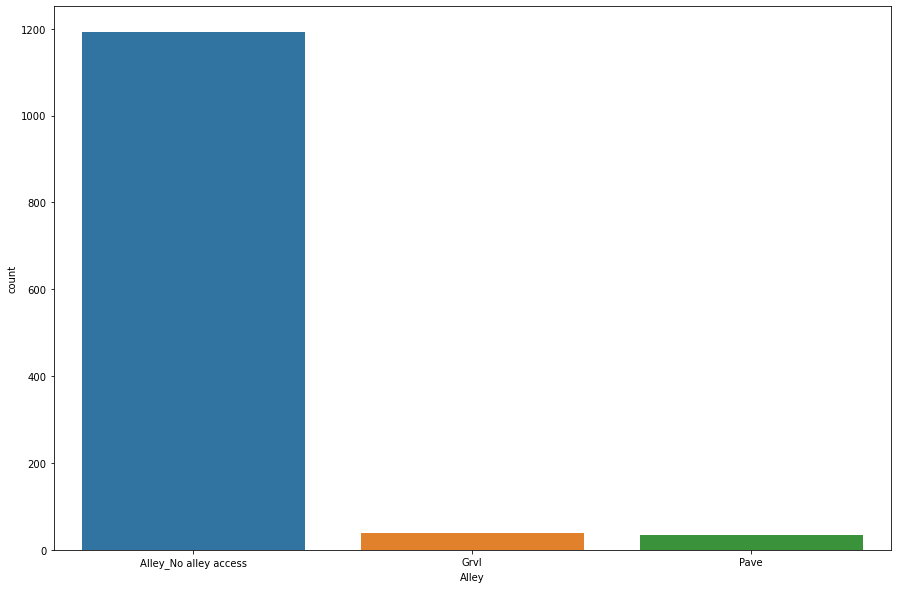

---------------- LotShape -------------------


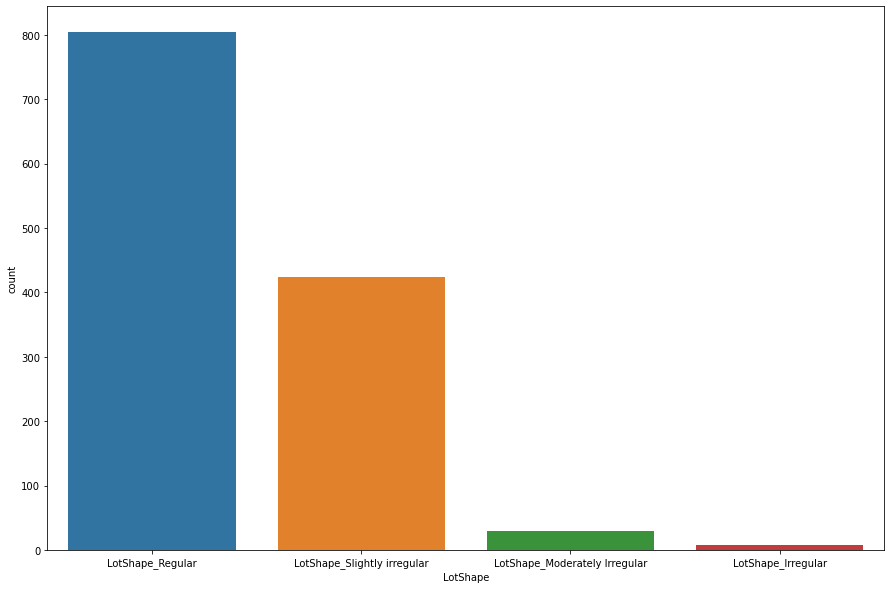

---------------- LandContour -------------------


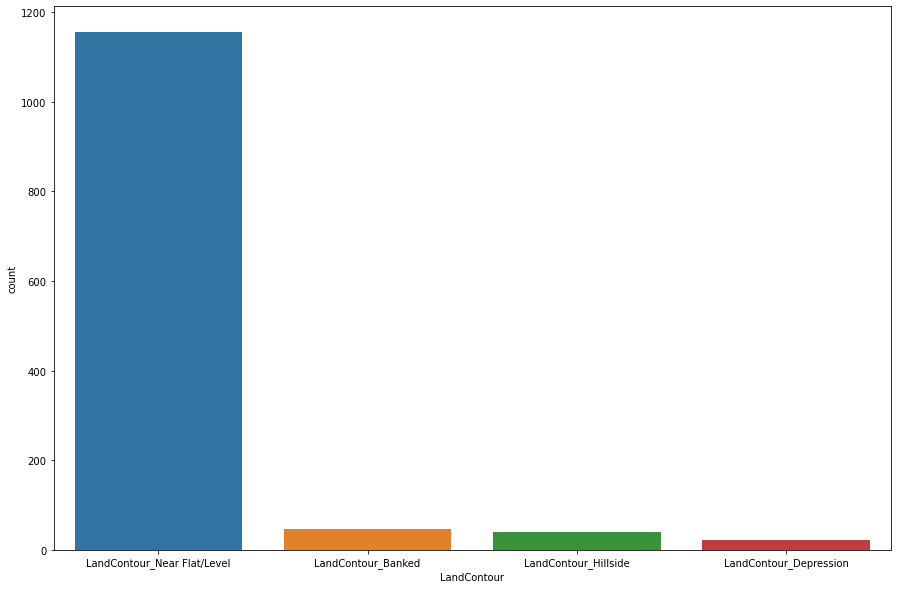

---------------- Utilities -------------------


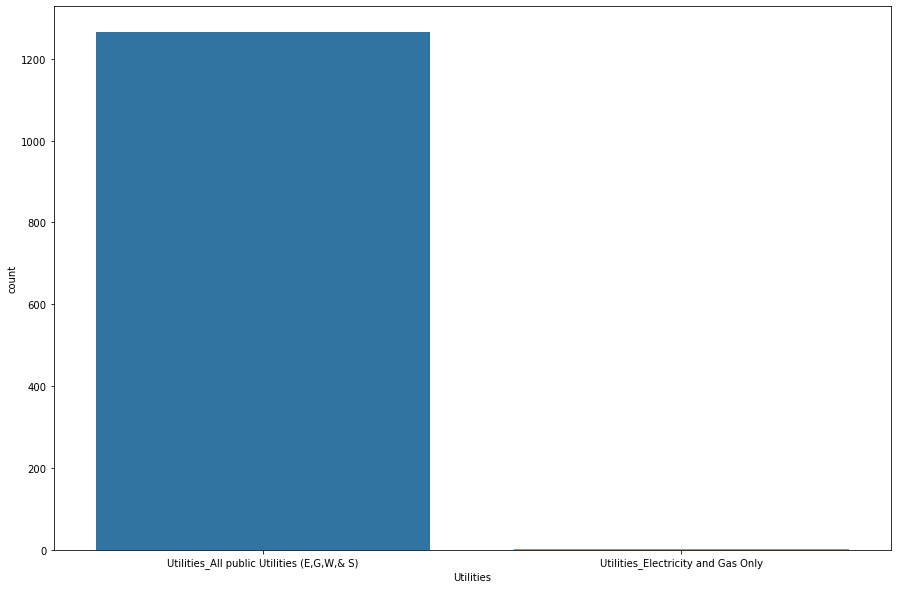

---------------- LotConfig -------------------


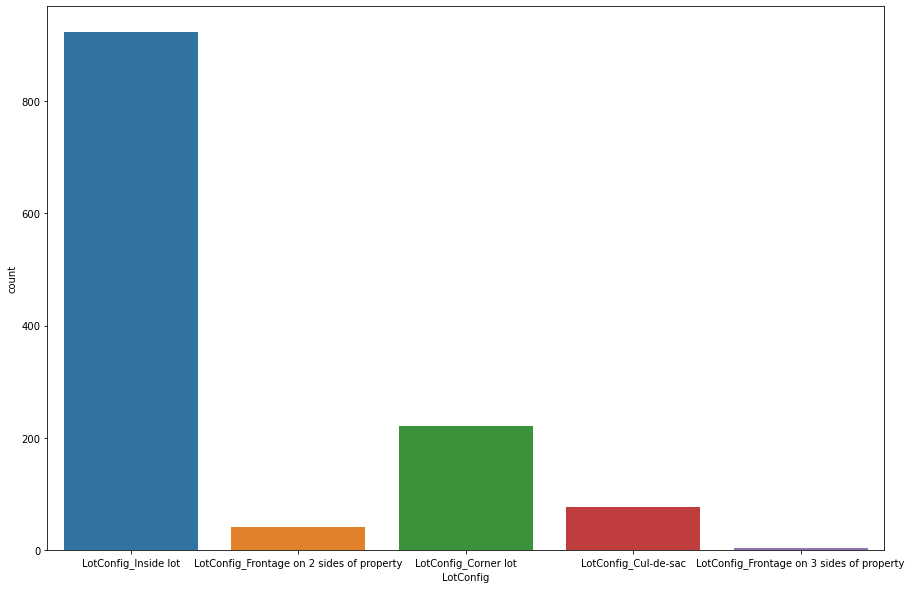

---------------- LandSlope -------------------


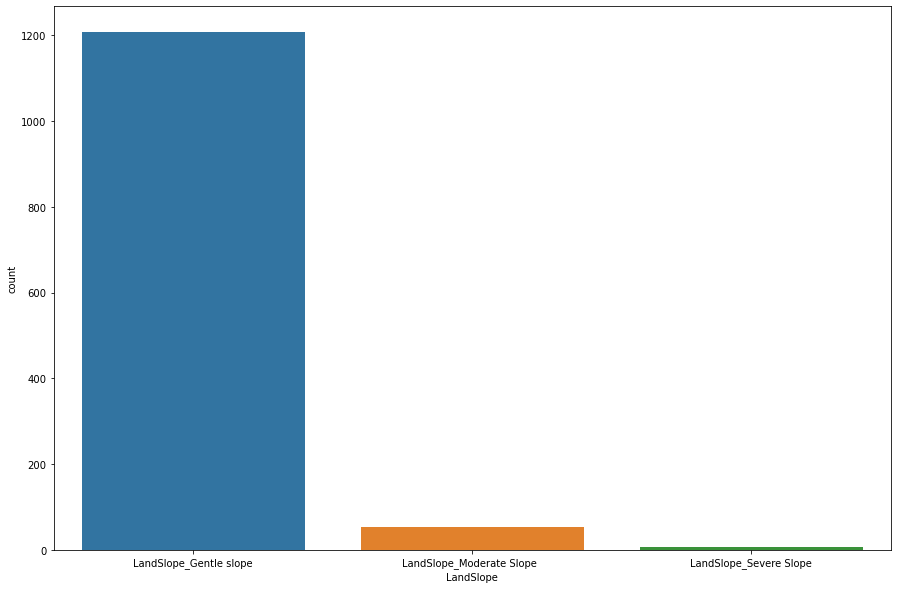

---------------- Neighborhood -------------------


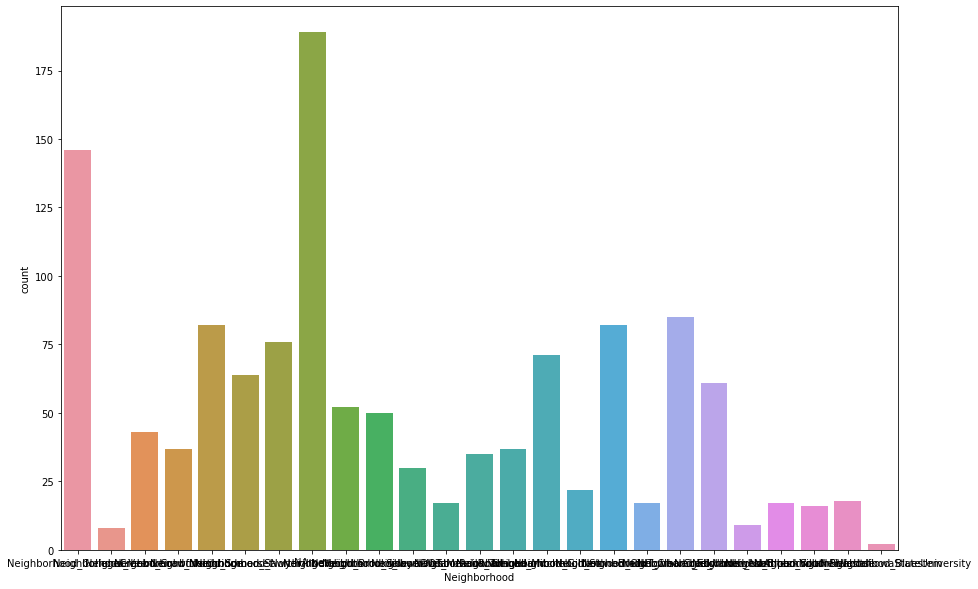

---------------- Condition1 -------------------


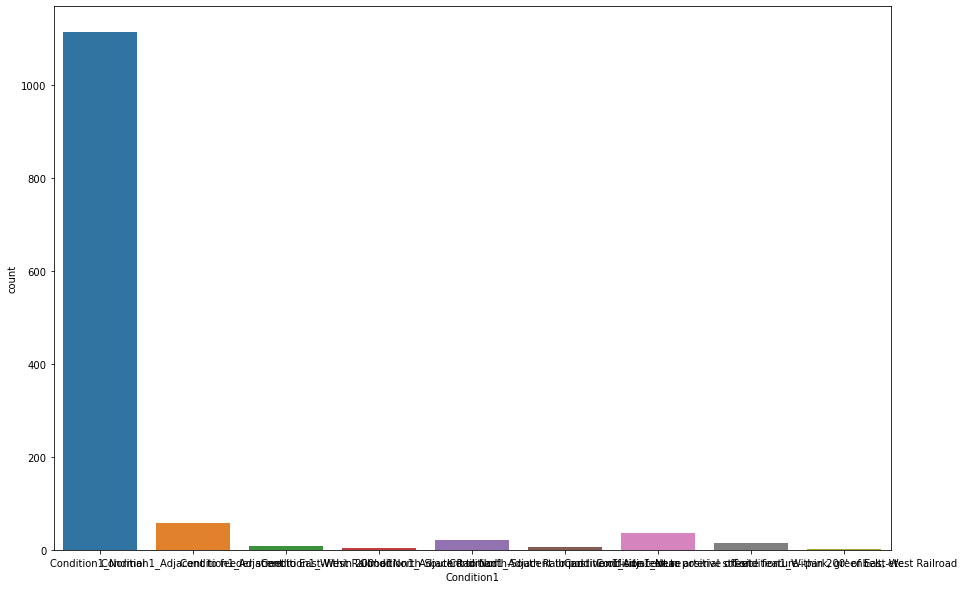

---------------- Condition2 -------------------


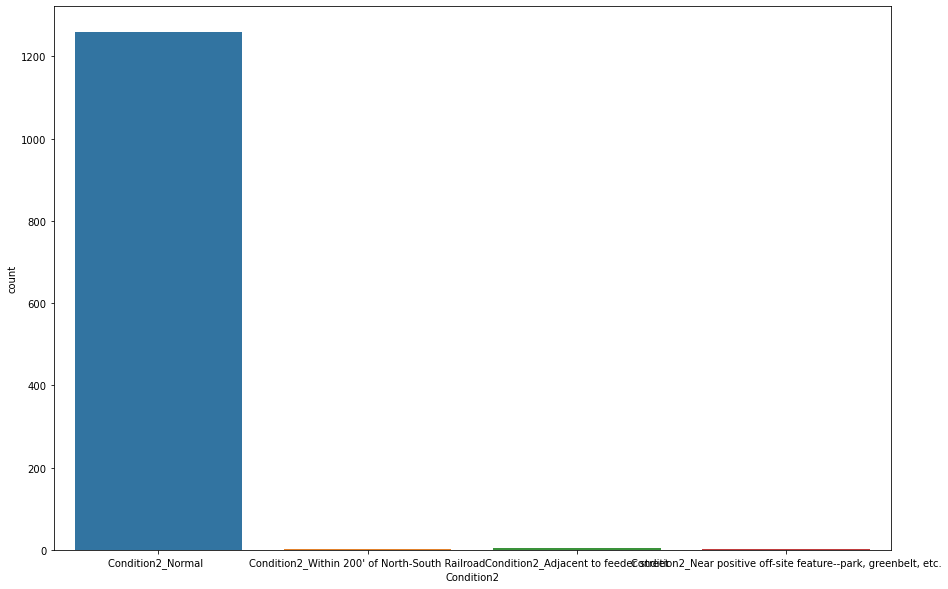

---------------- BldgType -------------------


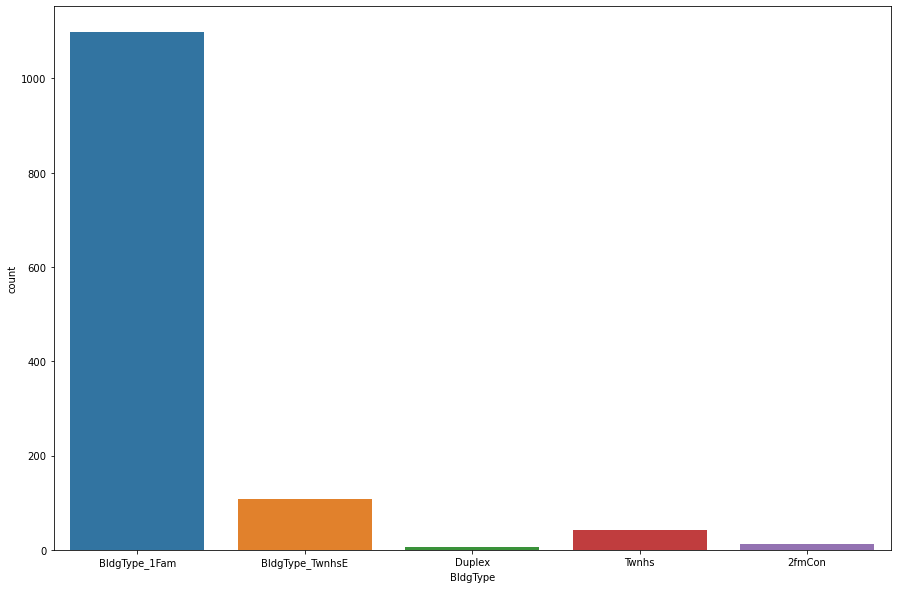

---------------- HouseStyle -------------------


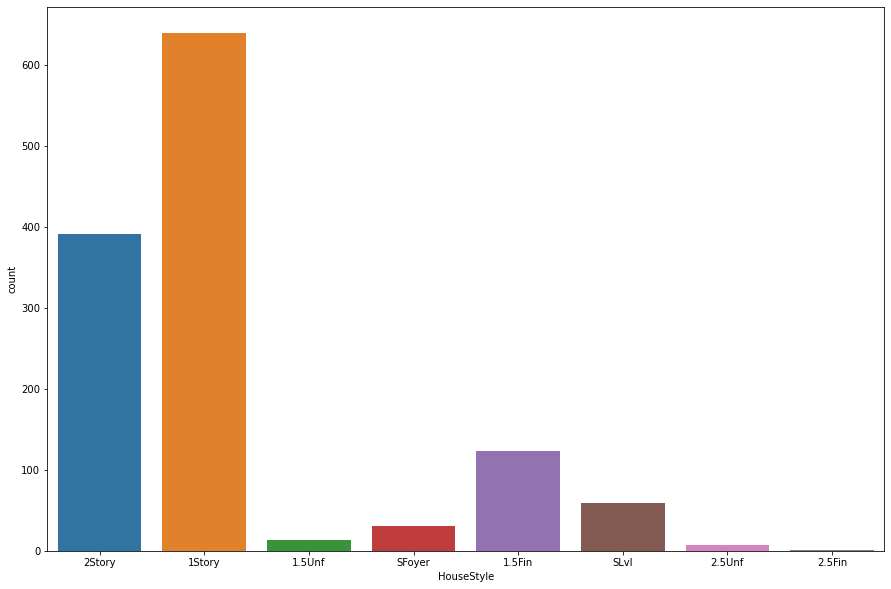

---------------- OverallQual -------------------


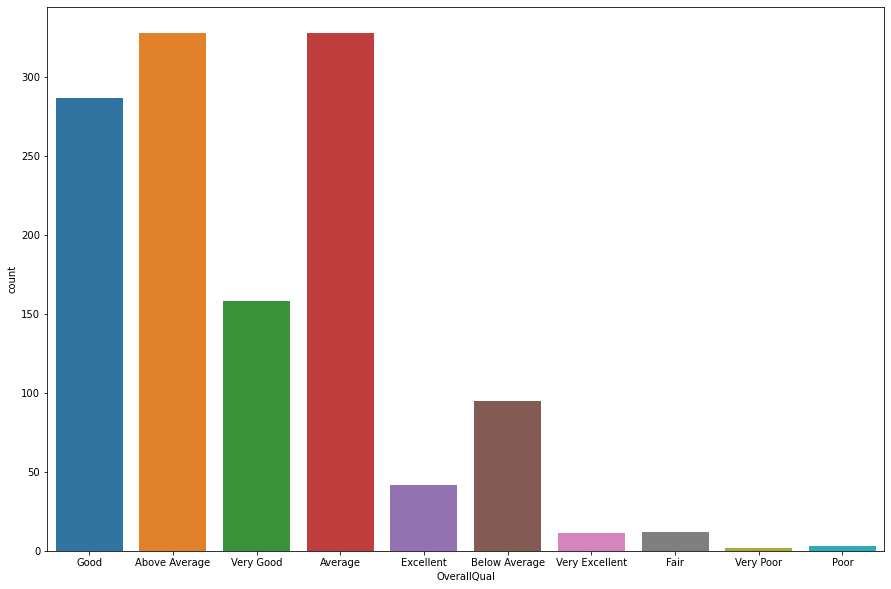

---------------- OverallCond -------------------


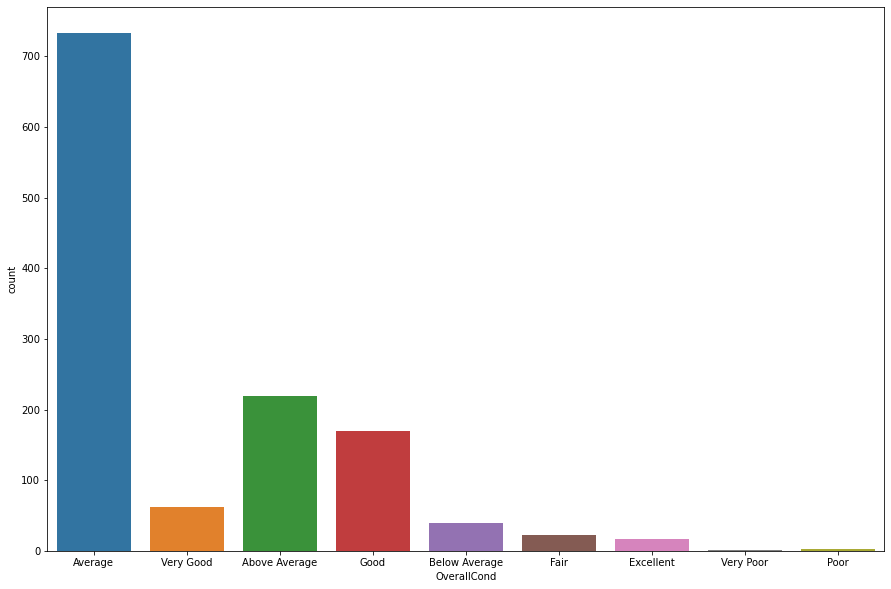

---------------- YearBuilt -------------------


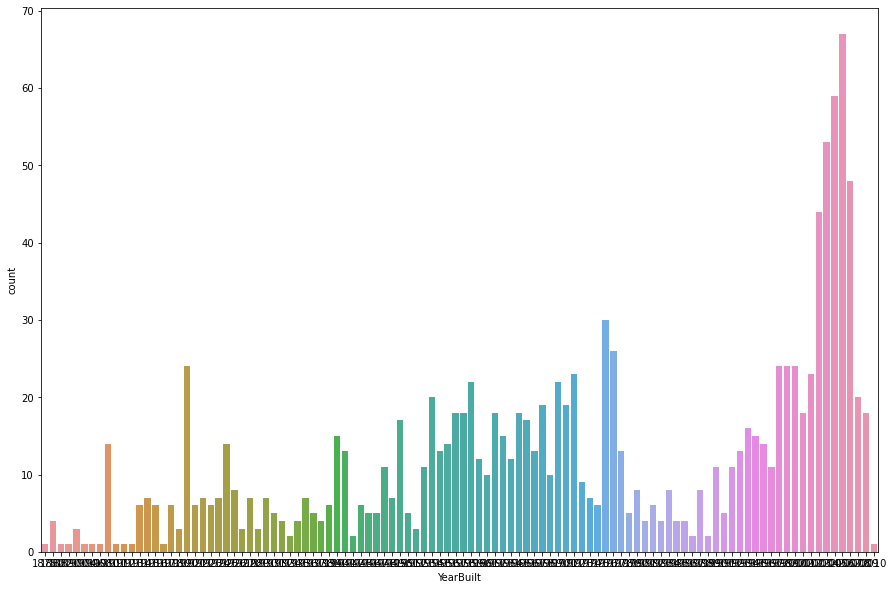

---------------- YearRemodAdd -------------------


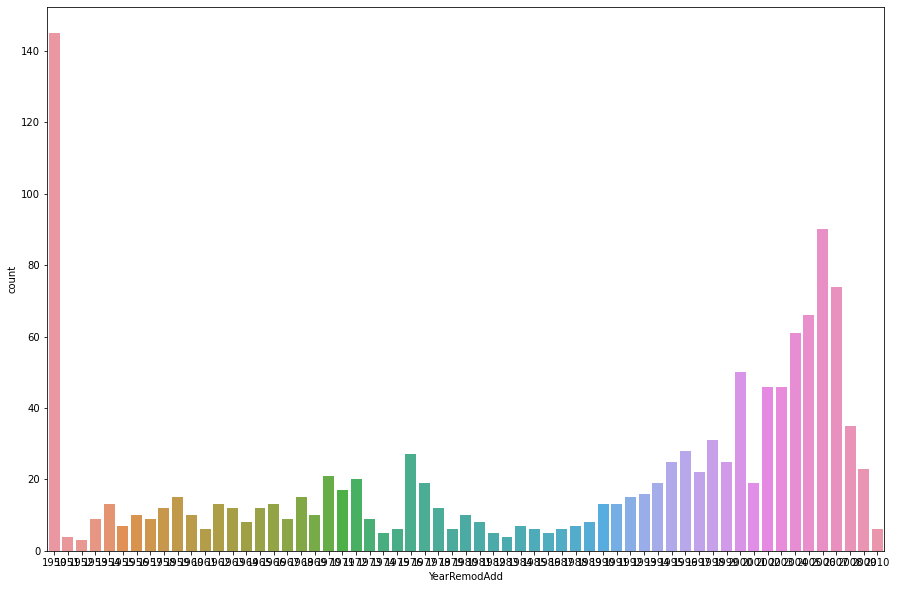

---------------- RoofStyle -------------------


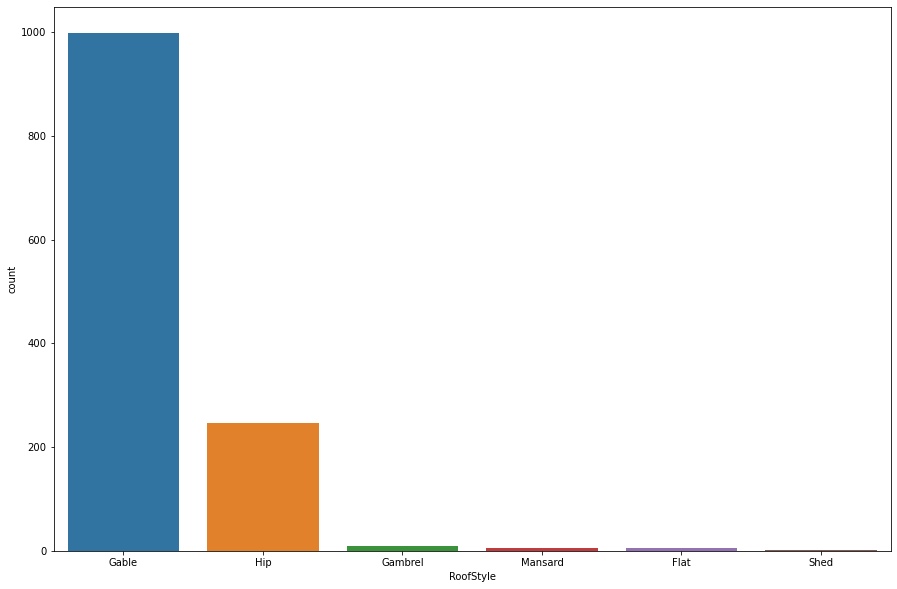

---------------- RoofMatl -------------------


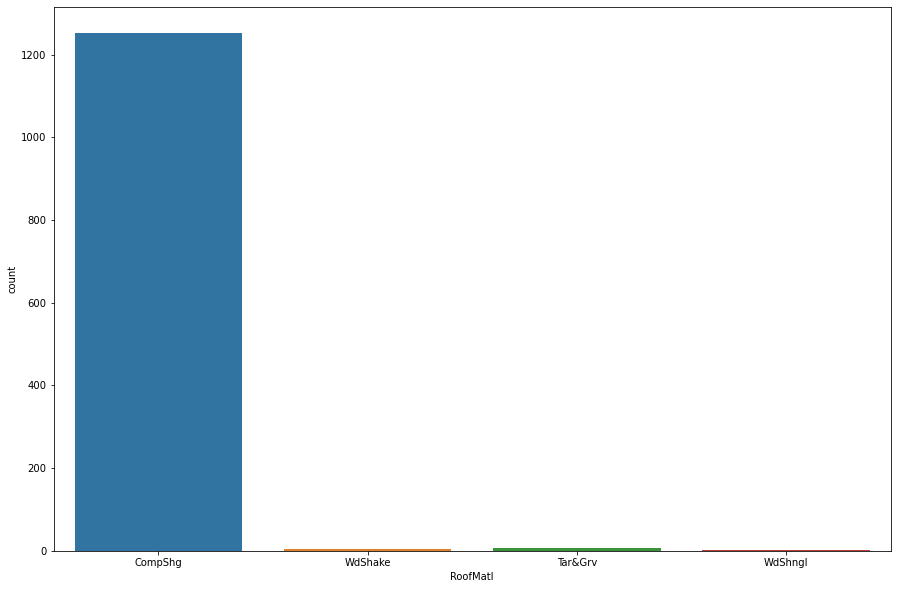

---------------- Exterior1st -------------------


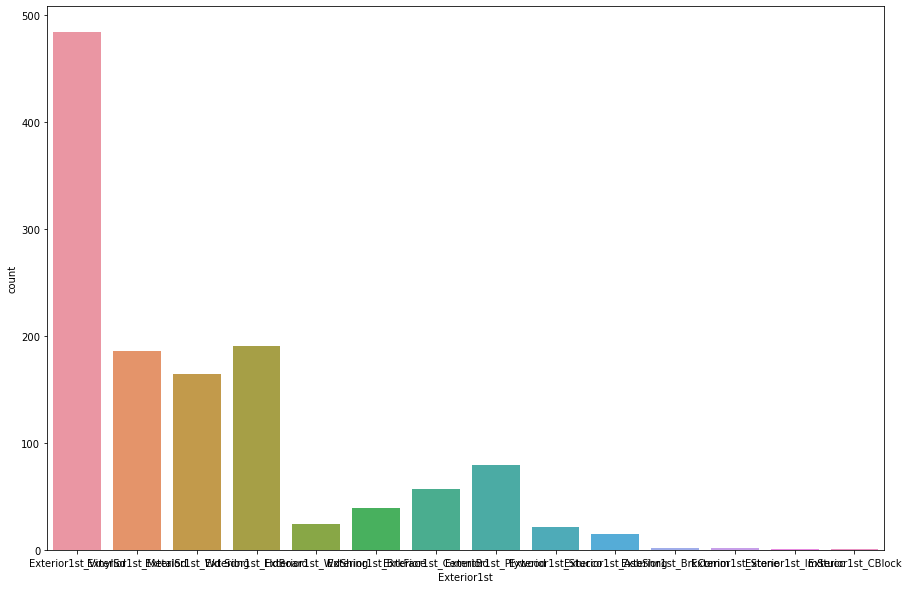

---------------- Exterior2nd -------------------


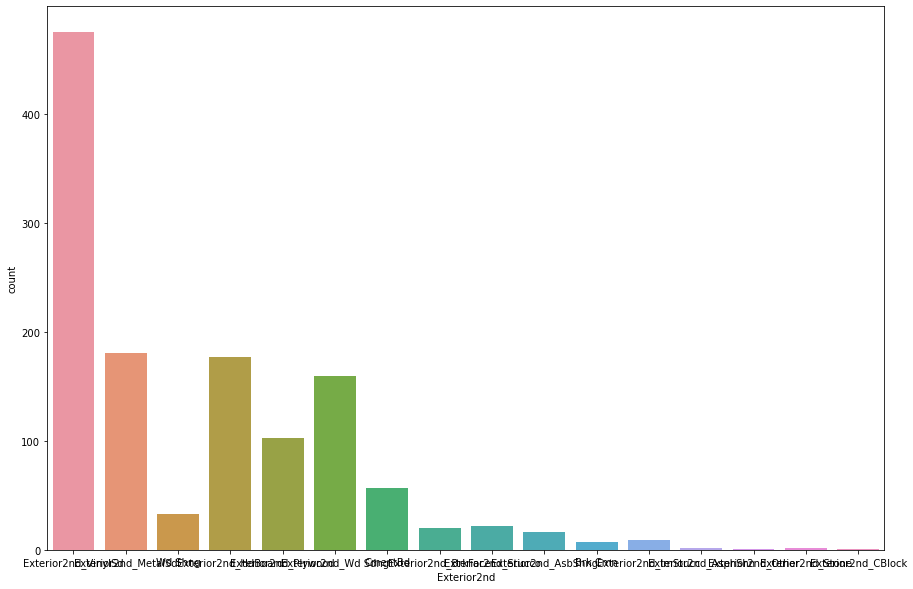

---------------- MasVnrType -------------------


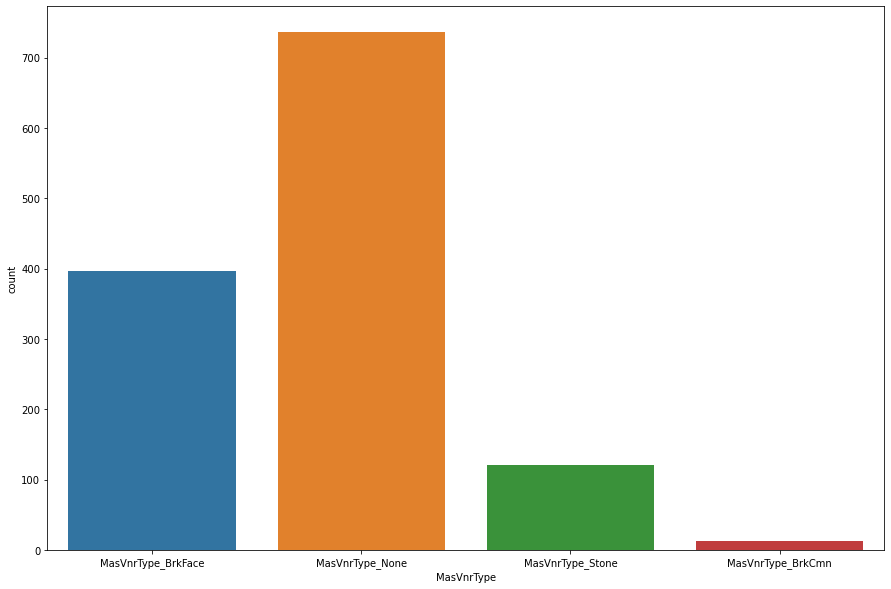

---------------- ExterQual -------------------


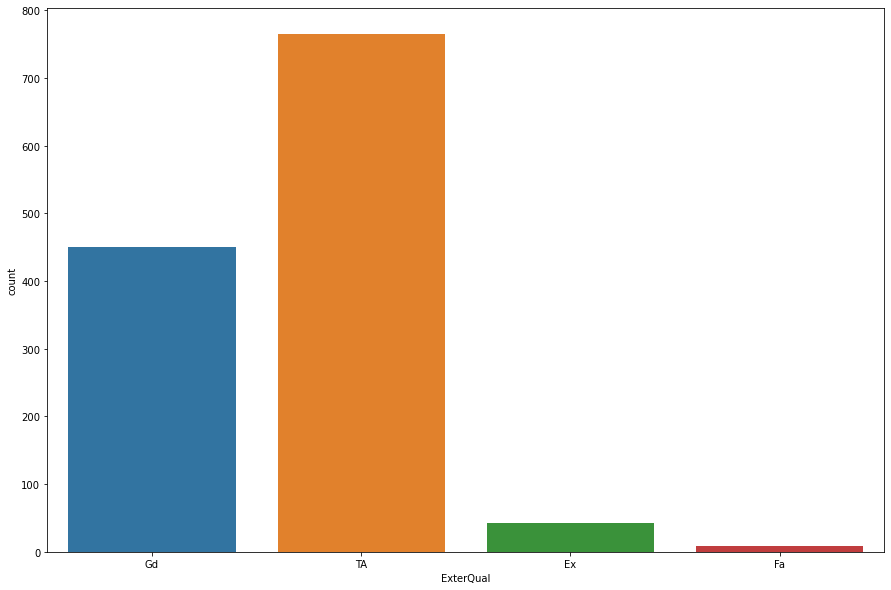

---------------- ExterCond -------------------


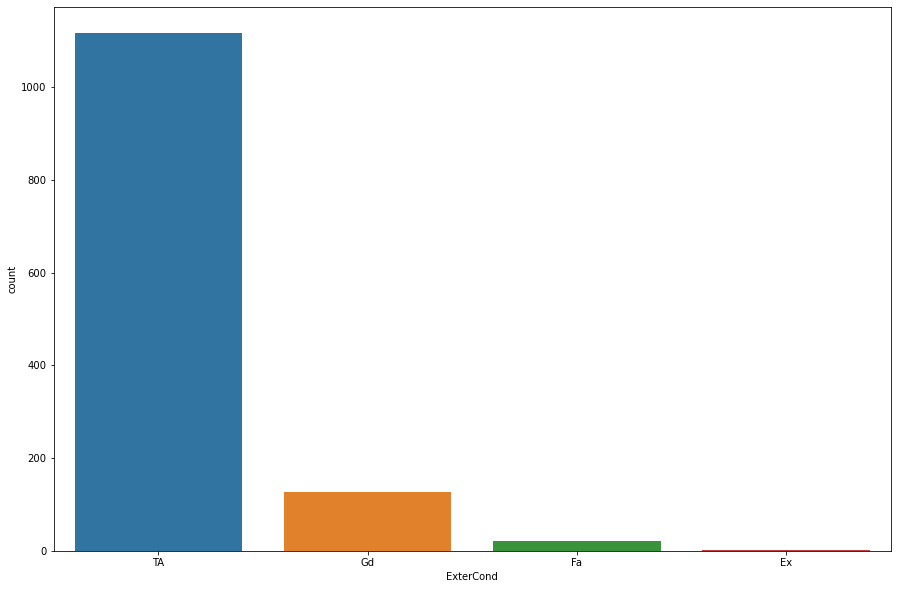

---------------- Foundation -------------------


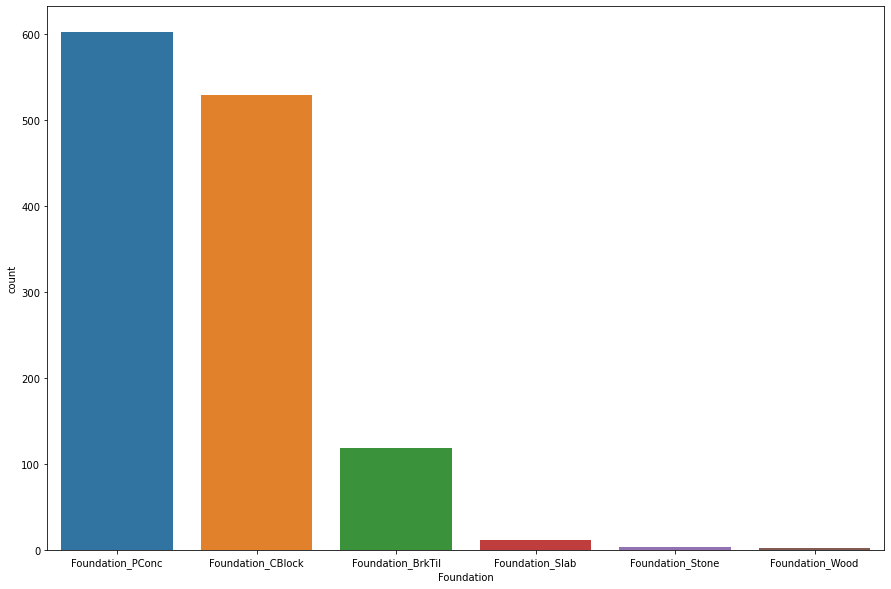

---------------- BsmtQual -------------------


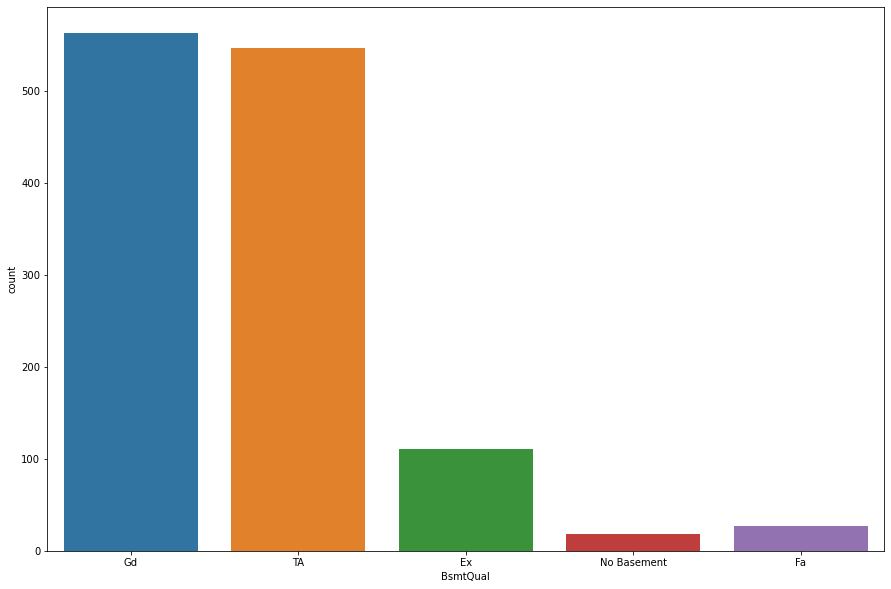

---------------- BsmtCond -------------------


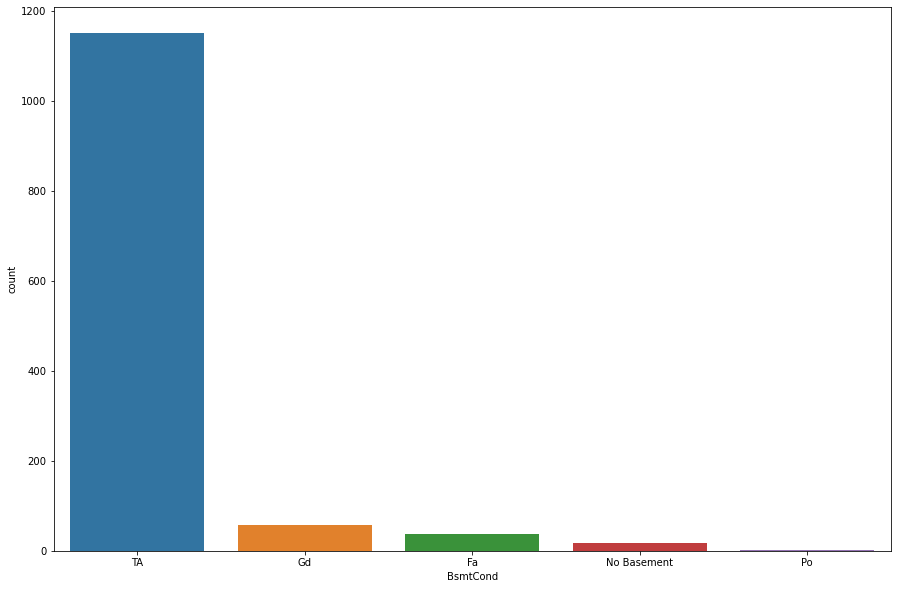

---------------- BsmtExposure -------------------


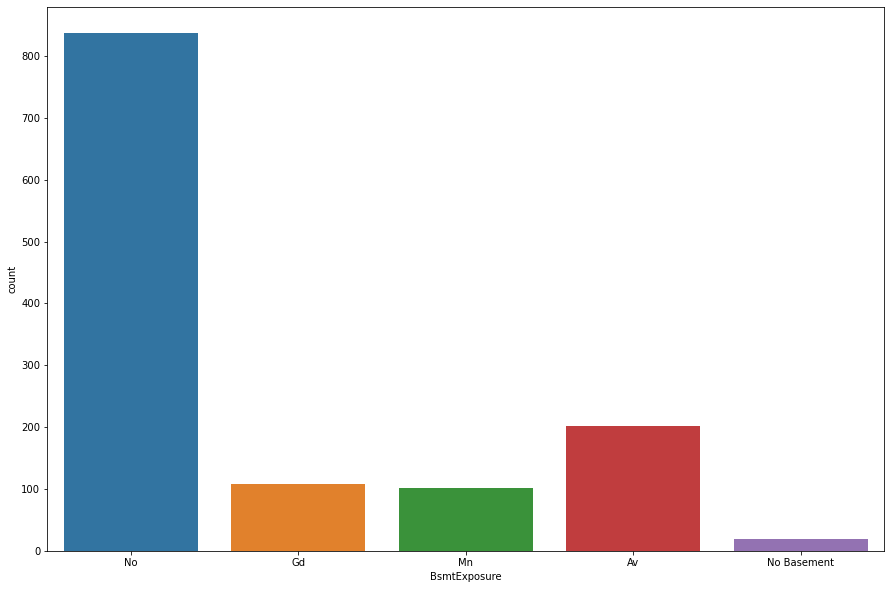

---------------- BsmtFinType1 -------------------


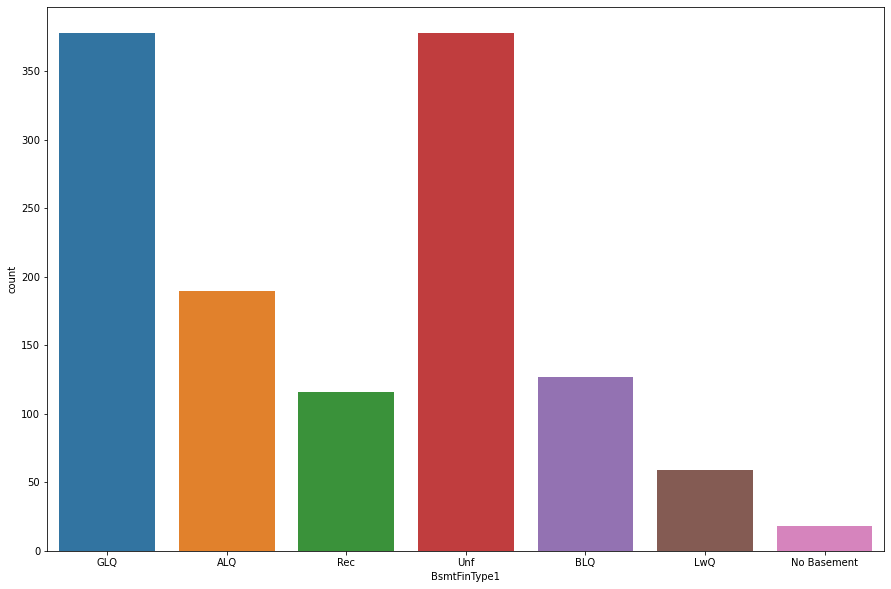

---------------- BsmtFinType2 -------------------


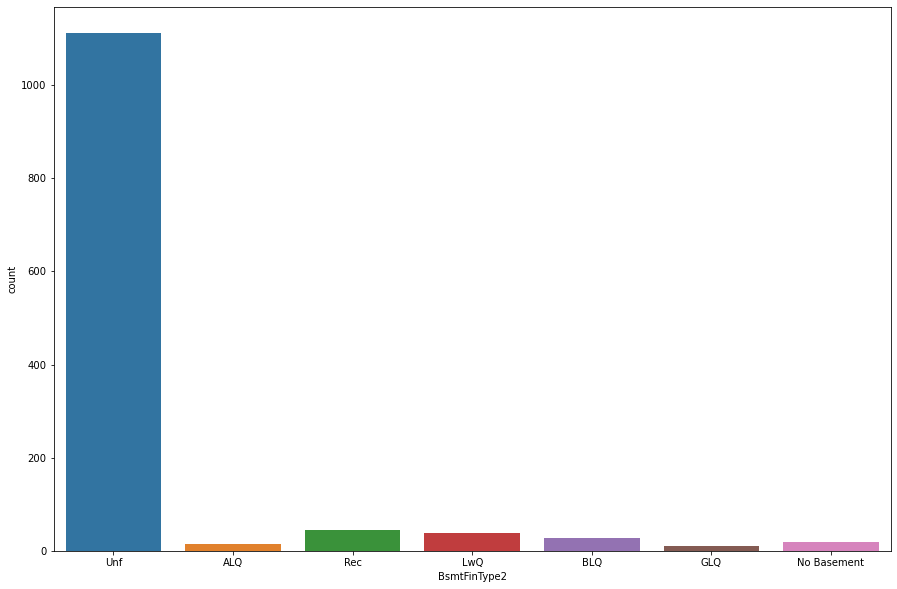

---------------- Heating -------------------


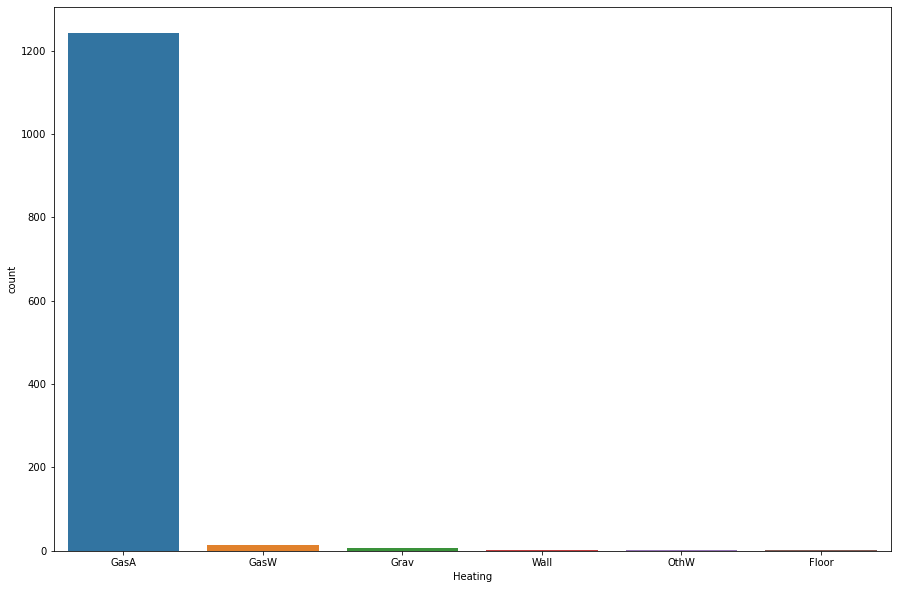

---------------- HeatingQC -------------------


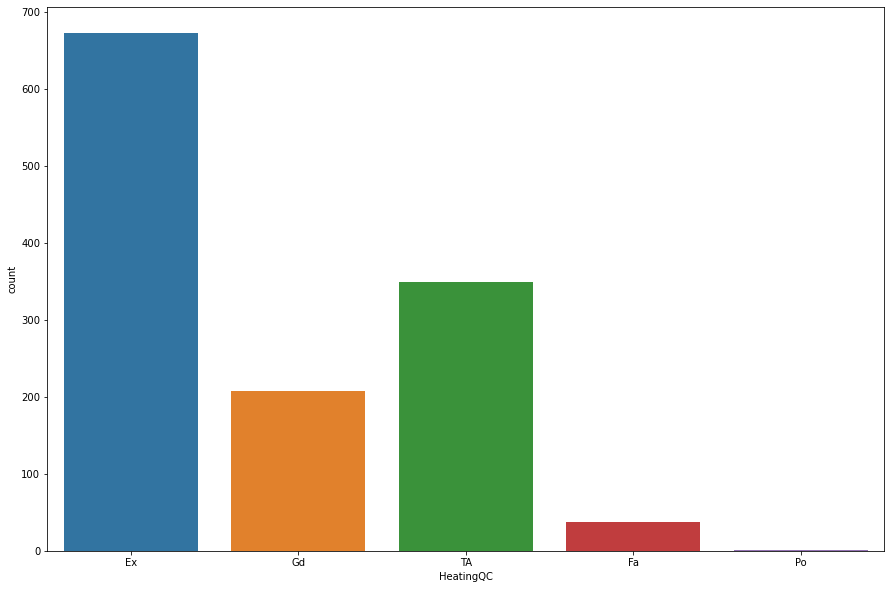

---------------- CentralAir -------------------


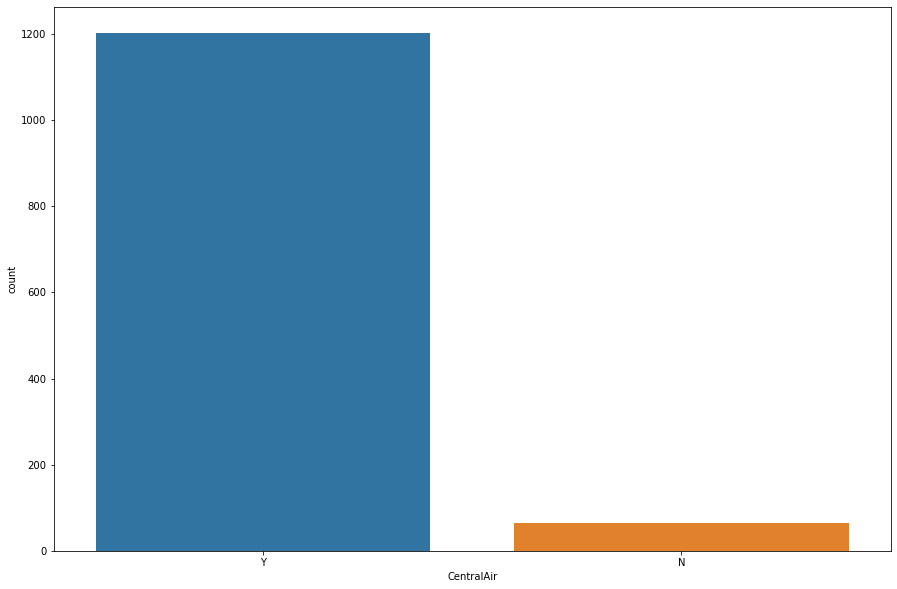

---------------- Electrical -------------------


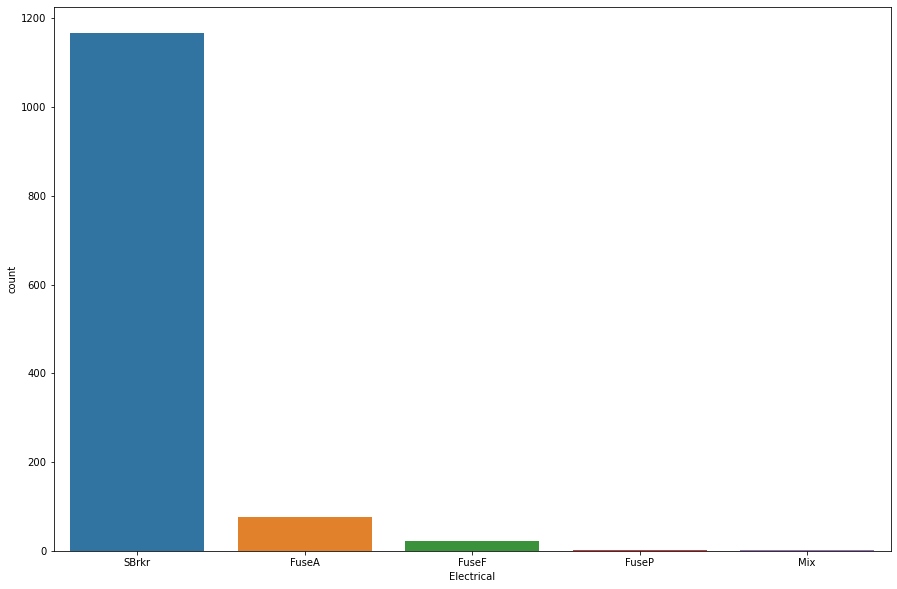

---------------- KitchenQual -------------------


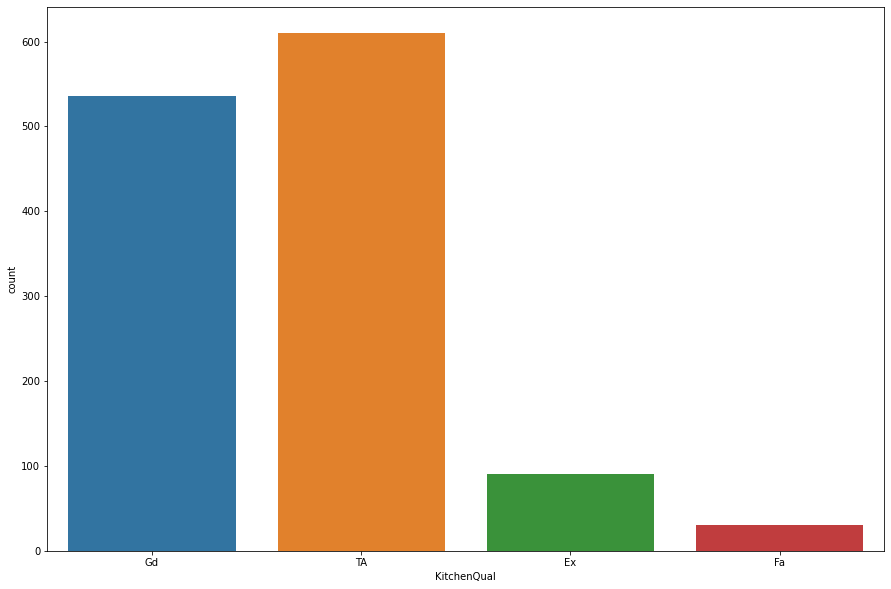

---------------- Functional -------------------


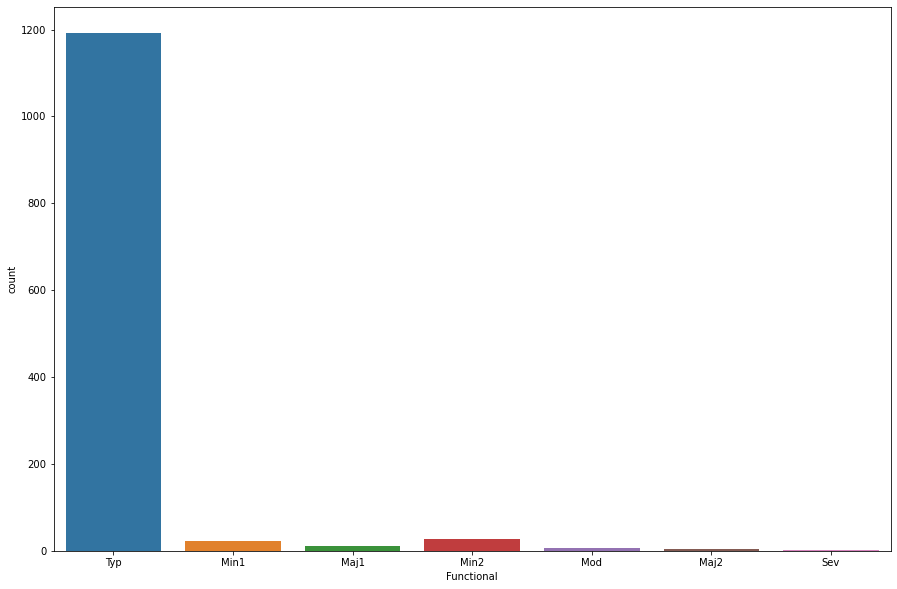

---------------- FireplaceQu -------------------


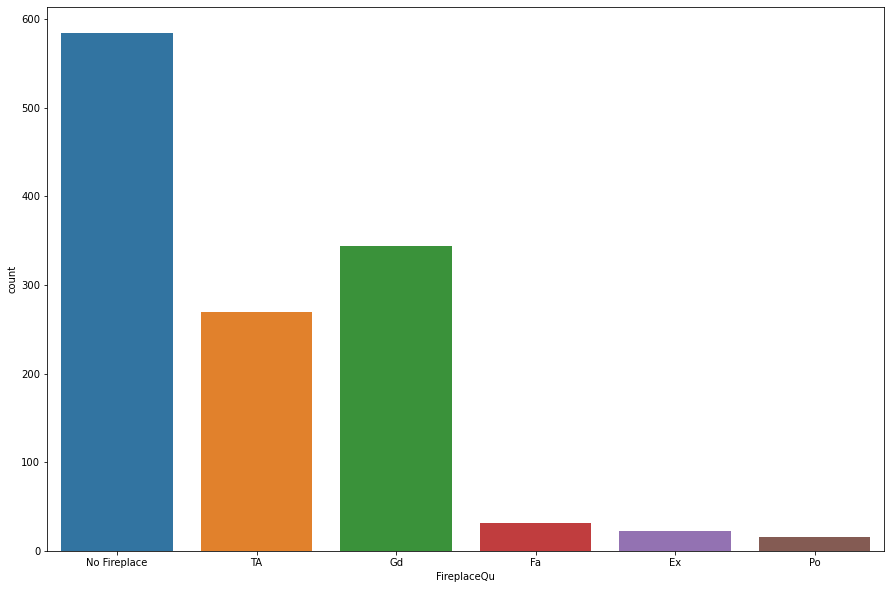

---------------- GarageType -------------------


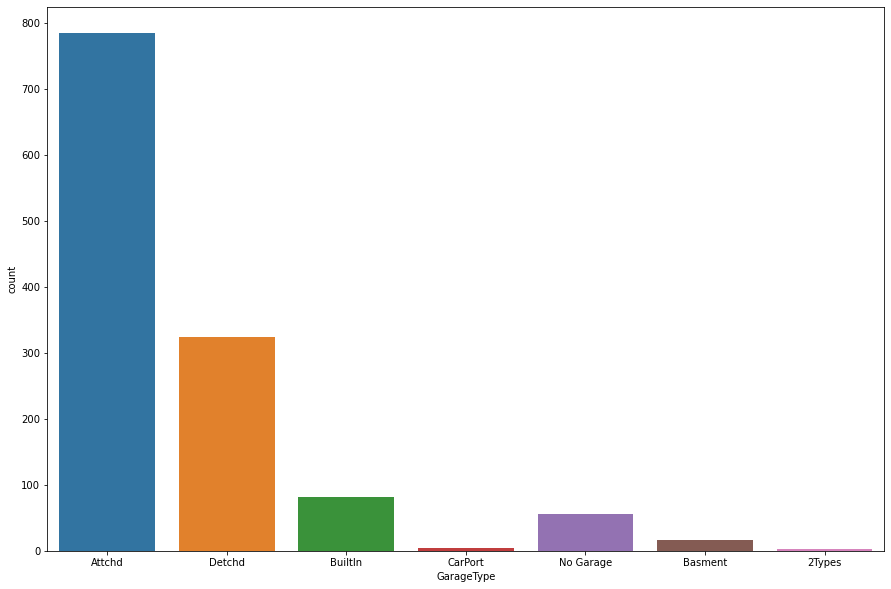

---------------- GarageFinish -------------------


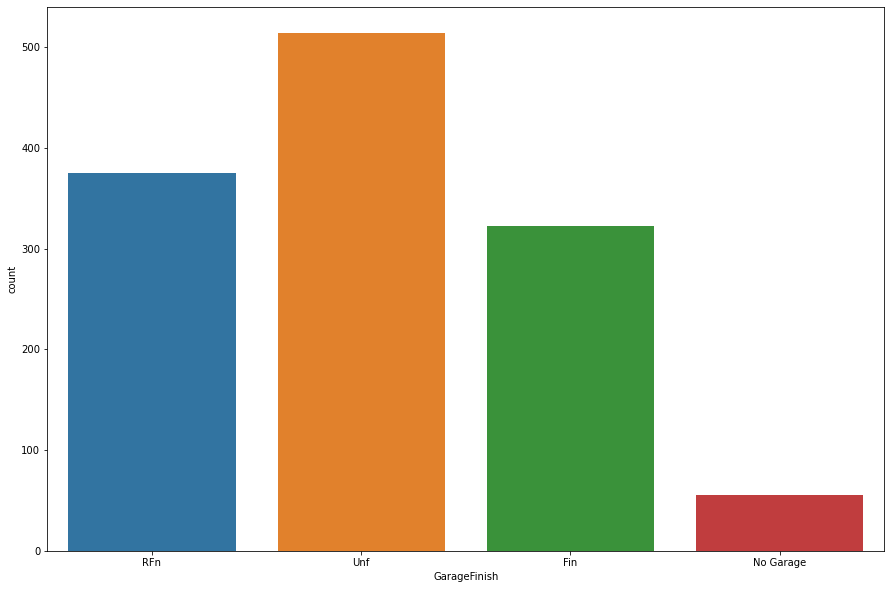

---------------- GarageQual -------------------


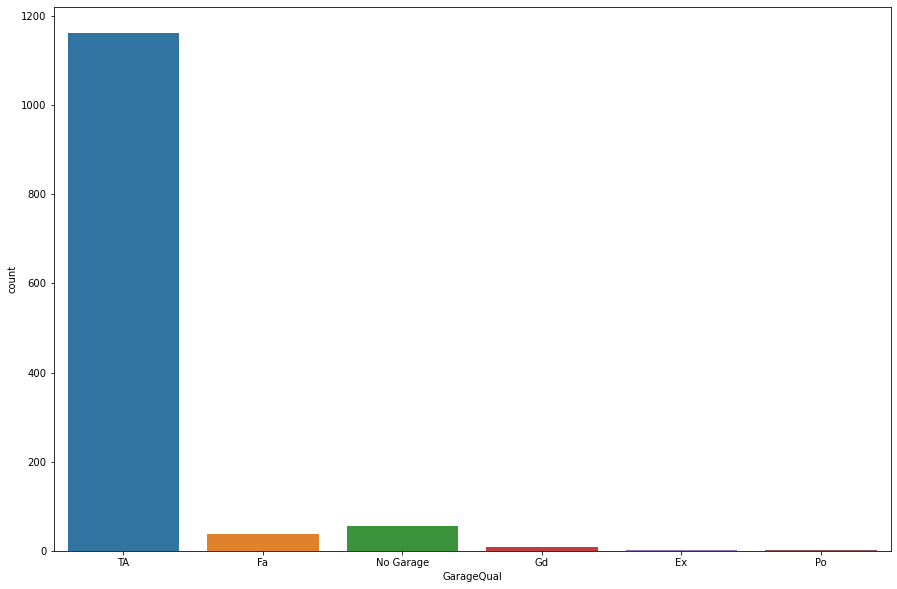

---------------- GarageCond -------------------


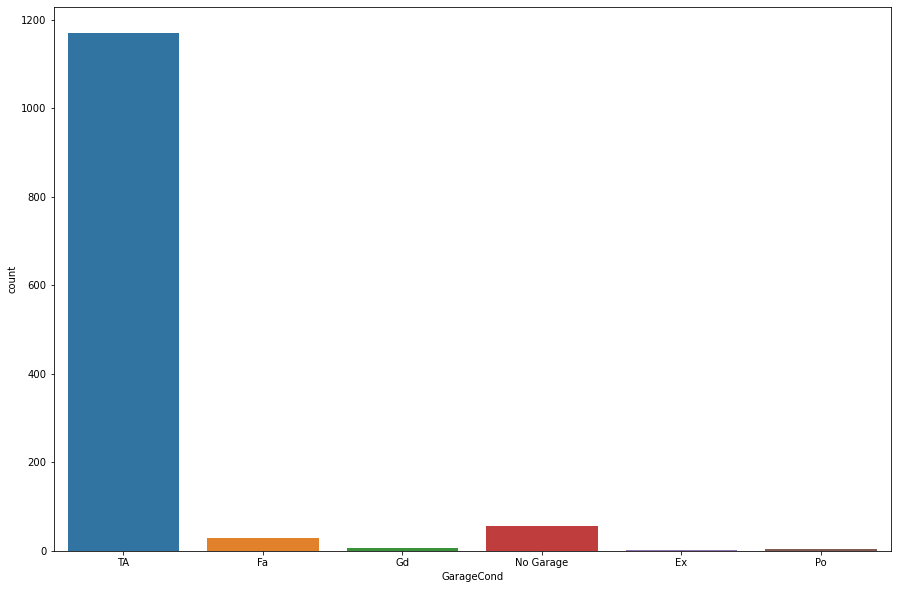

---------------- PavedDrive -------------------


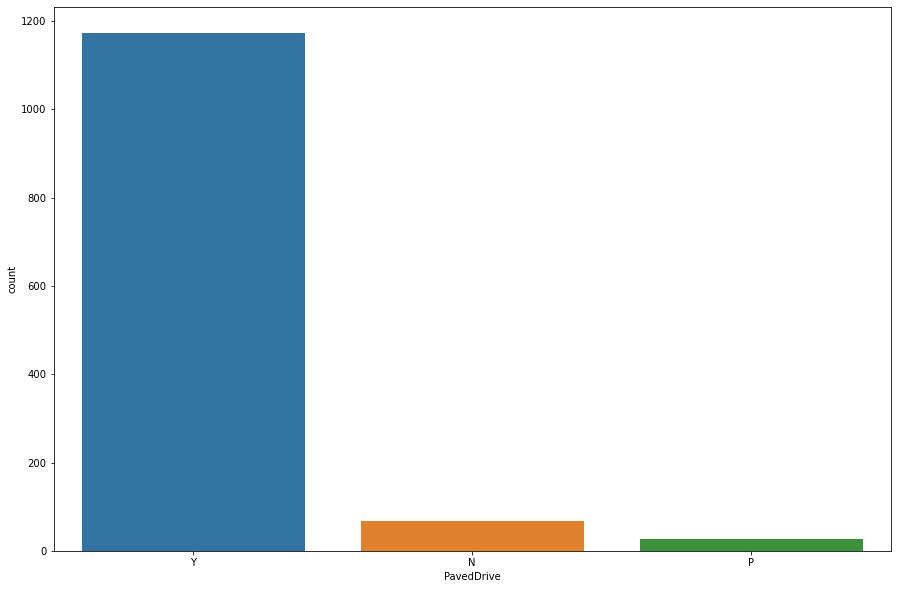

---------------- PoolQC -------------------


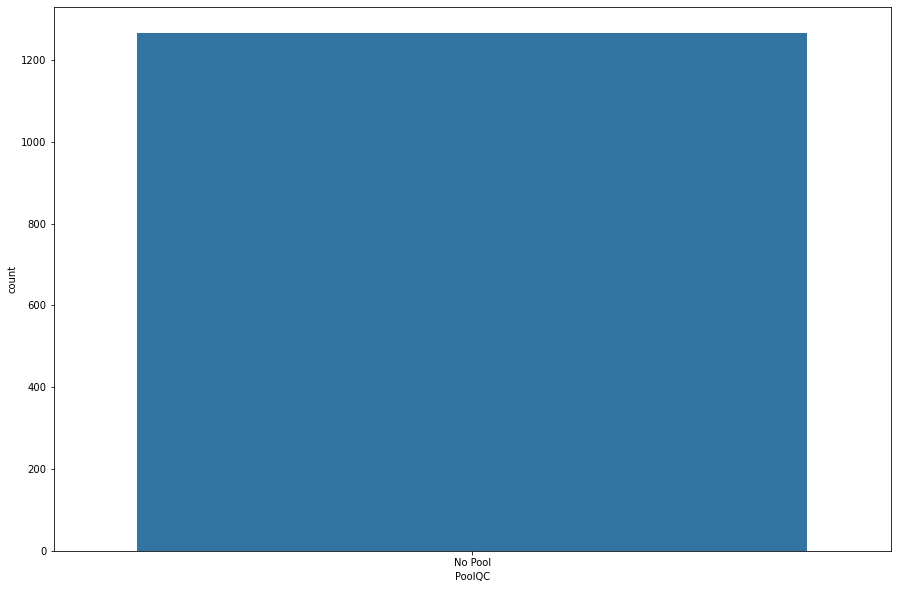

---------------- Fence -------------------


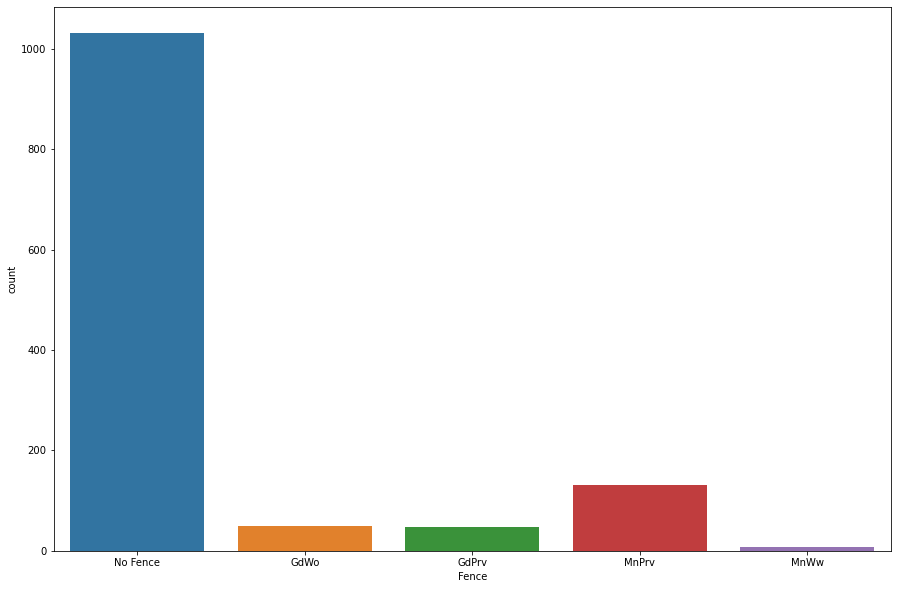

---------------- MiscFeature -------------------


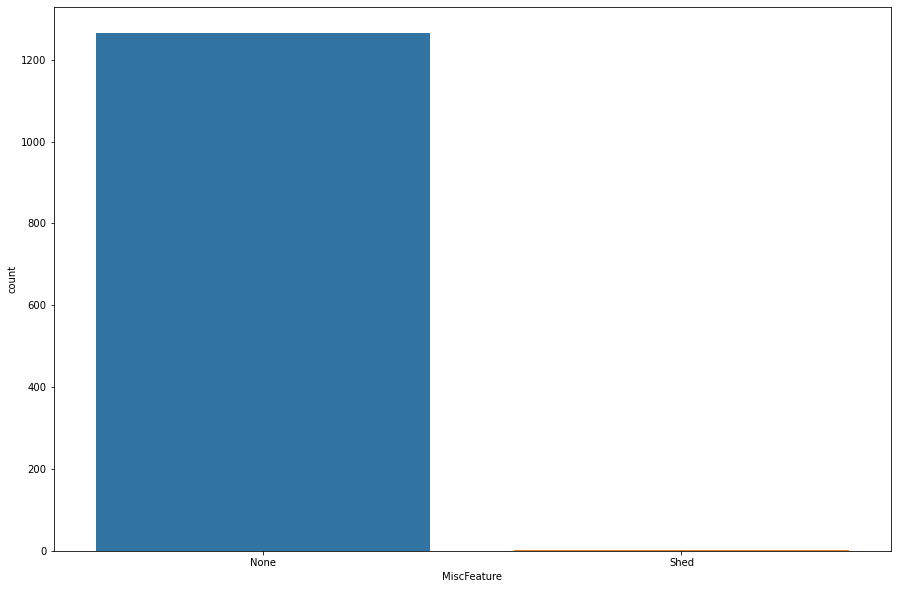

---------------- MoSold -------------------


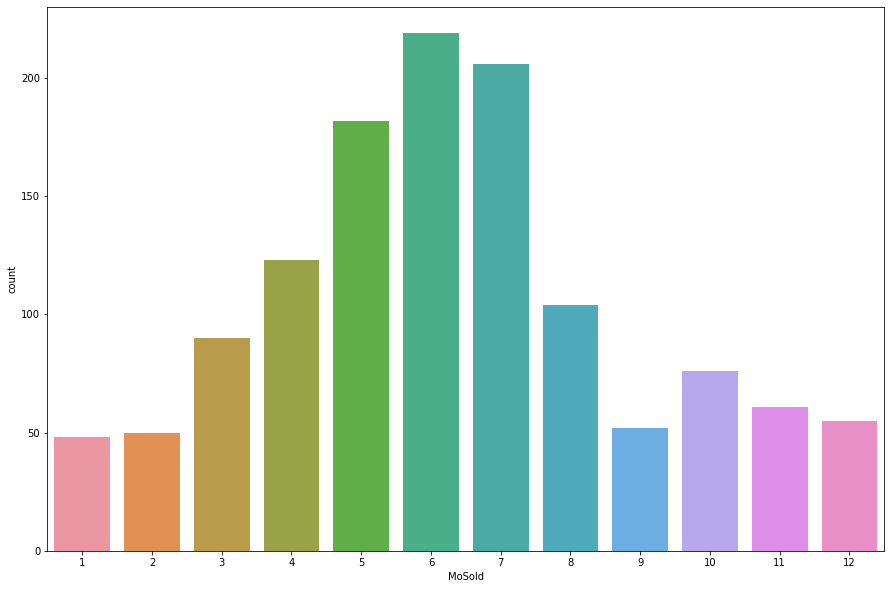

---------------- YrSold -------------------


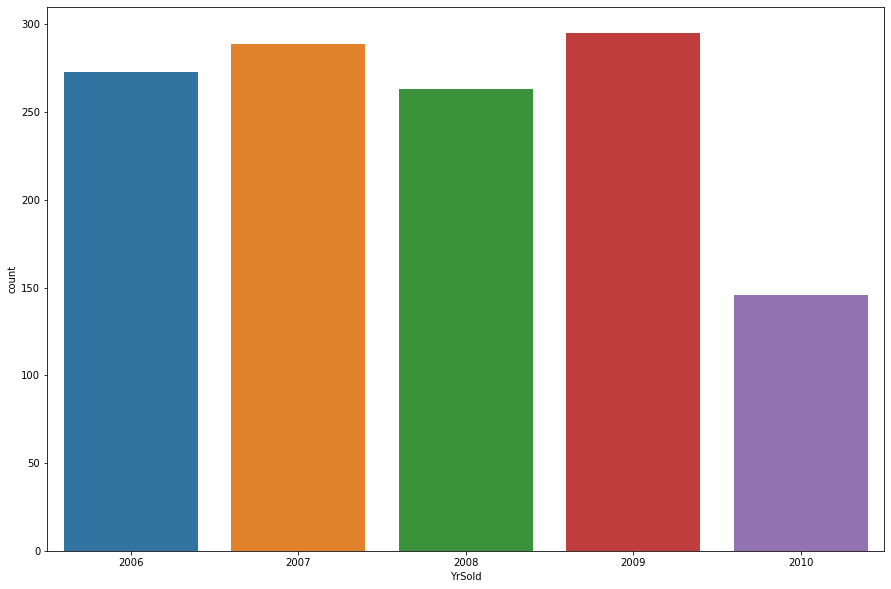

---------------- SaleType -------------------


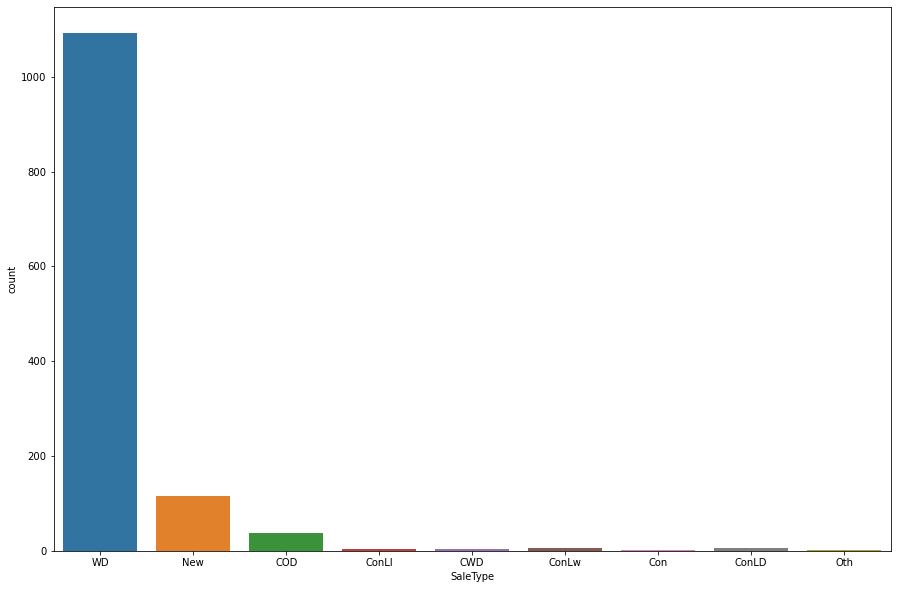

---------------- SaleCondition -------------------


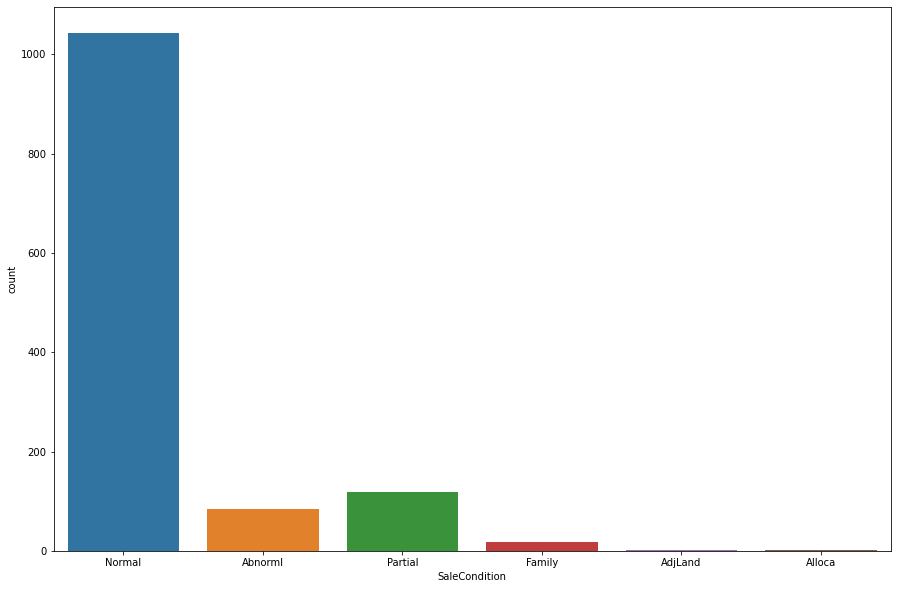

In [145]:
##  Catergorical Variables

for i in categorical_col:
    plt.figure(figsize=(15, 10))
    print("----------------",i,"-------------------")
    sns.countplot(housing[i])
    plt.show()

---------------- LotFrontage -------------------


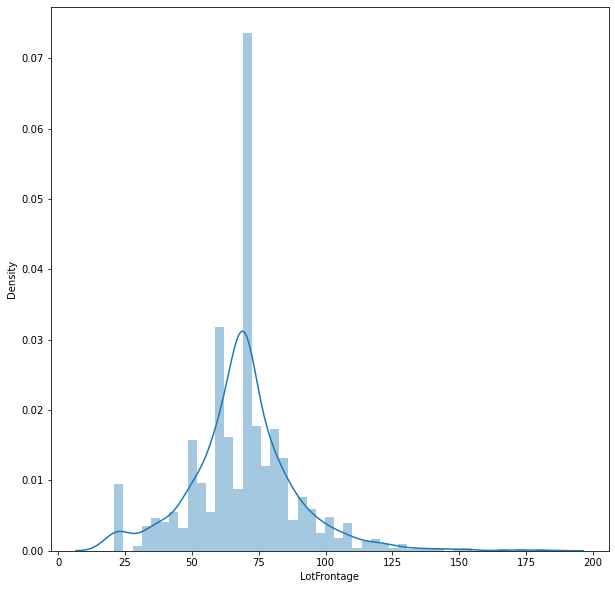

---------------- LotArea -------------------


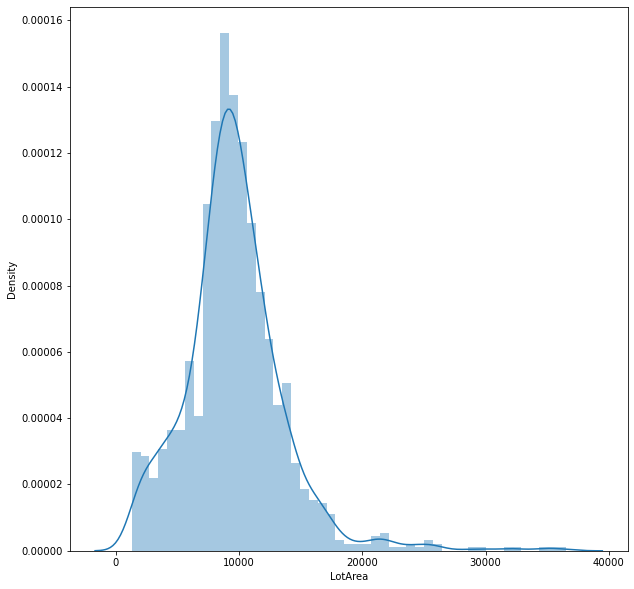

---------------- MasVnrArea -------------------


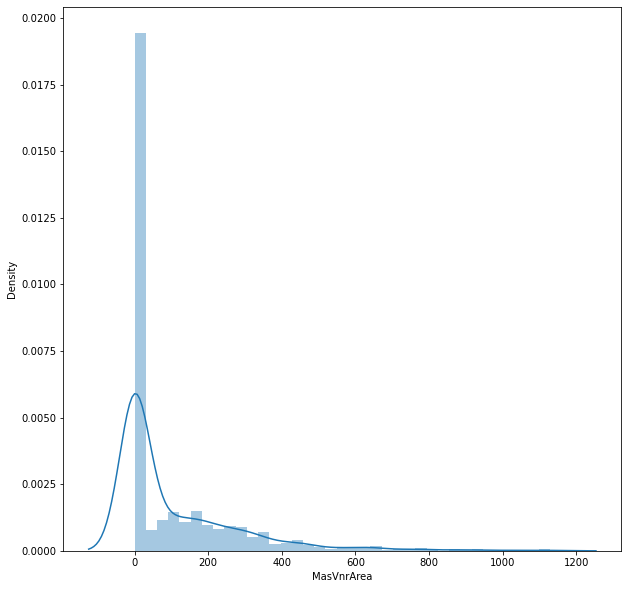

---------------- BsmtFinSF1 -------------------


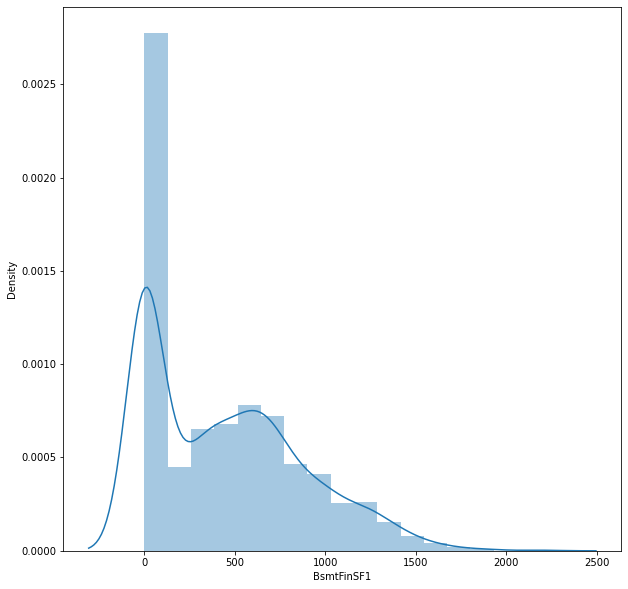

---------------- BsmtFinSF2 -------------------


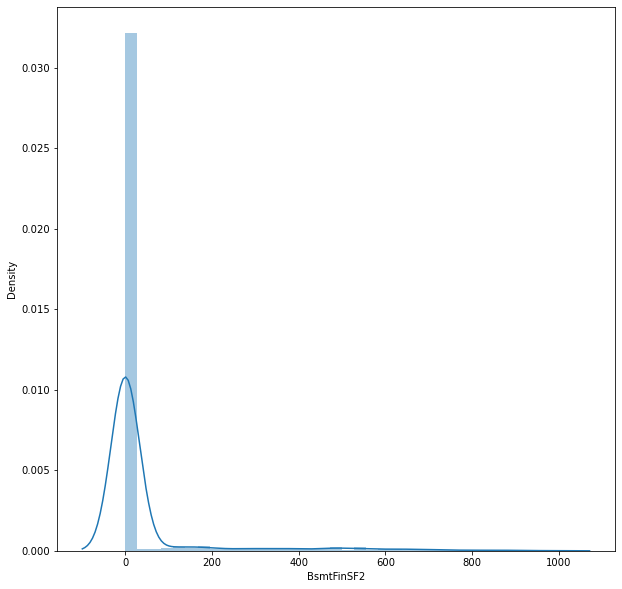

---------------- BsmtUnfSF -------------------


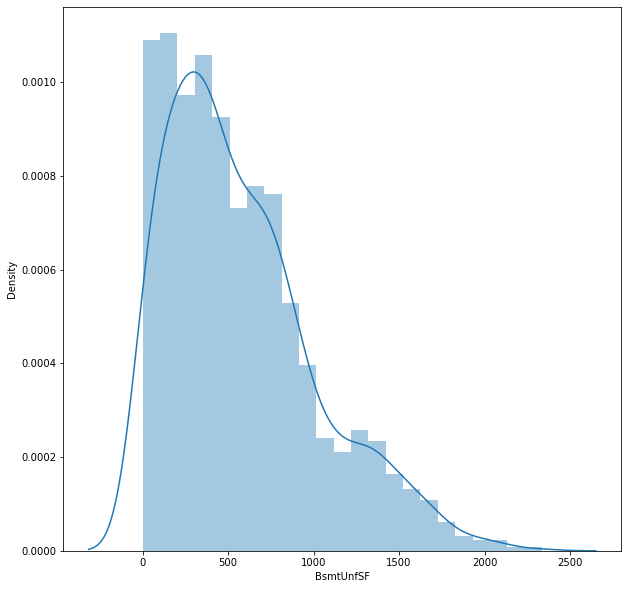

---------------- TotalBsmtSF -------------------


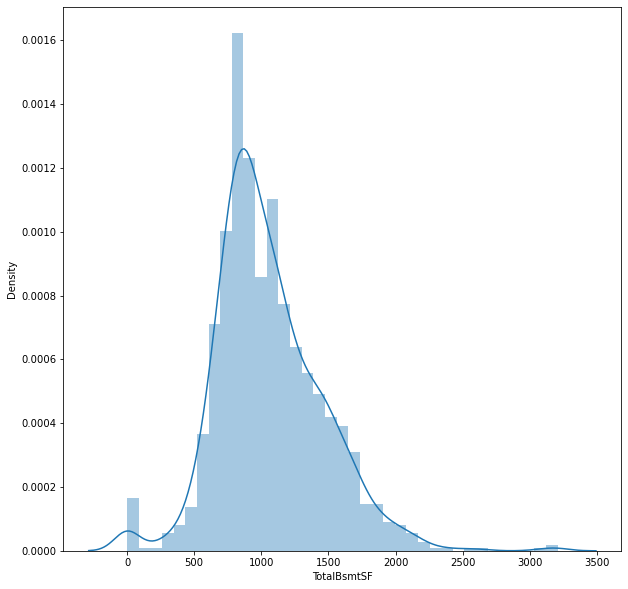

---------------- 1stFlrSF -------------------


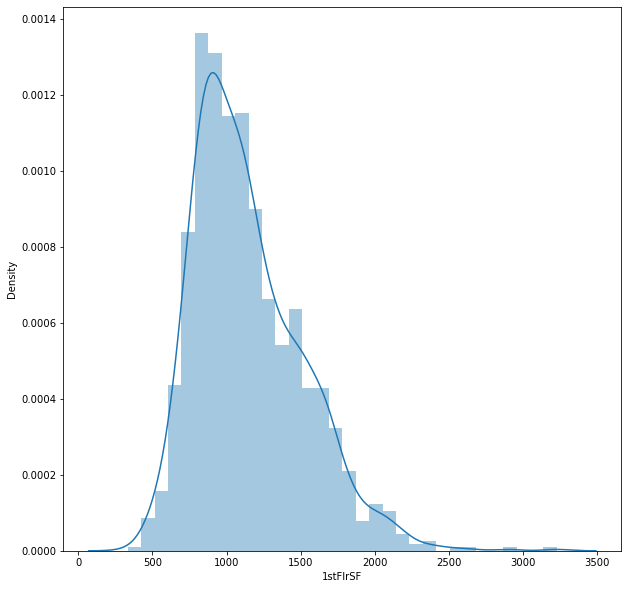

---------------- 2ndFlrSF -------------------


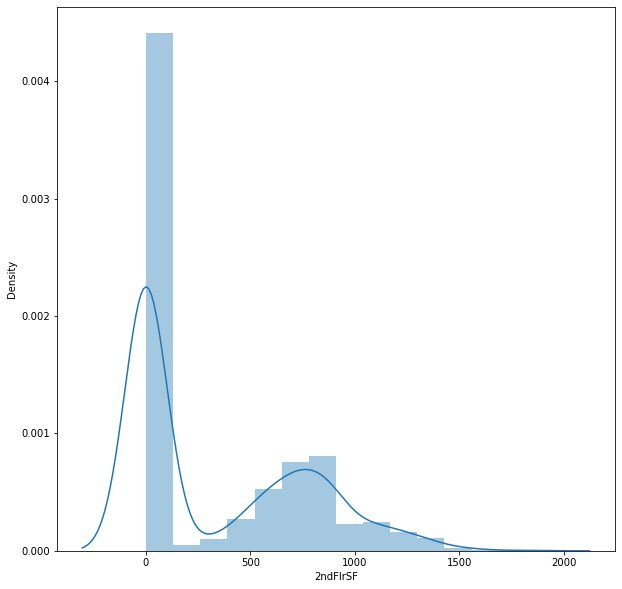

---------------- LowQualFinSF -------------------


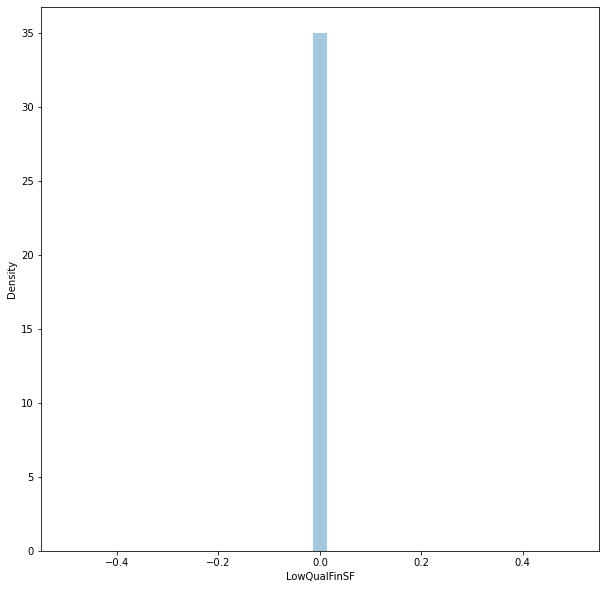

---------------- GrLivArea -------------------


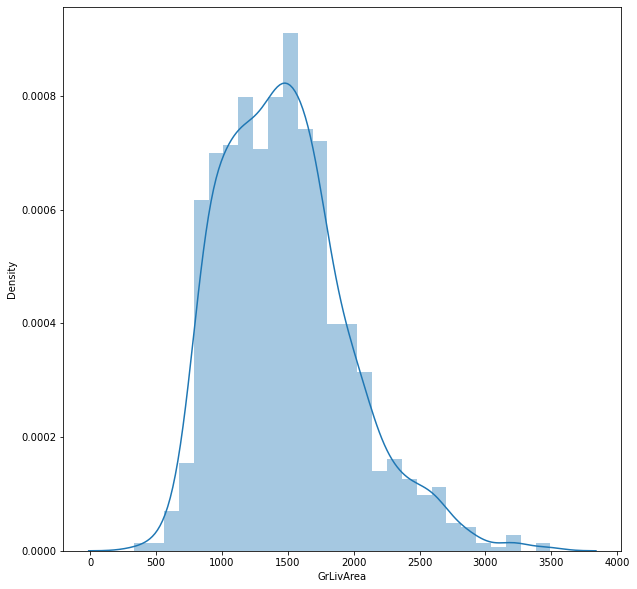

---------------- BsmtFullBath -------------------


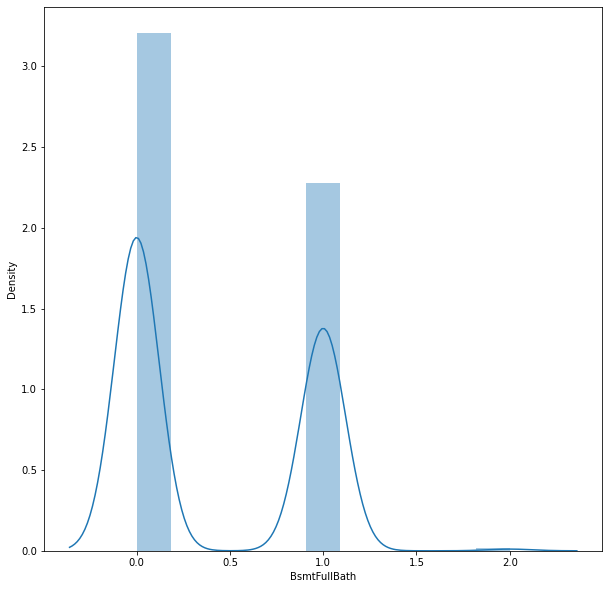

---------------- BsmtHalfBath -------------------


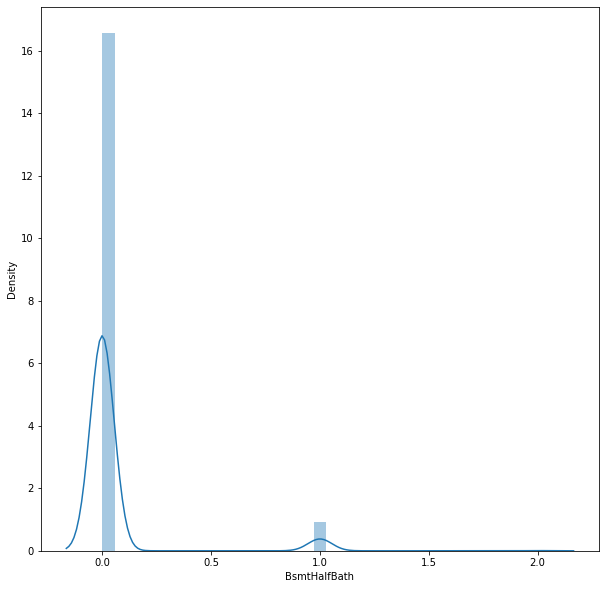

---------------- FullBath -------------------


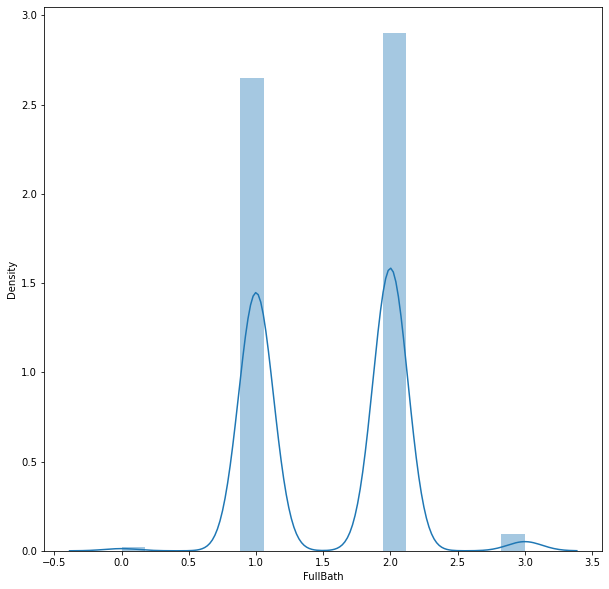

---------------- HalfBath -------------------


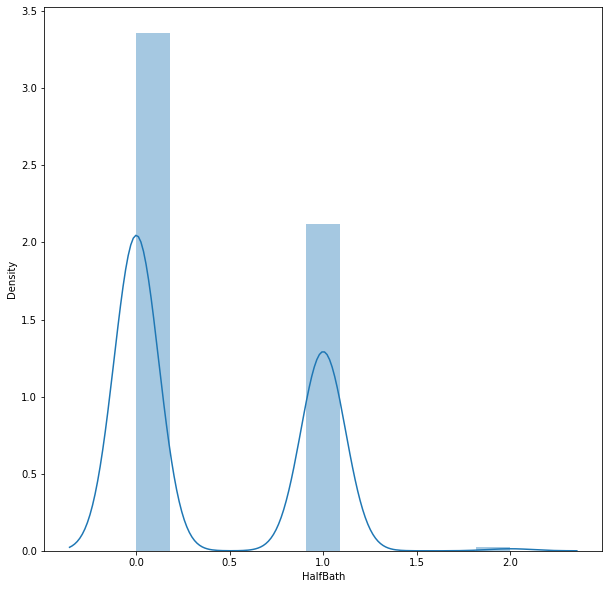

---------------- BedroomAbvGr -------------------


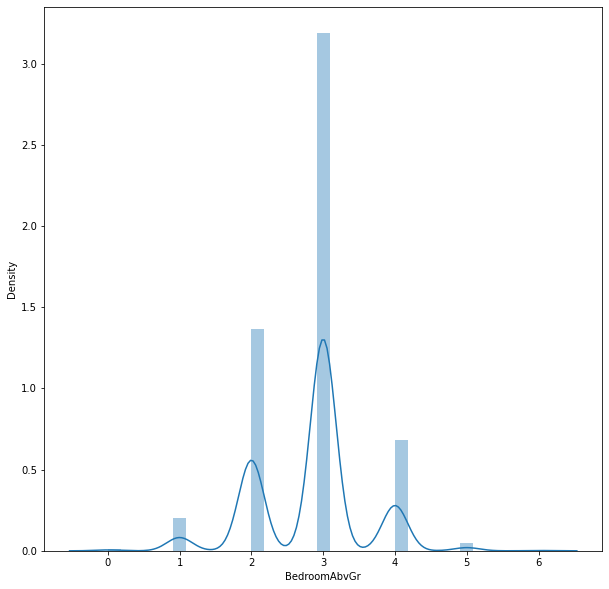

---------------- KitchenAbvGr -------------------


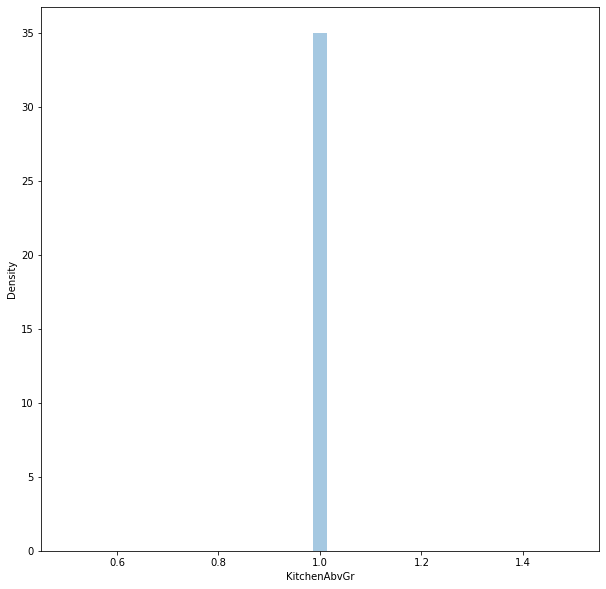

---------------- TotRmsAbvGrd -------------------


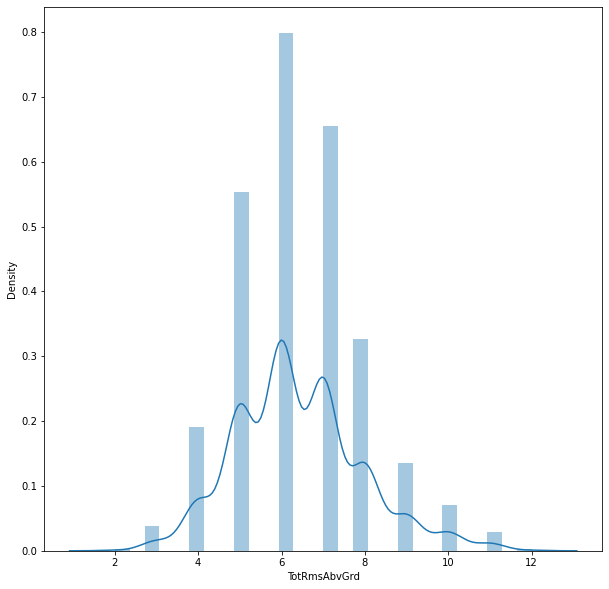

---------------- Fireplaces -------------------


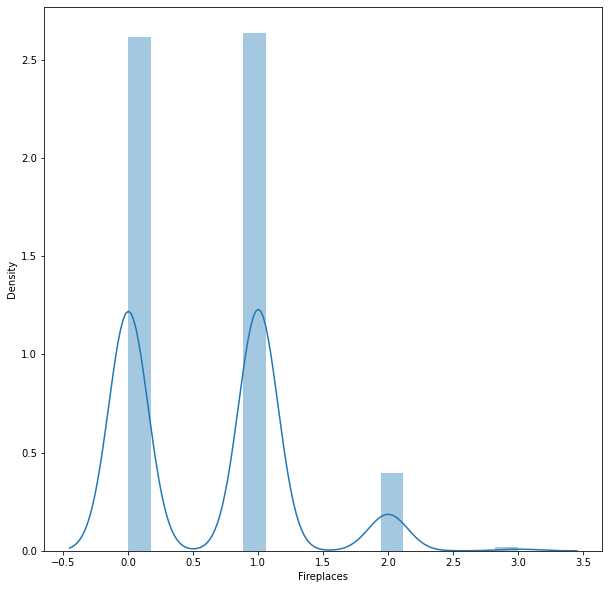

---------------- GarageYrBlt -------------------


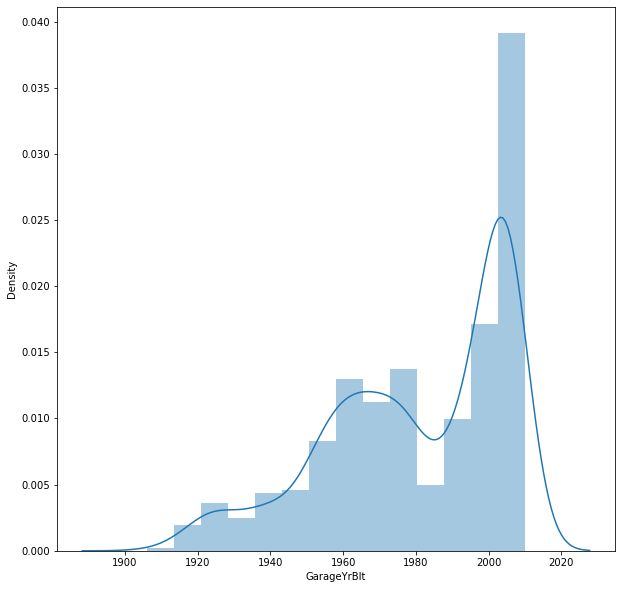

---------------- GarageCars -------------------


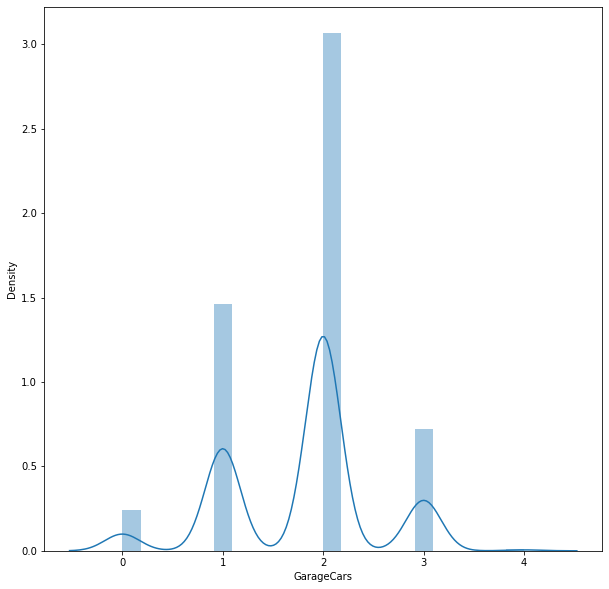

---------------- GarageArea -------------------


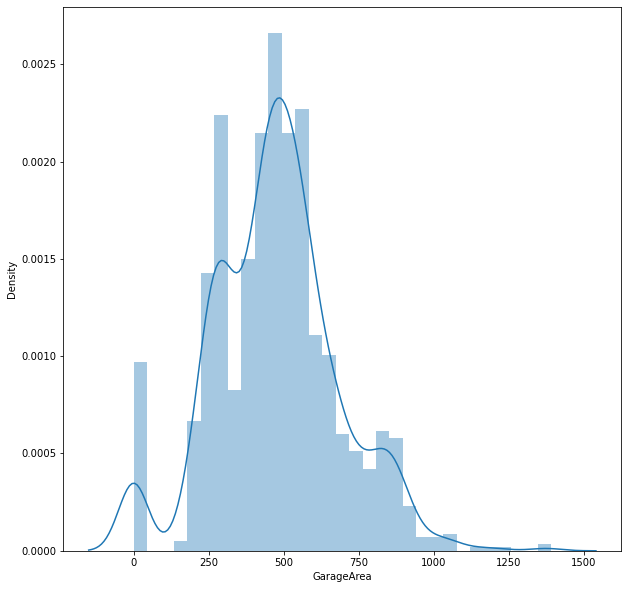

---------------- WoodDeckSF -------------------


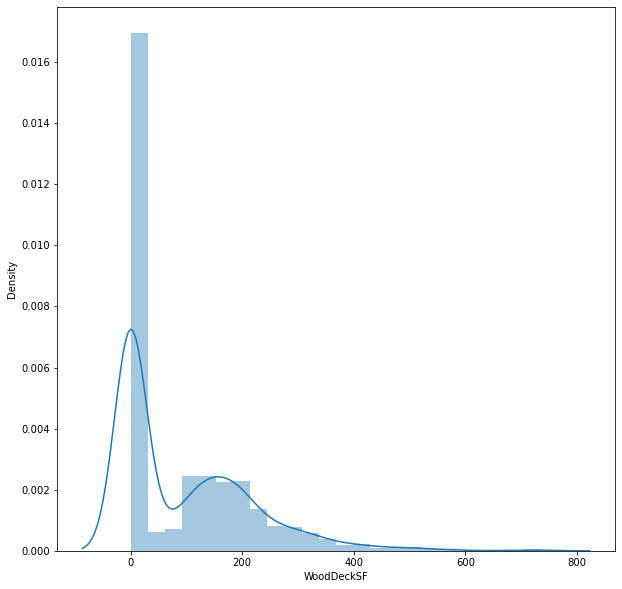

---------------- OpenPorchSF -------------------


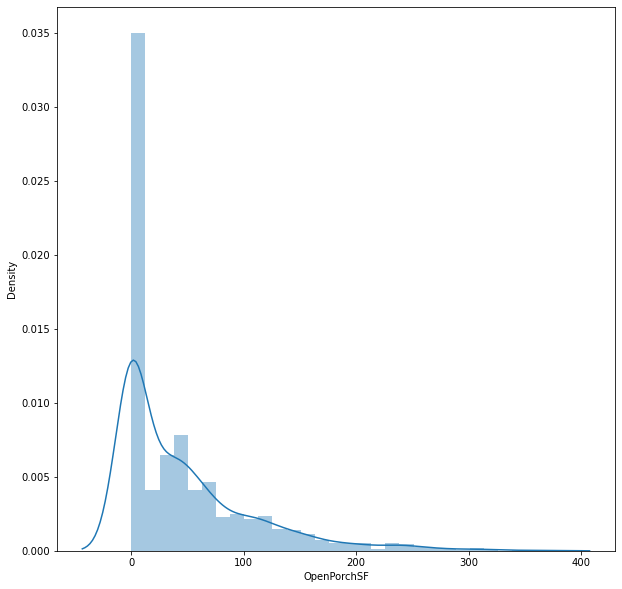

---------------- EnclosedPorch -------------------


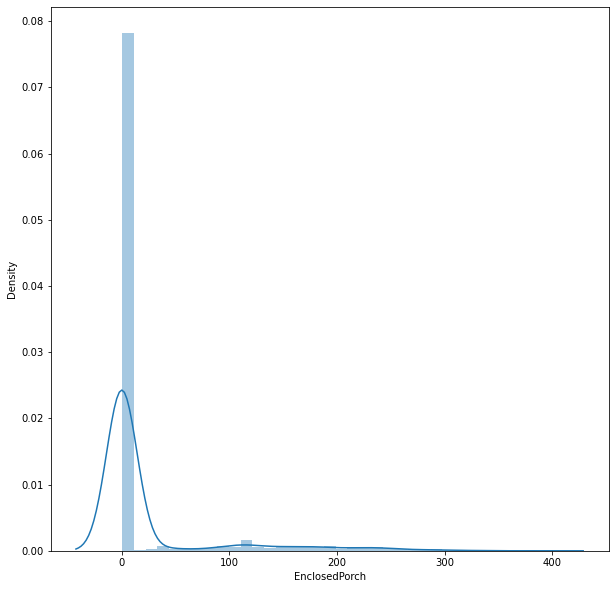

---------------- 3SsnPorch -------------------


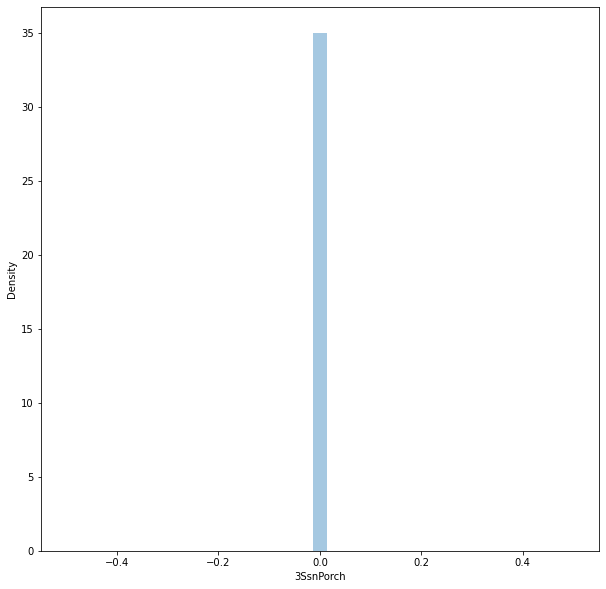

---------------- ScreenPorch -------------------


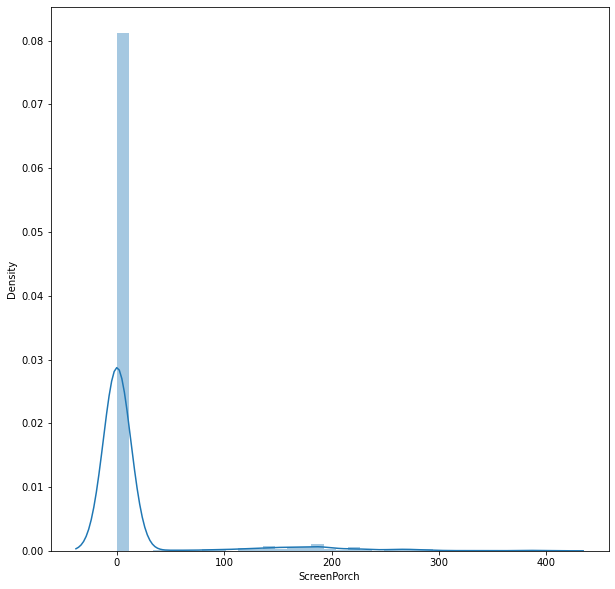

---------------- PoolArea -------------------


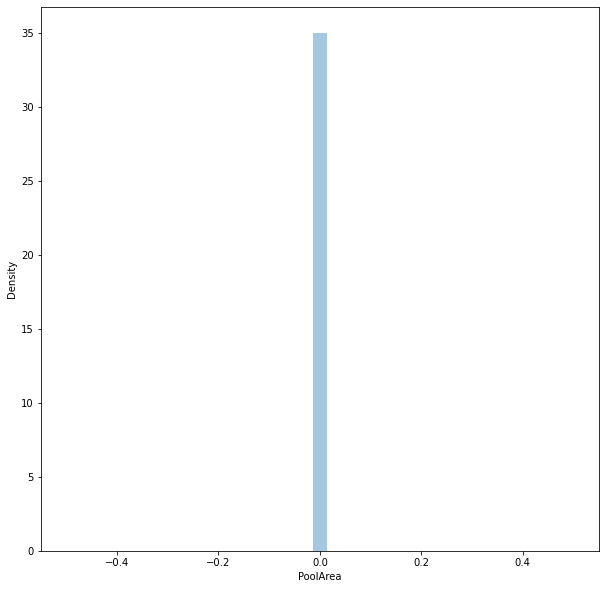

---------------- MiscVal -------------------


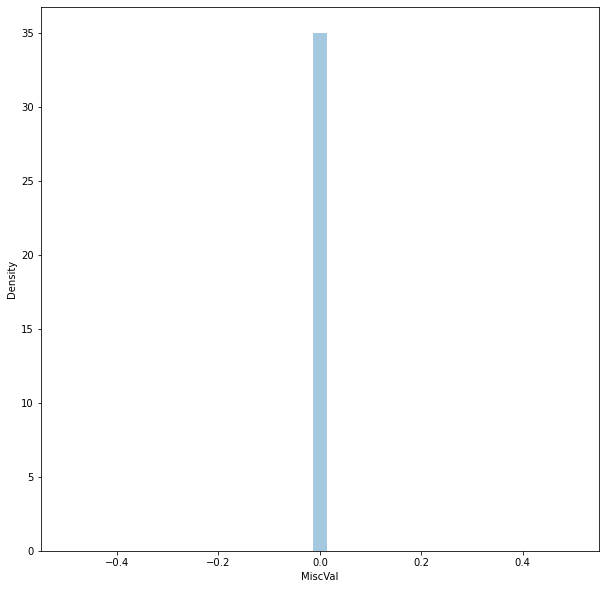

---------------- SalePrice -------------------


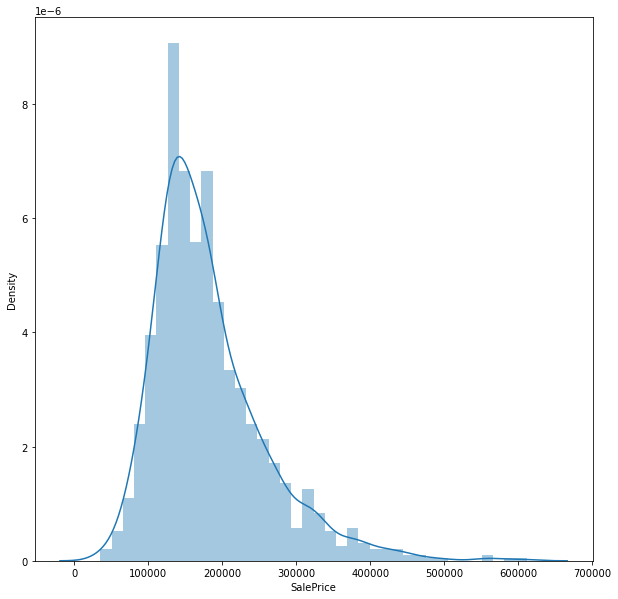

In [146]:
##  Continuous Variables

for i in continuous_col:
    plt.figure(figsize=(10, 10))
    print("----------------",i,"-------------------")
    sns.distplot(housing[i])
    plt.show()

#### Bivariate Analysis

In [147]:
## Continuous Columns vs Sales 
continuous_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

---------------- MSSubClass -------------------


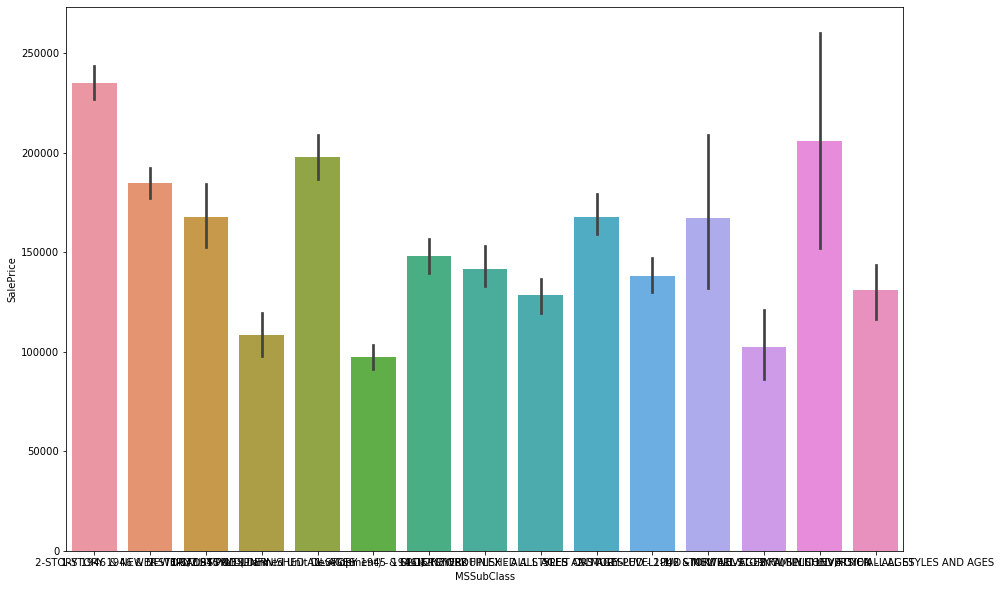

---------------- MSZoning -------------------


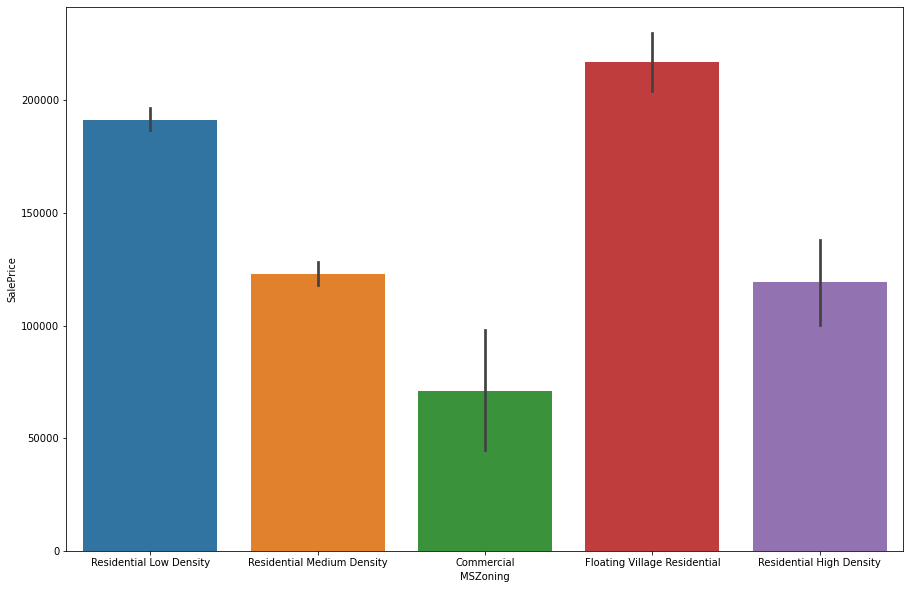

---------------- Street -------------------


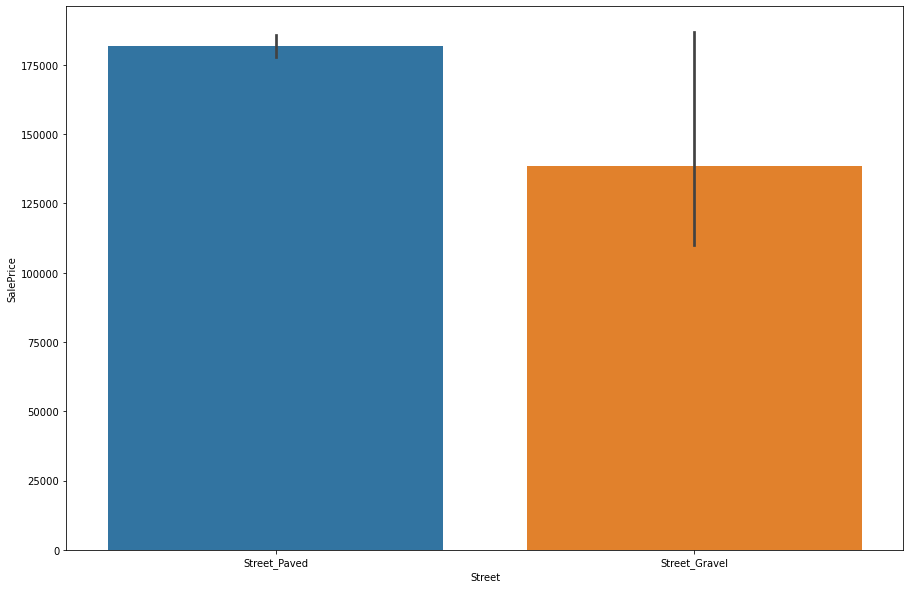

---------------- Alley -------------------


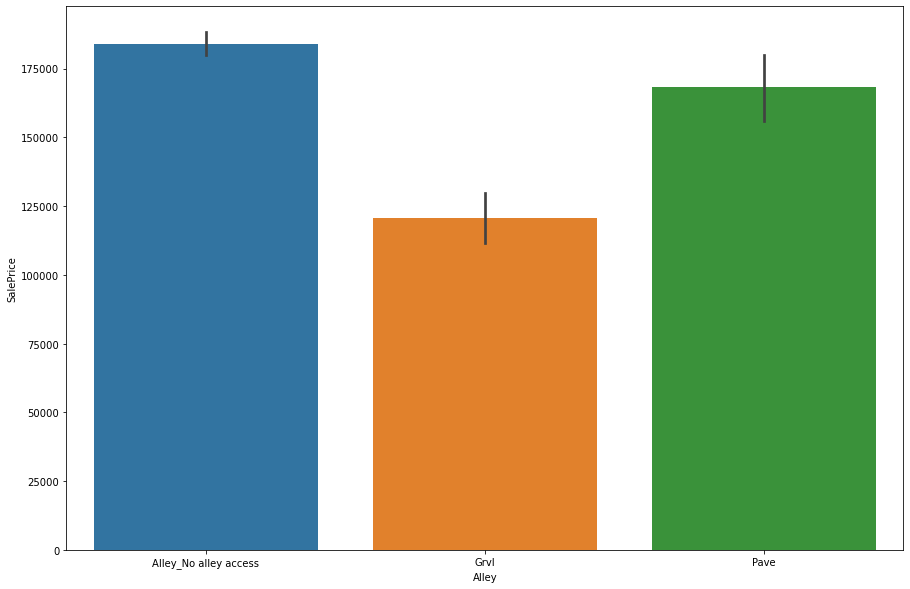

---------------- LotShape -------------------


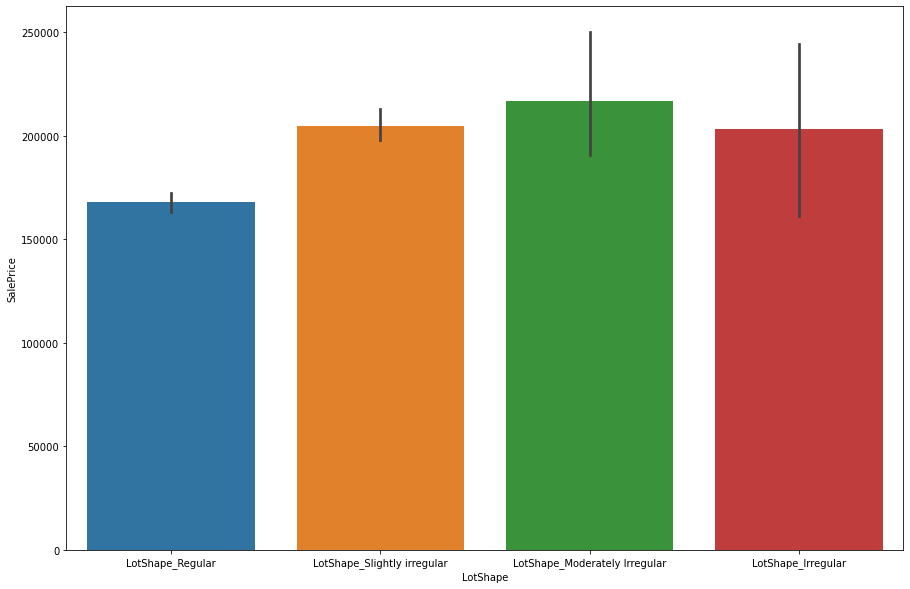

---------------- LandContour -------------------


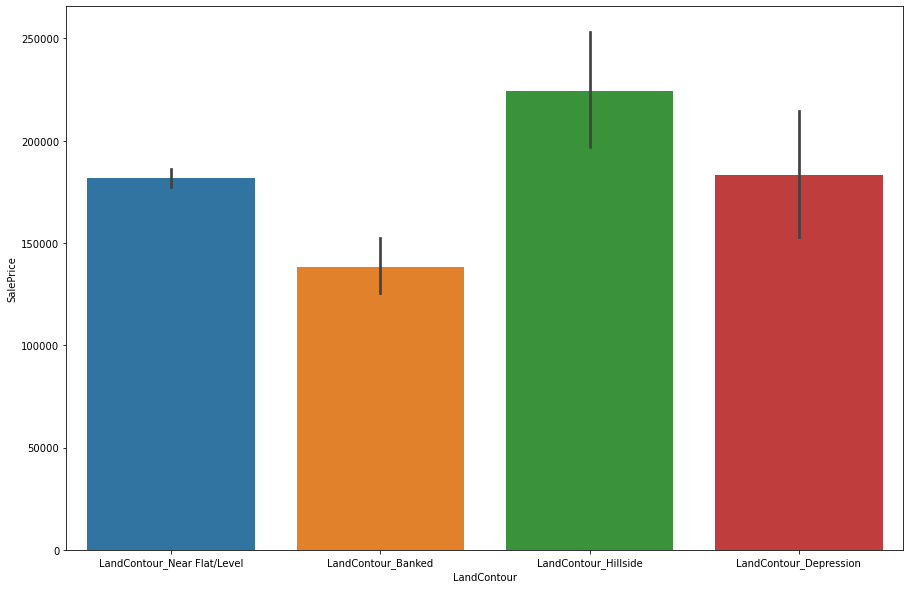

---------------- Utilities -------------------


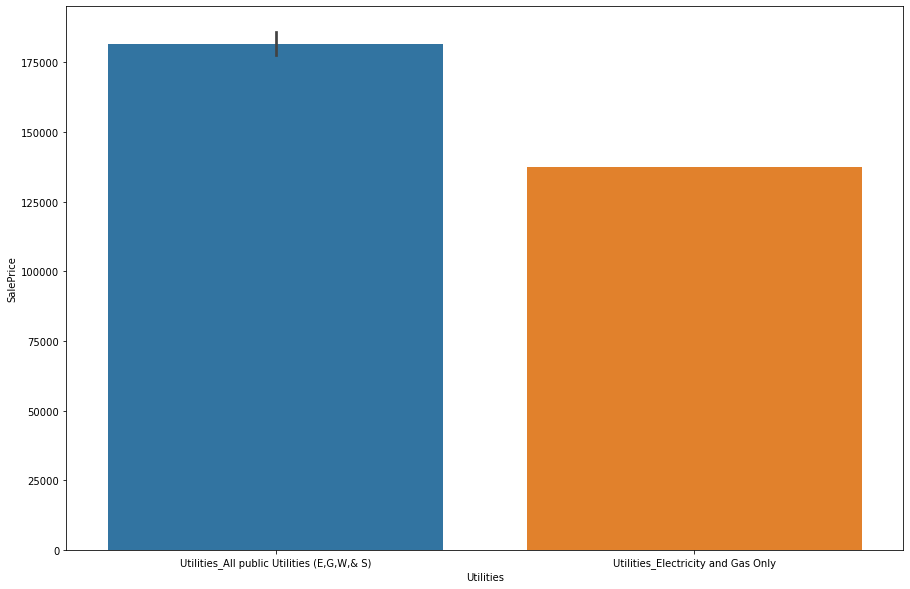

---------------- LotConfig -------------------


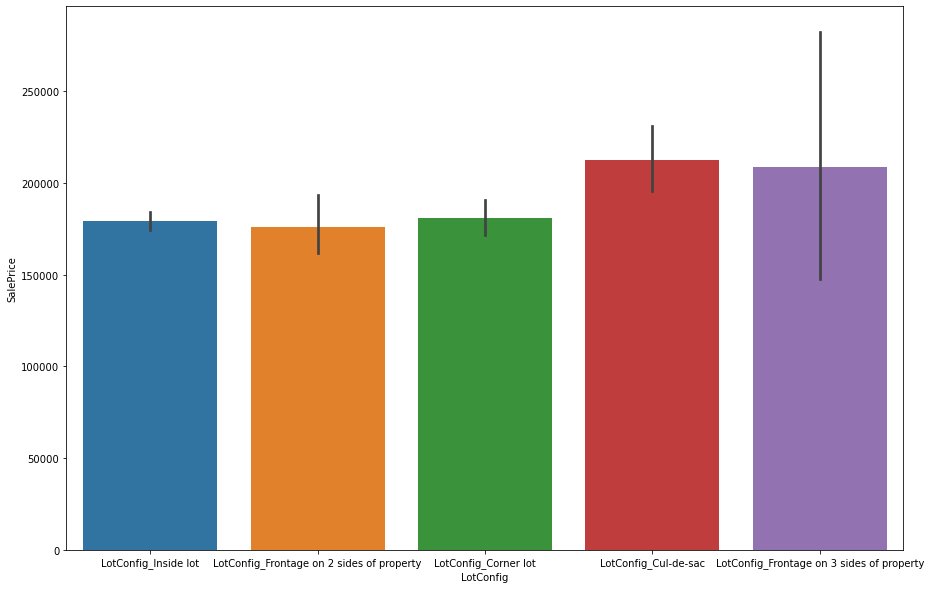

---------------- LandSlope -------------------


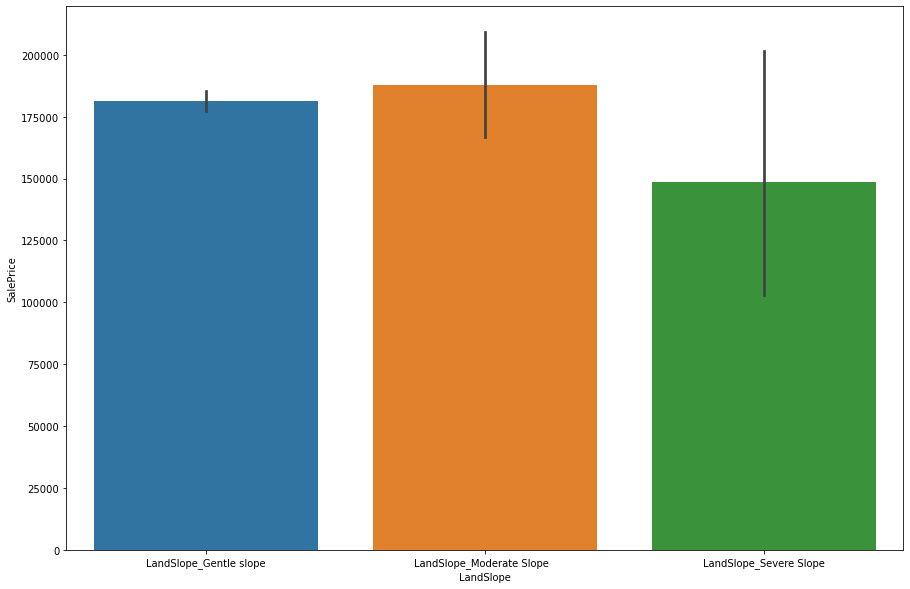

---------------- Neighborhood -------------------


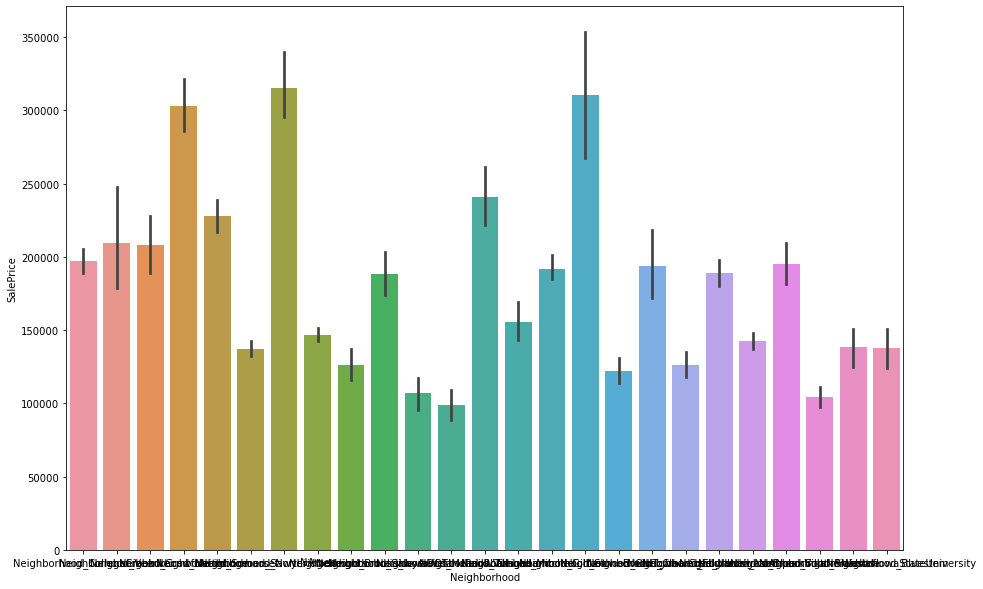

---------------- Condition1 -------------------


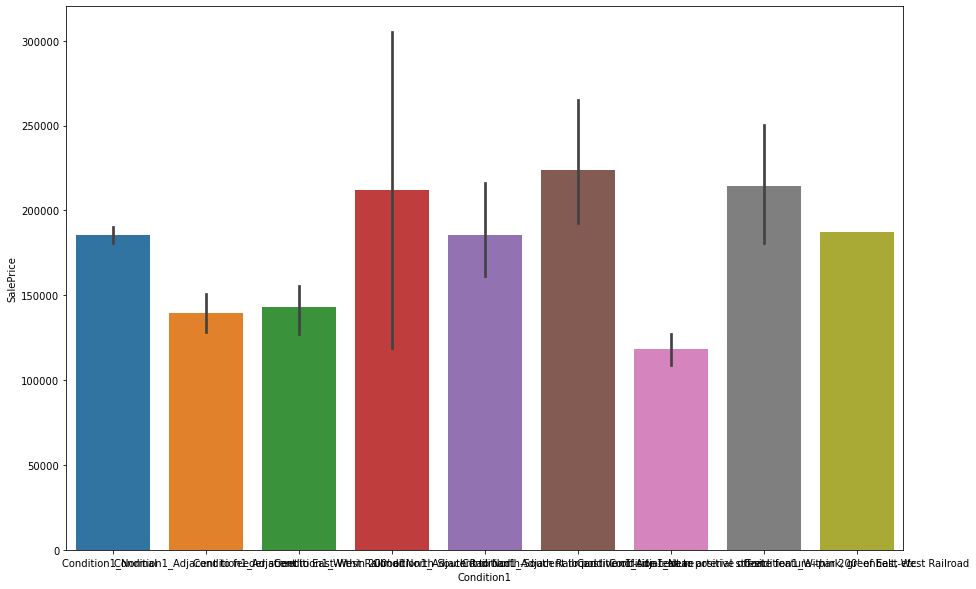

---------------- Condition2 -------------------


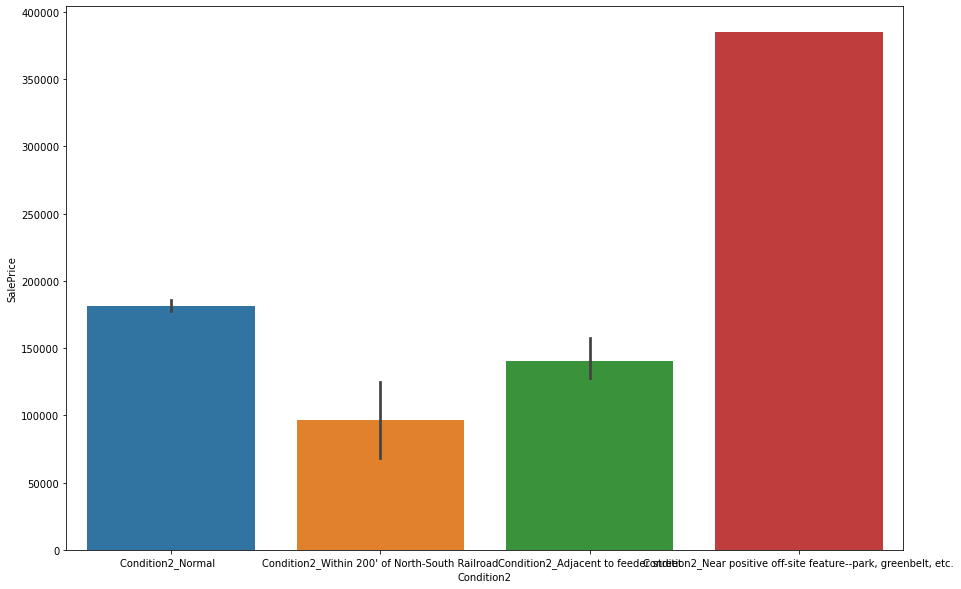

---------------- BldgType -------------------


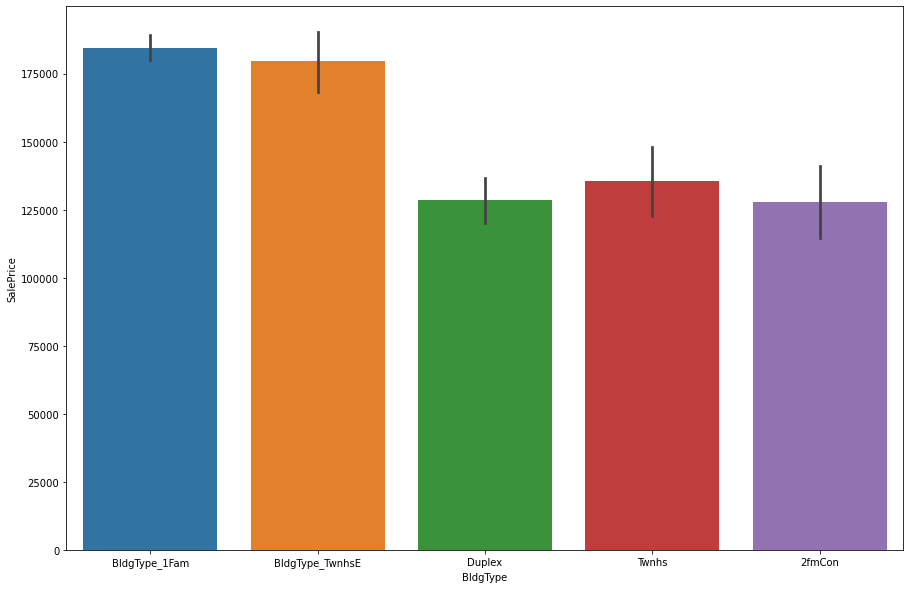

---------------- HouseStyle -------------------


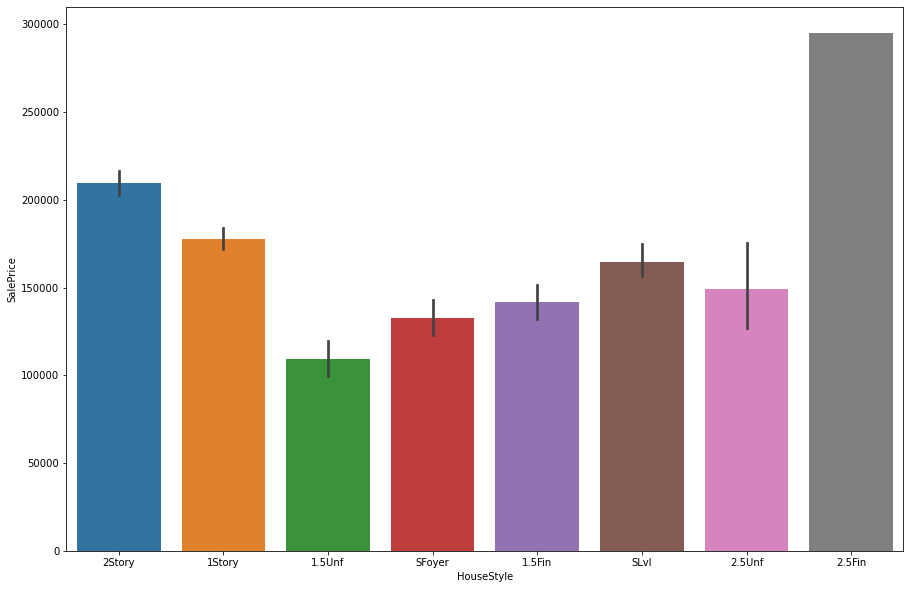

---------------- OverallQual -------------------


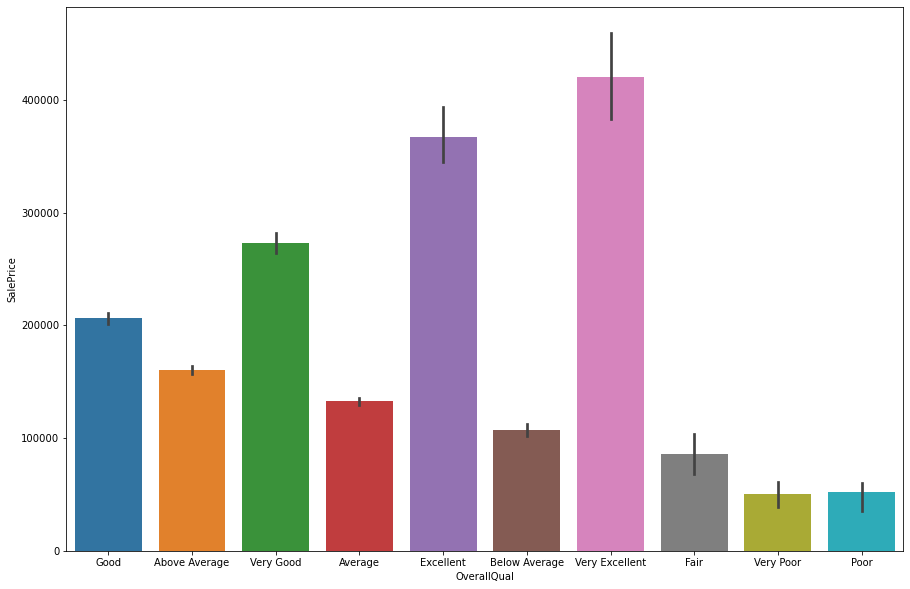

---------------- OverallCond -------------------


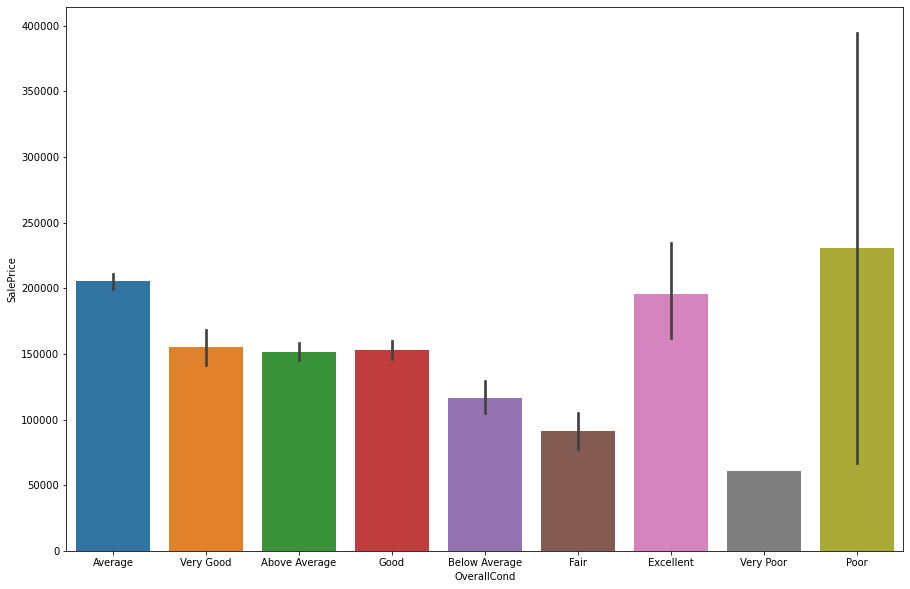

---------------- YearBuilt -------------------


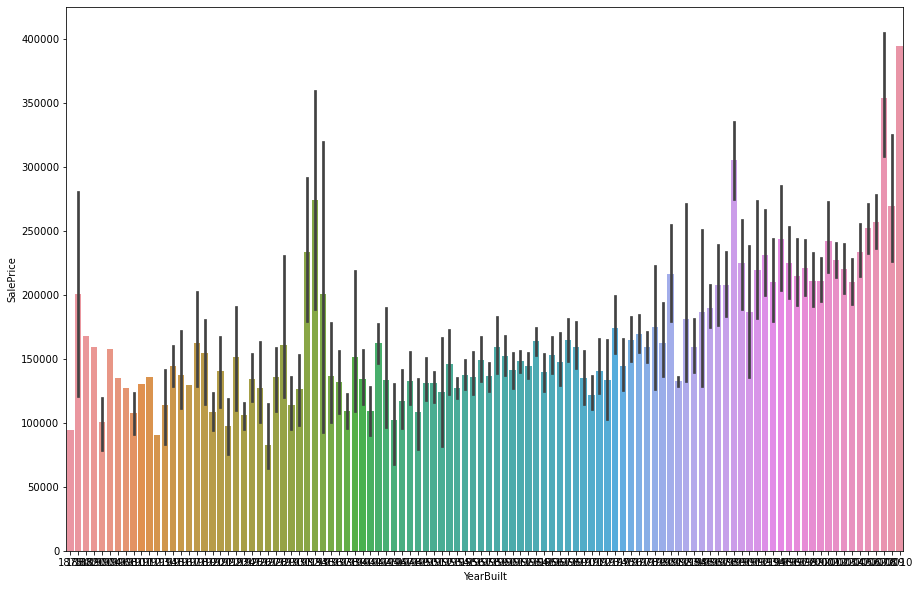

---------------- YearRemodAdd -------------------


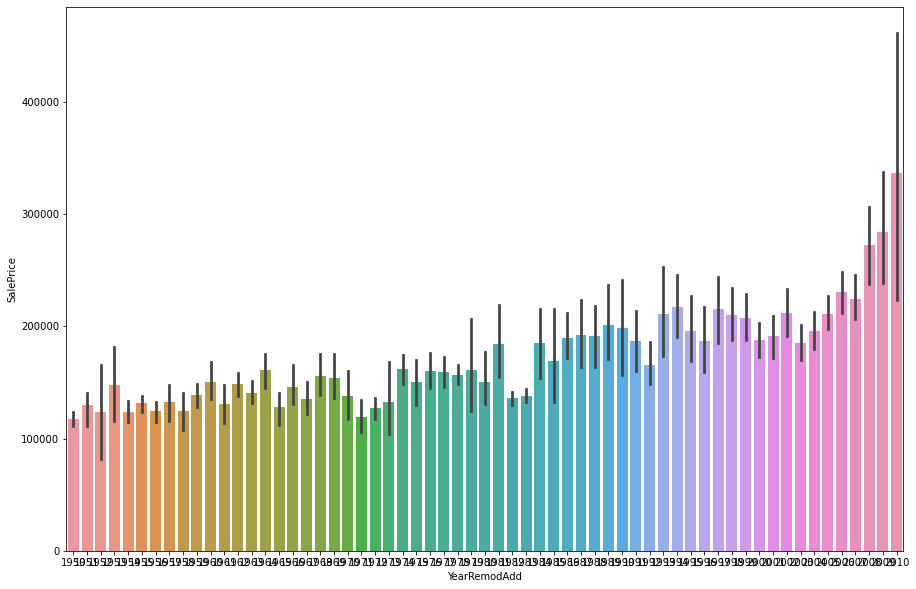

---------------- RoofStyle -------------------


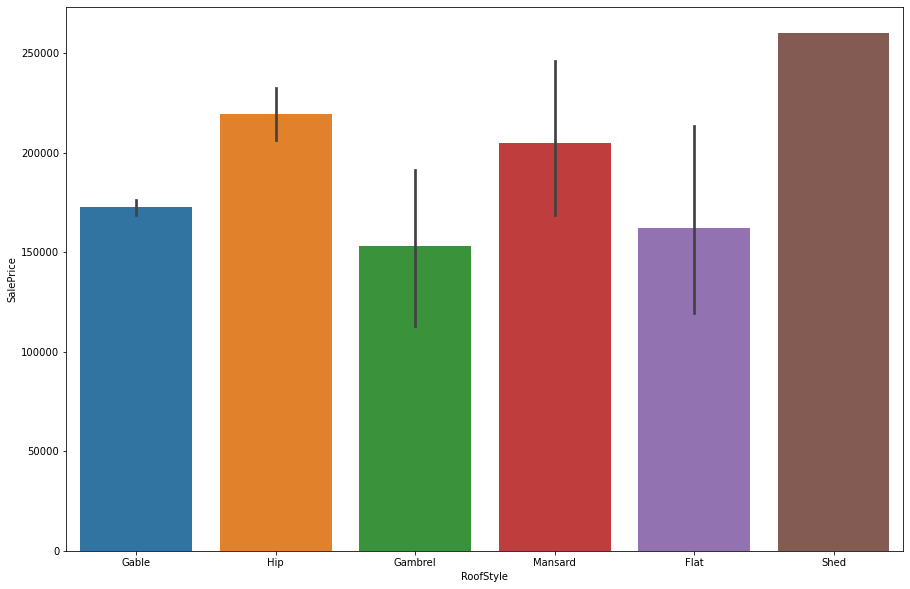

---------------- RoofMatl -------------------


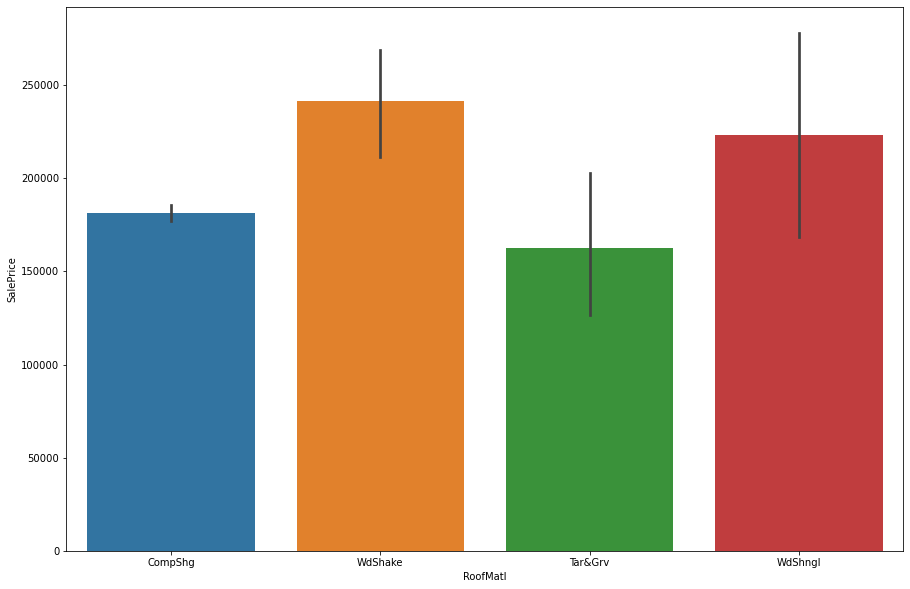

---------------- Exterior1st -------------------


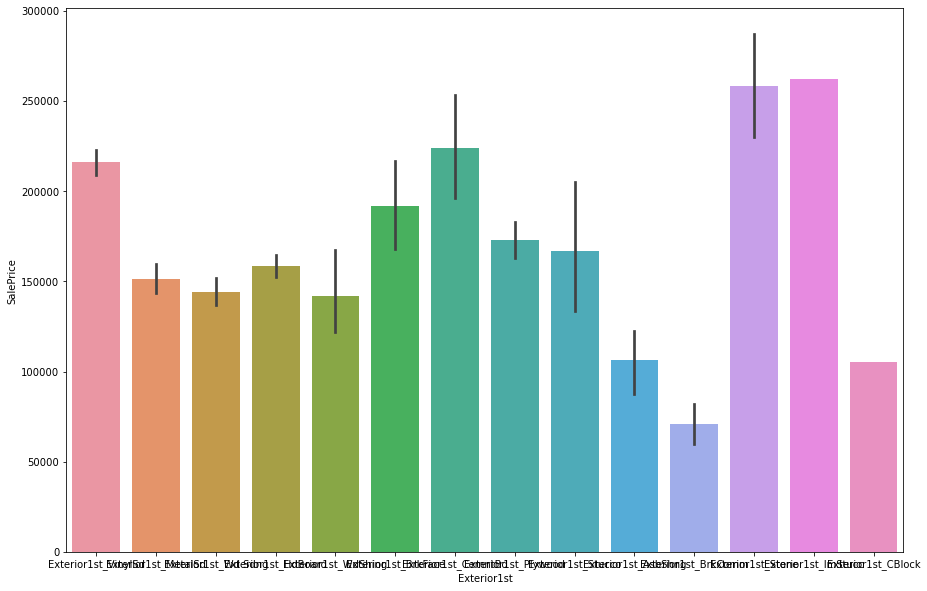

---------------- Exterior2nd -------------------


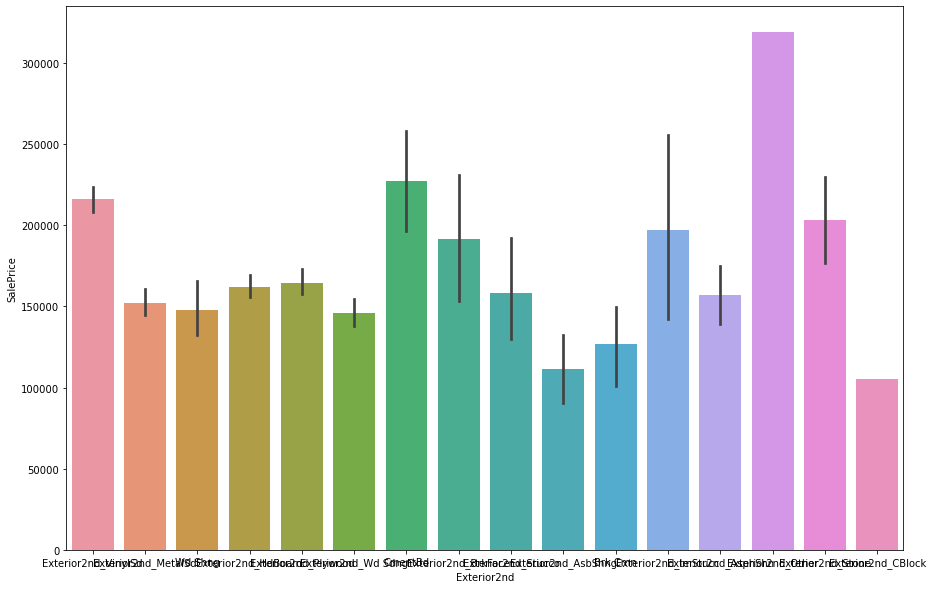

---------------- MasVnrType -------------------


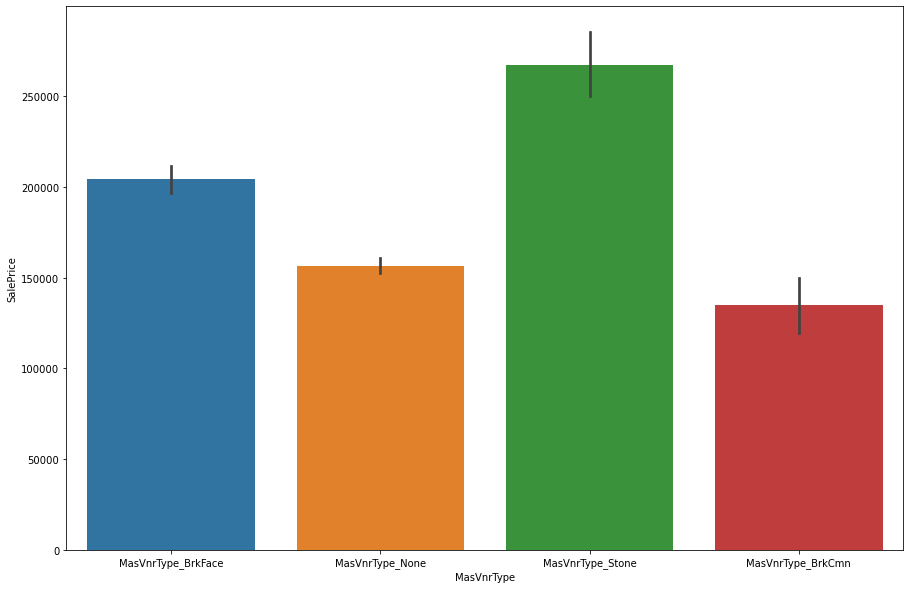

---------------- ExterQual -------------------


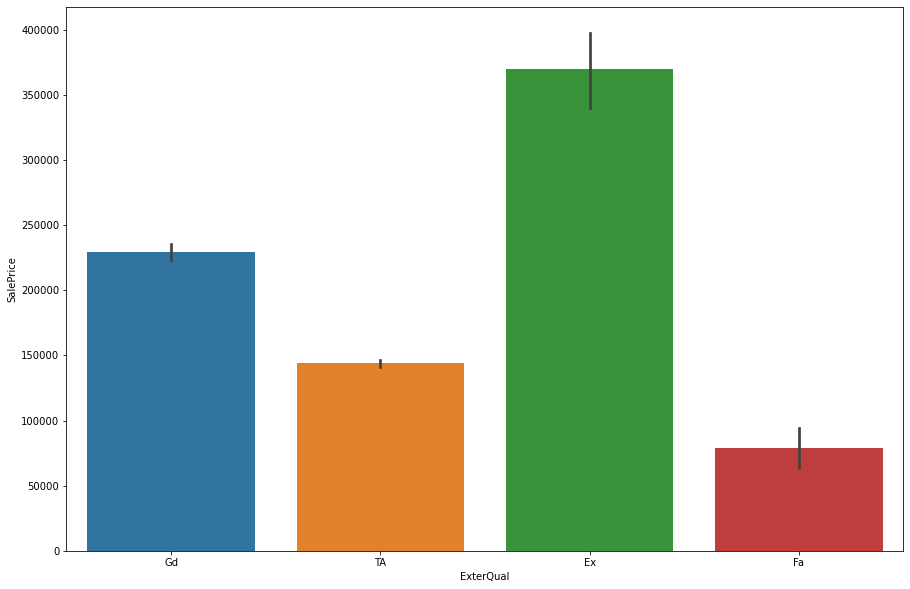

---------------- ExterCond -------------------


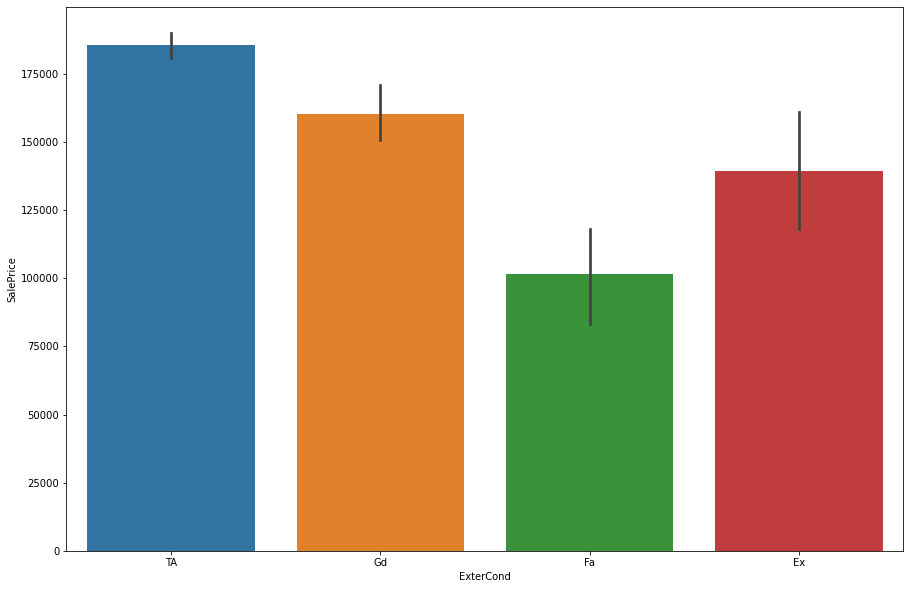

---------------- Foundation -------------------


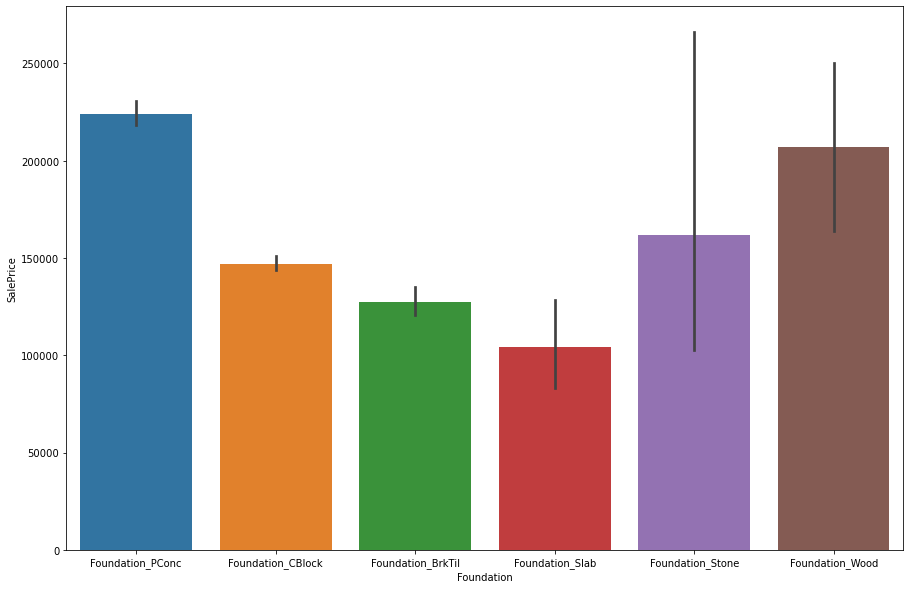

---------------- BsmtQual -------------------


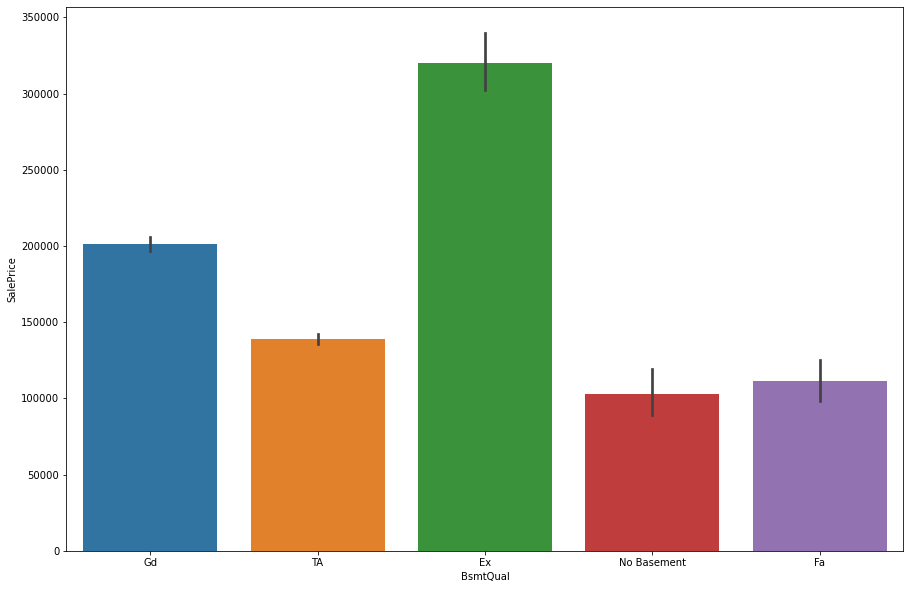

---------------- BsmtCond -------------------


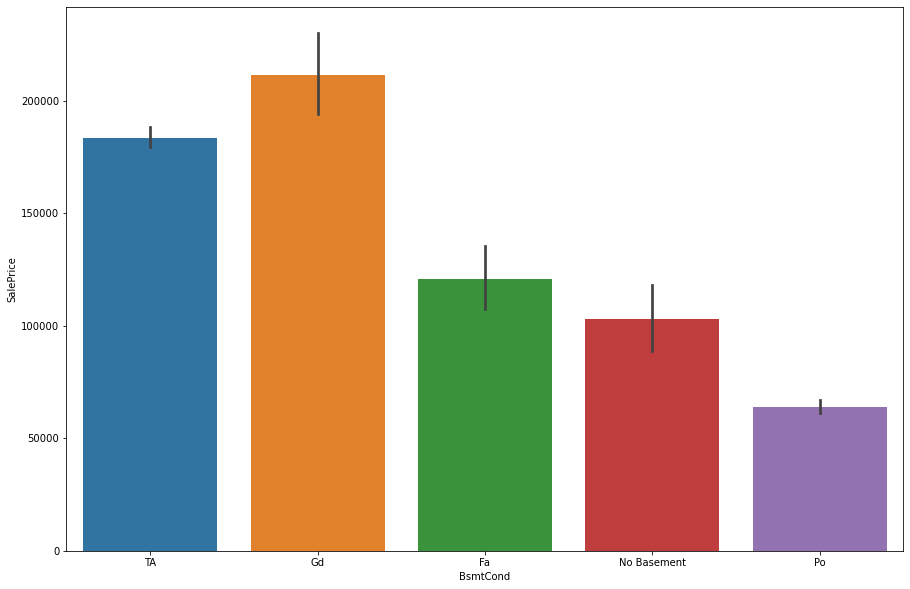

---------------- BsmtExposure -------------------


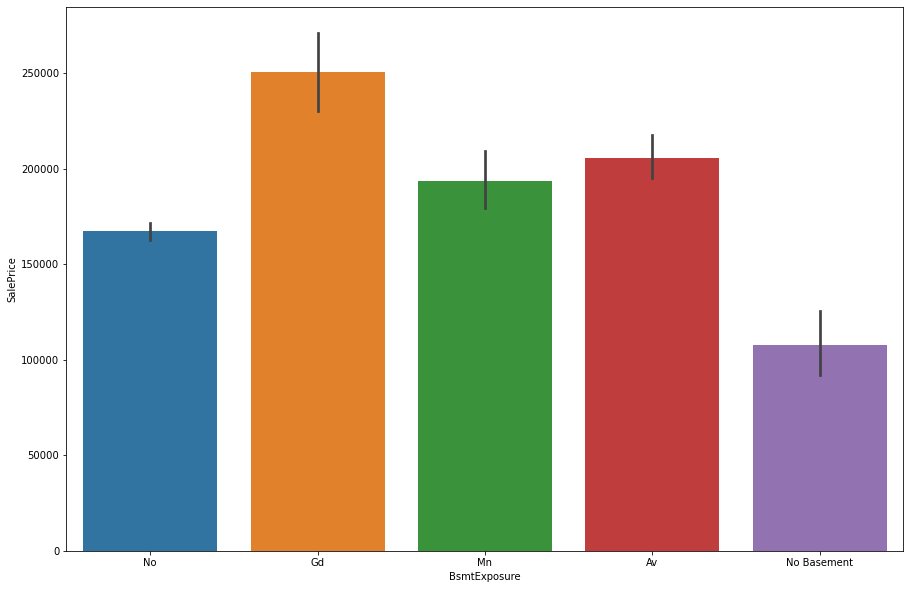

---------------- BsmtFinType1 -------------------


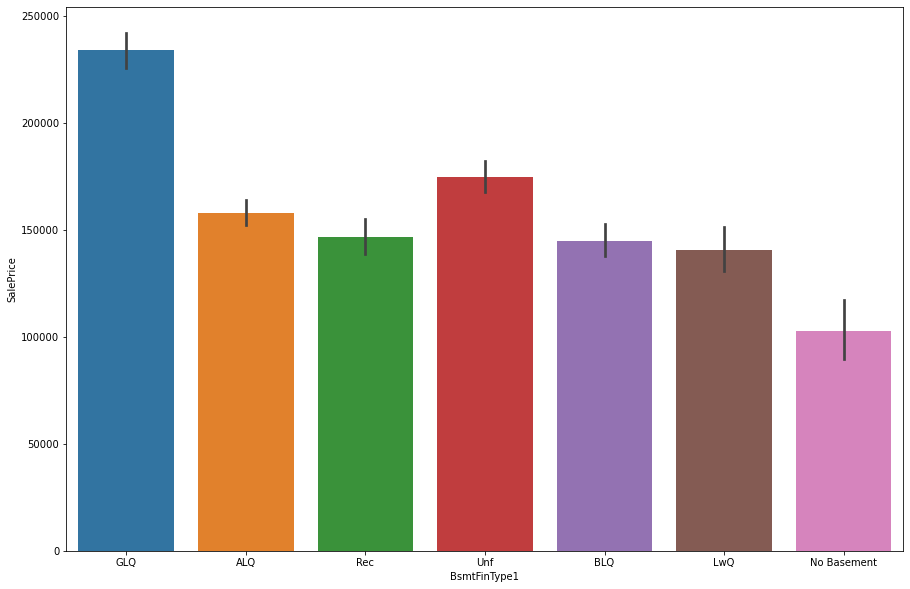

---------------- BsmtFinType2 -------------------


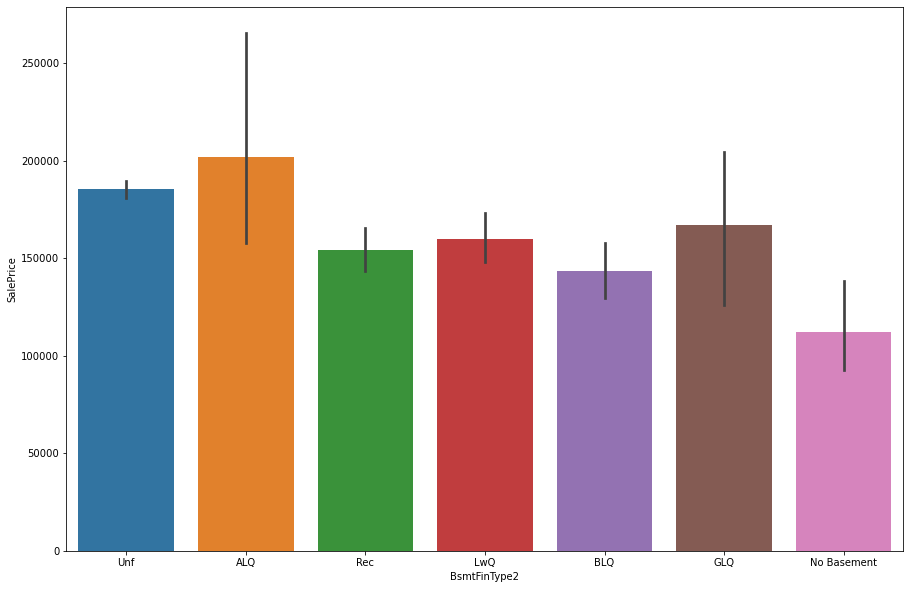

---------------- Heating -------------------


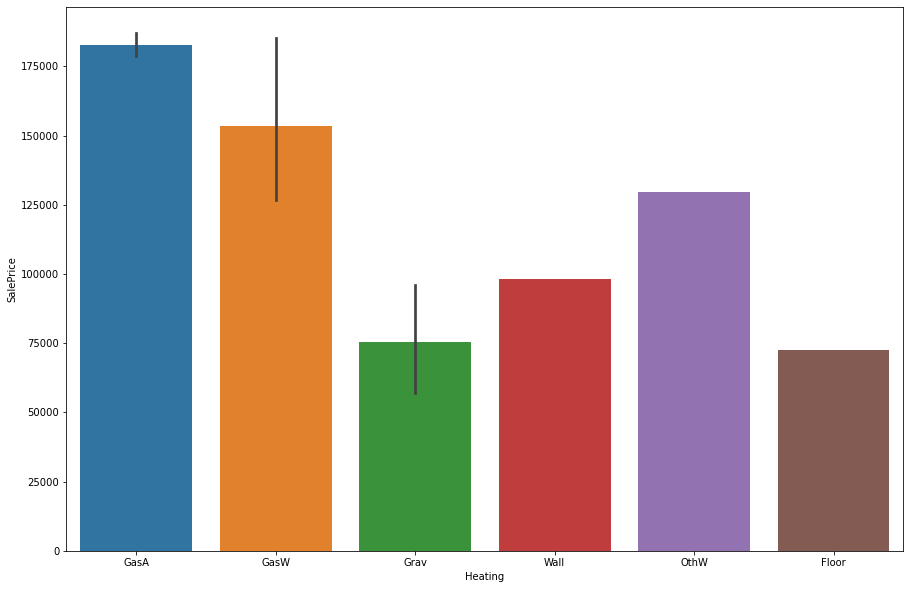

---------------- HeatingQC -------------------


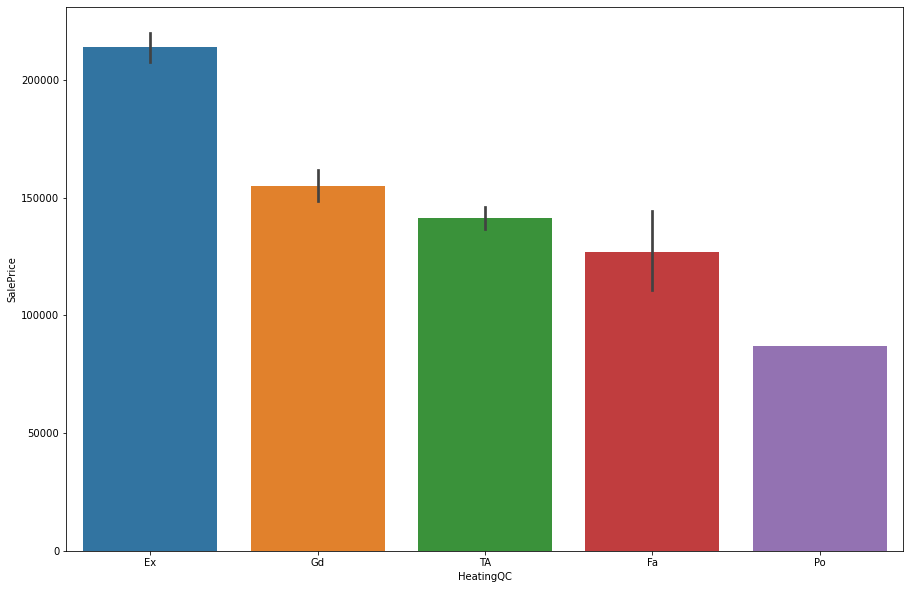

---------------- CentralAir -------------------


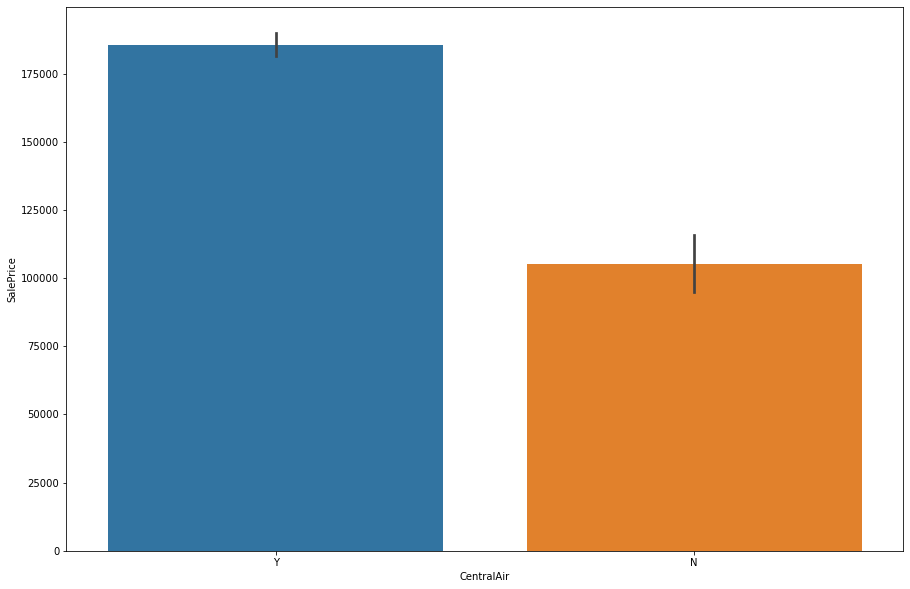

---------------- Electrical -------------------


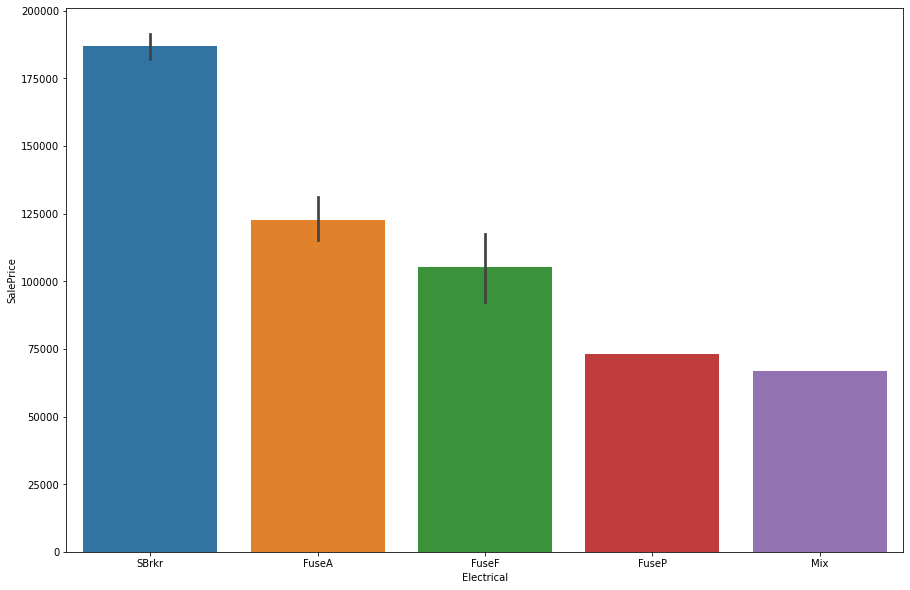

---------------- KitchenQual -------------------


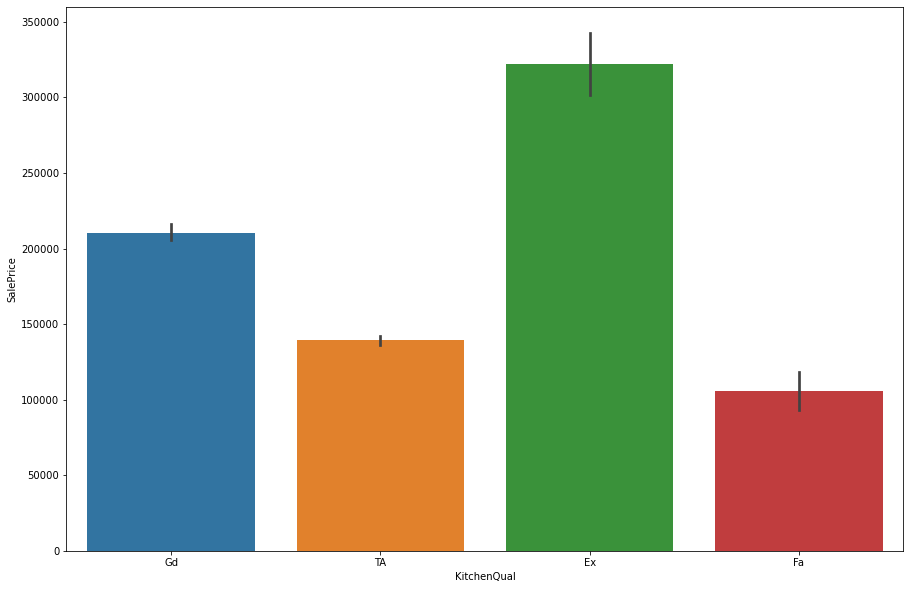

---------------- Functional -------------------


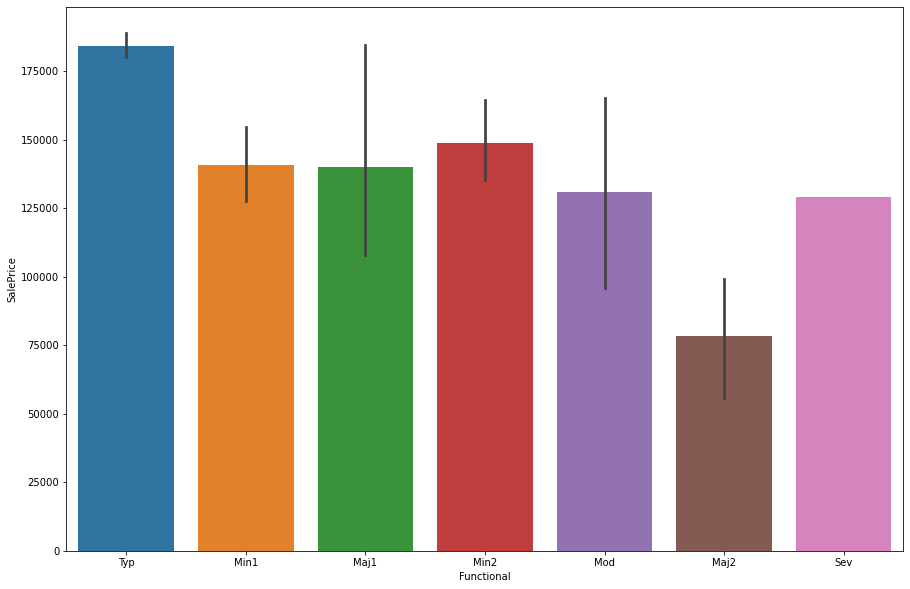

---------------- FireplaceQu -------------------


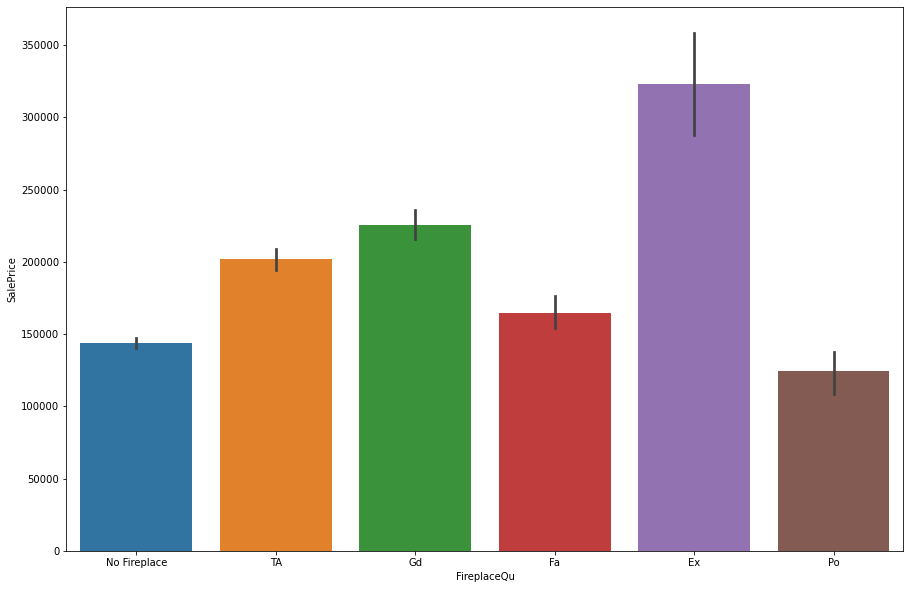

---------------- GarageType -------------------


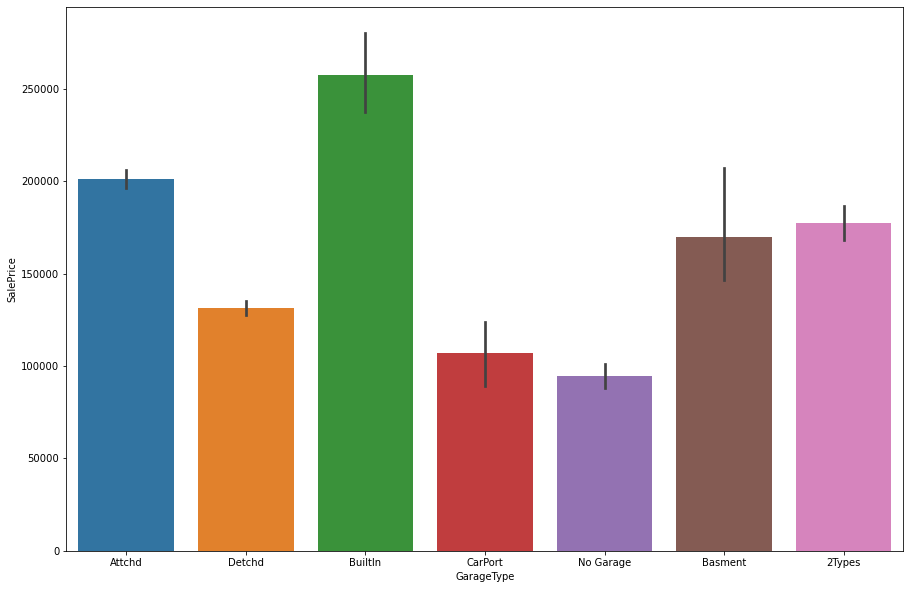

---------------- GarageFinish -------------------


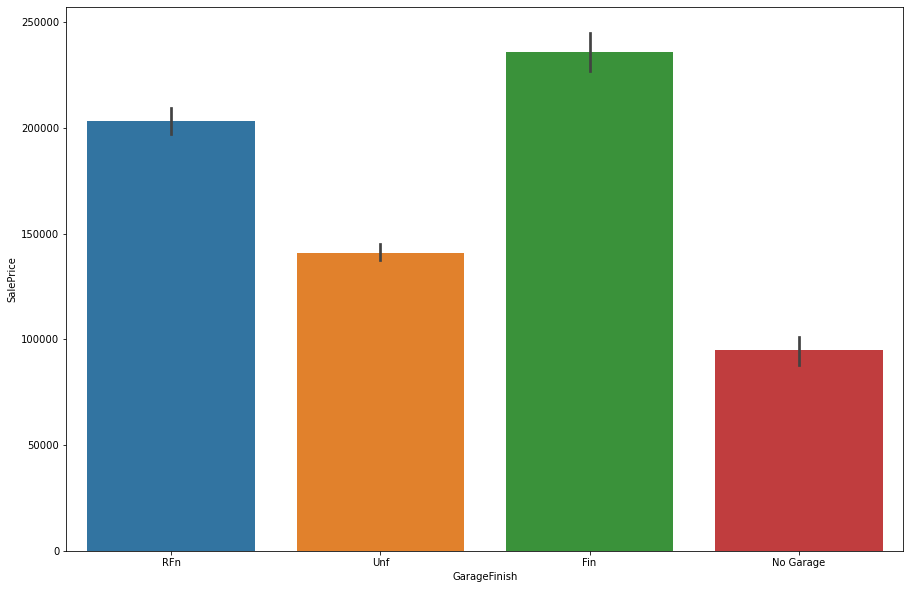

---------------- GarageQual -------------------


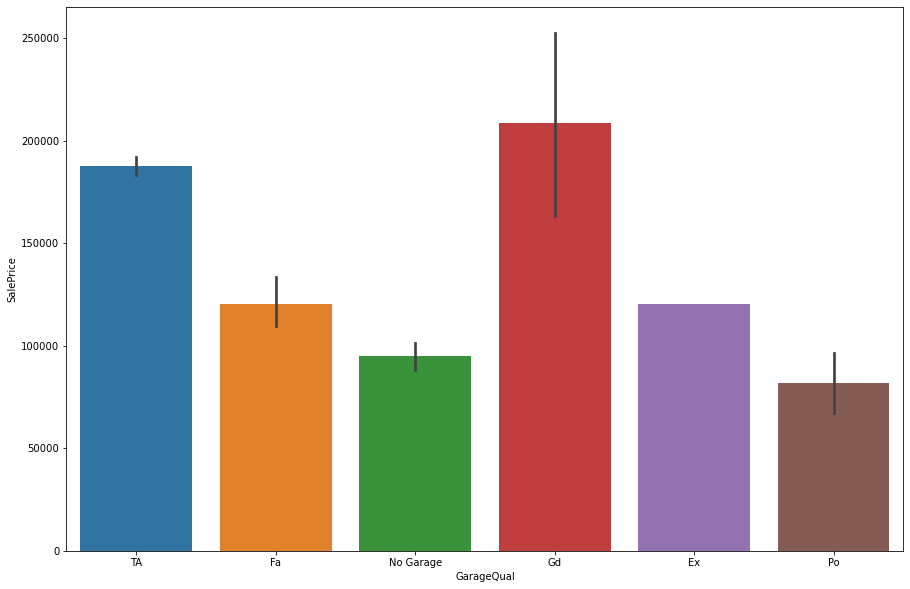

---------------- GarageCond -------------------


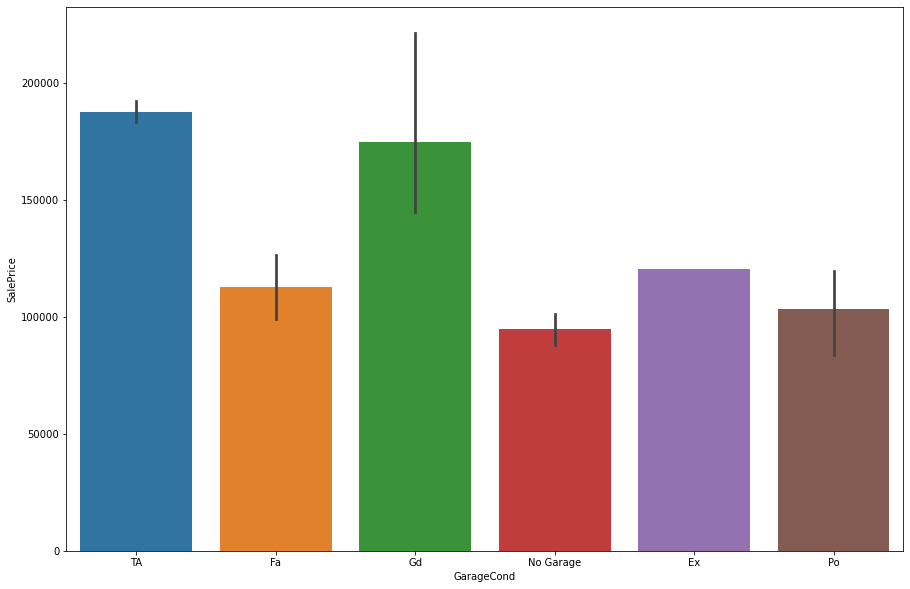

---------------- PavedDrive -------------------


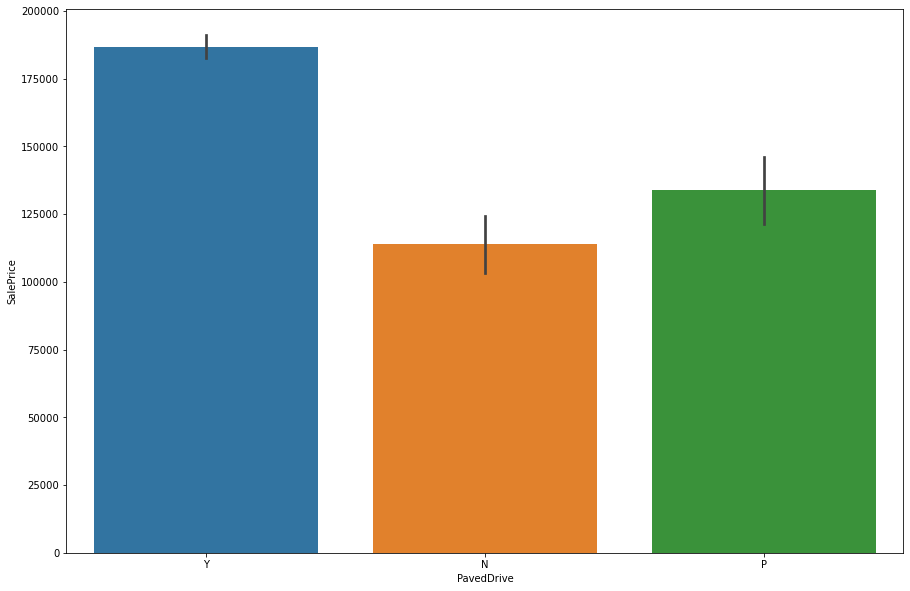

---------------- PoolQC -------------------


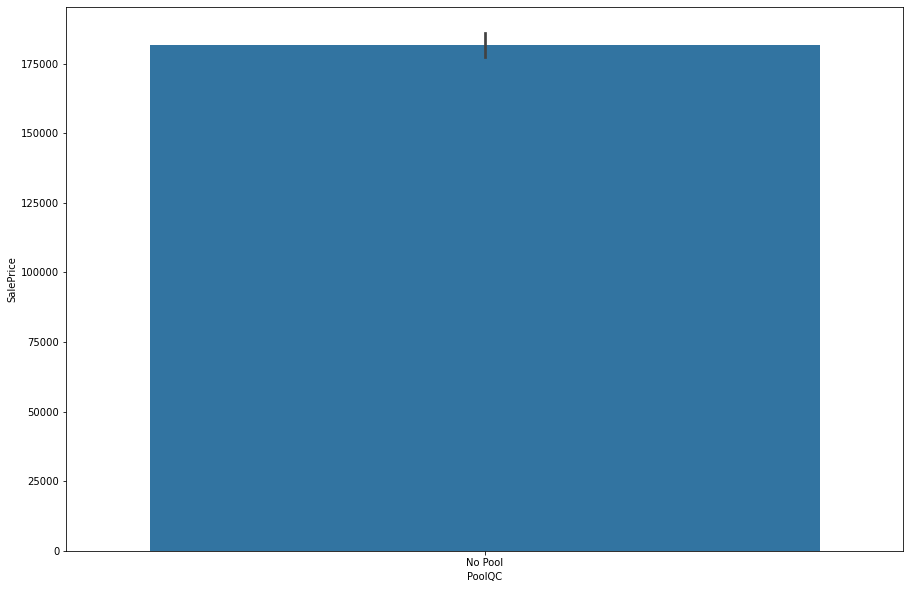

---------------- Fence -------------------


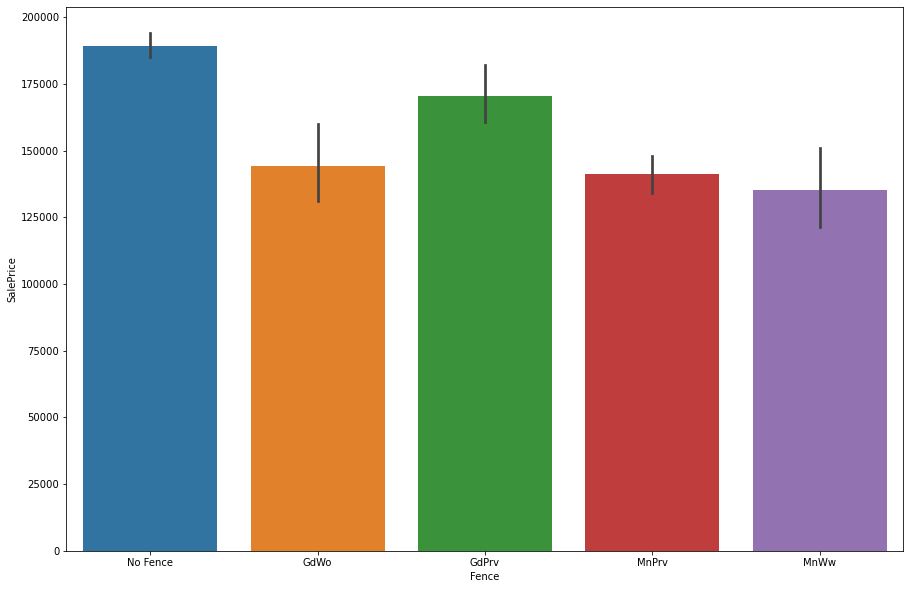

---------------- MiscFeature -------------------


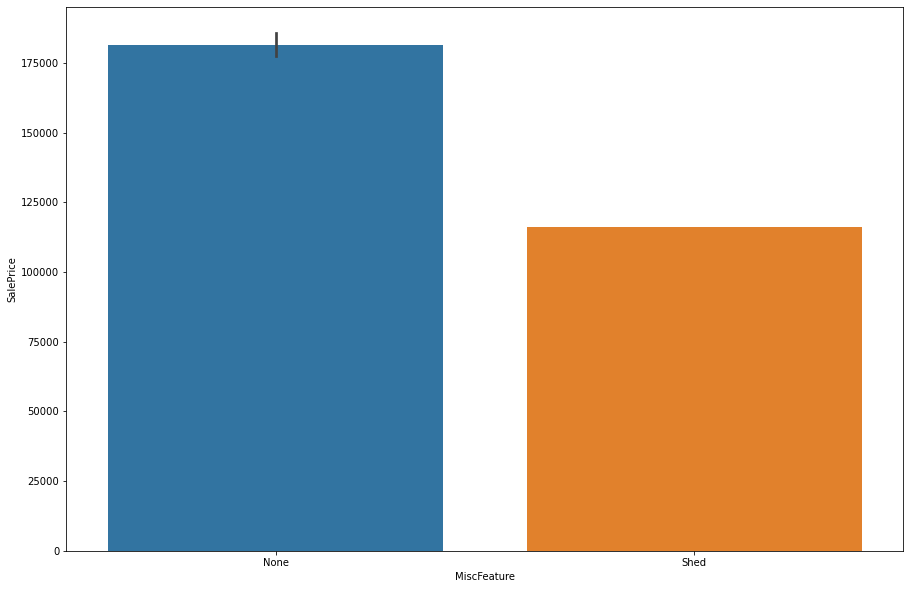

---------------- MoSold -------------------


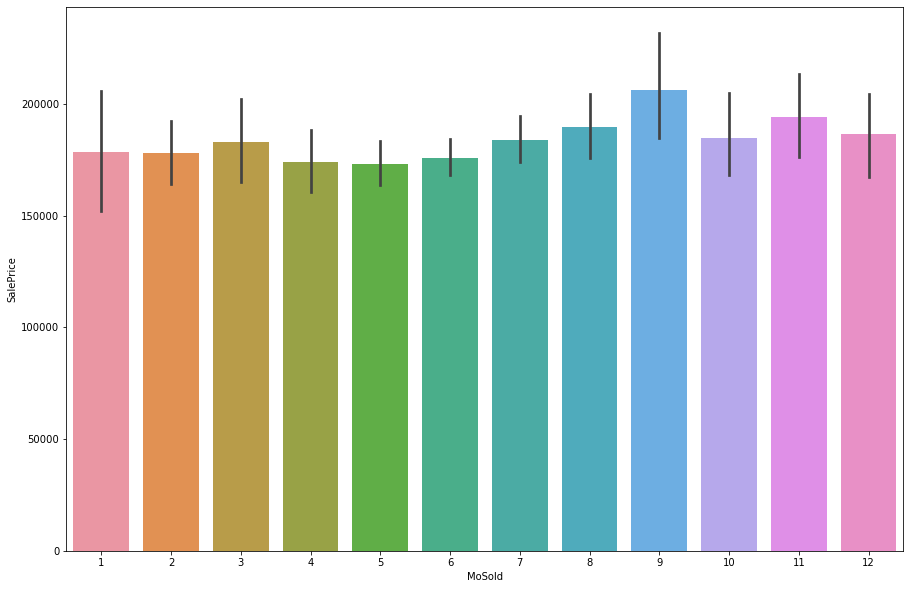

---------------- YrSold -------------------


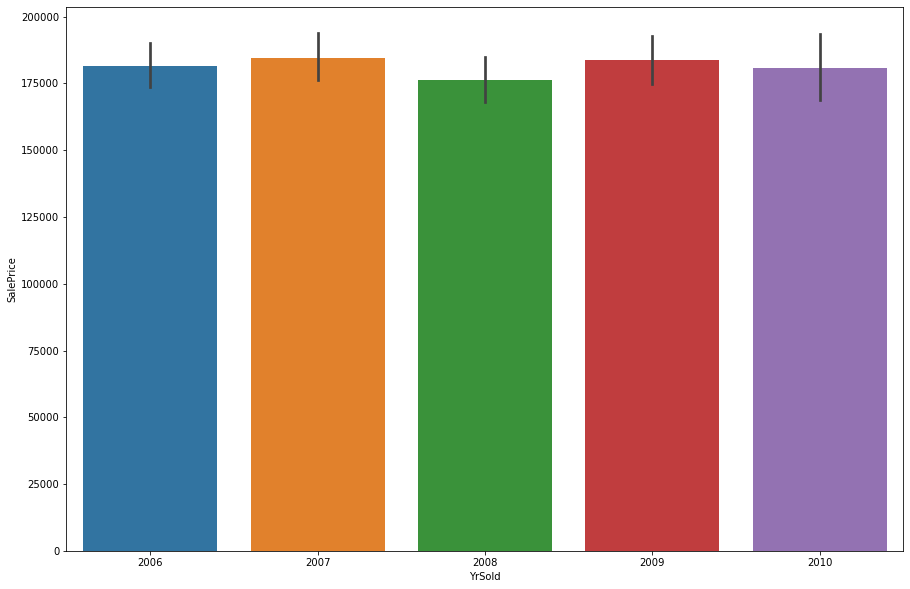

---------------- SaleType -------------------


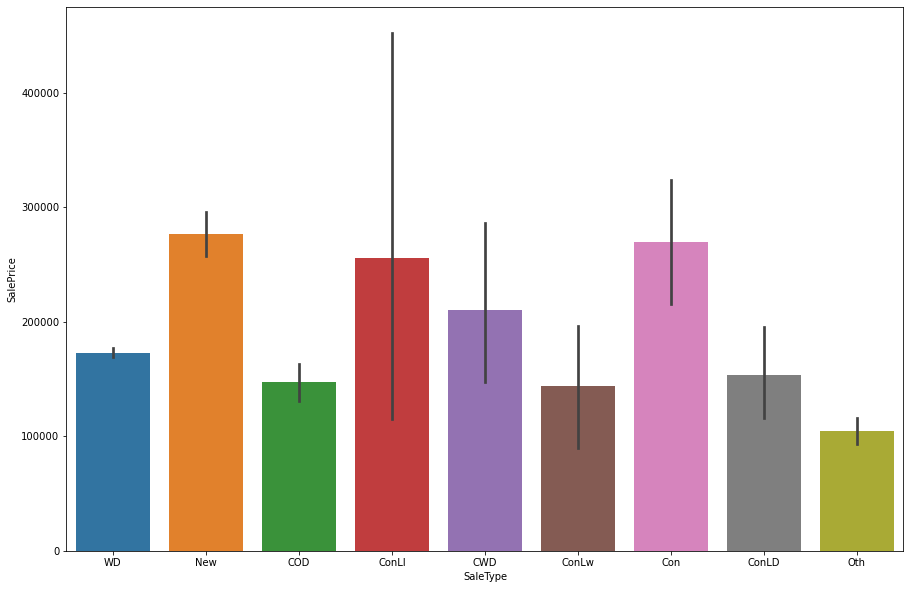

---------------- SaleCondition -------------------


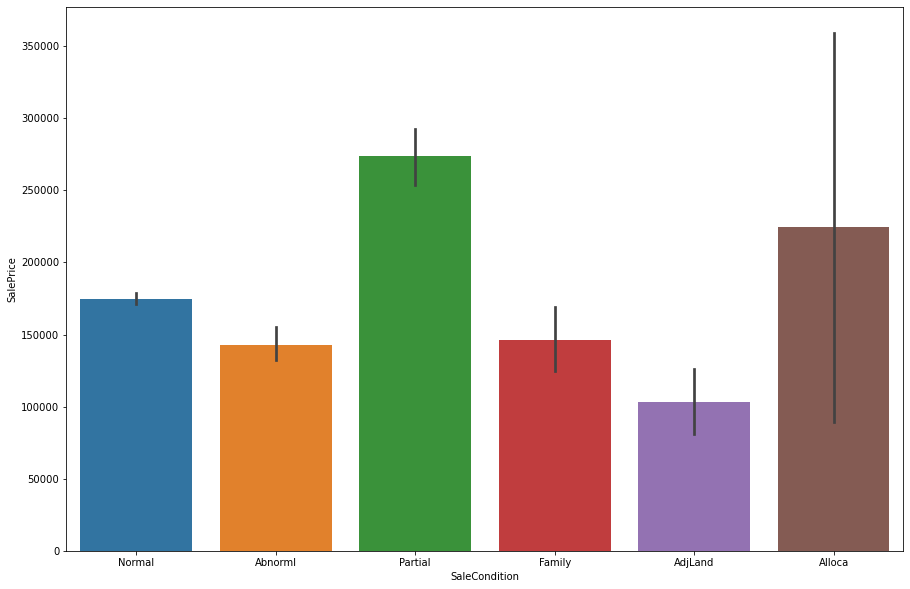

In [148]:
##  Catergorical Variables - Pairplot

for i in categorical_col:
    plt.figure(figsize=(15, 10))
    print("----------------",i,"-------------------")
    sns.barplot(x = housing[i],y = housing['SalePrice'])
    plt.show()

#sns.pairplot(housing[continuous_col],kind='scatter')

---------------- LotFrontage -------------------


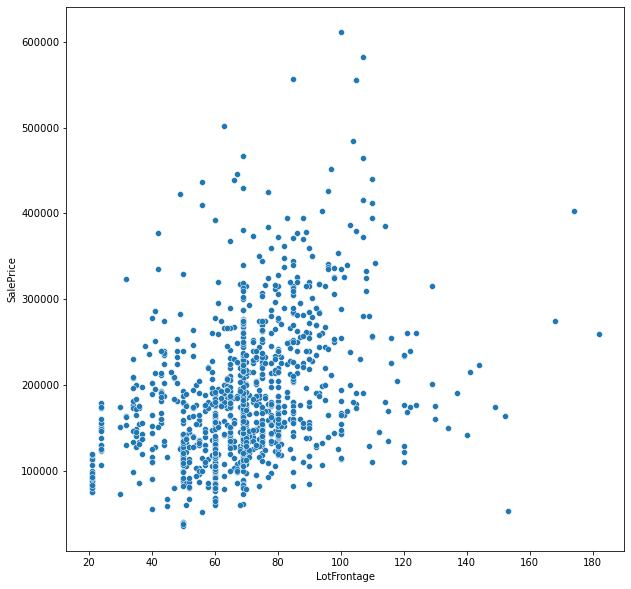

---------------- LotArea -------------------


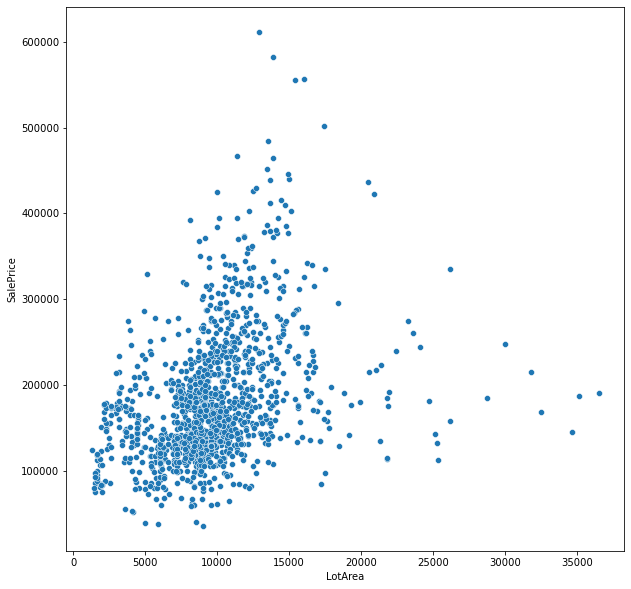

---------------- MasVnrArea -------------------


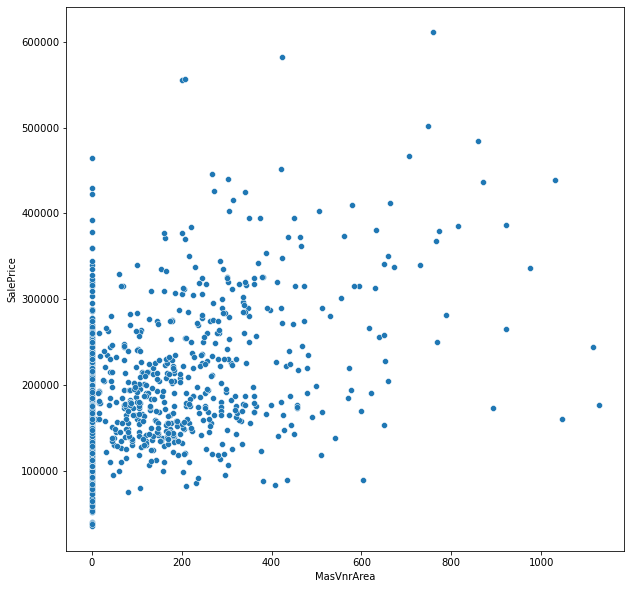

---------------- BsmtFinSF1 -------------------


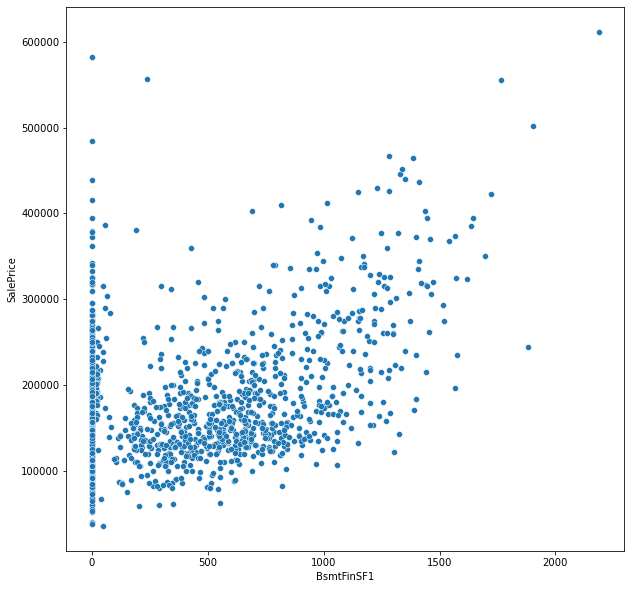

---------------- BsmtFinSF2 -------------------


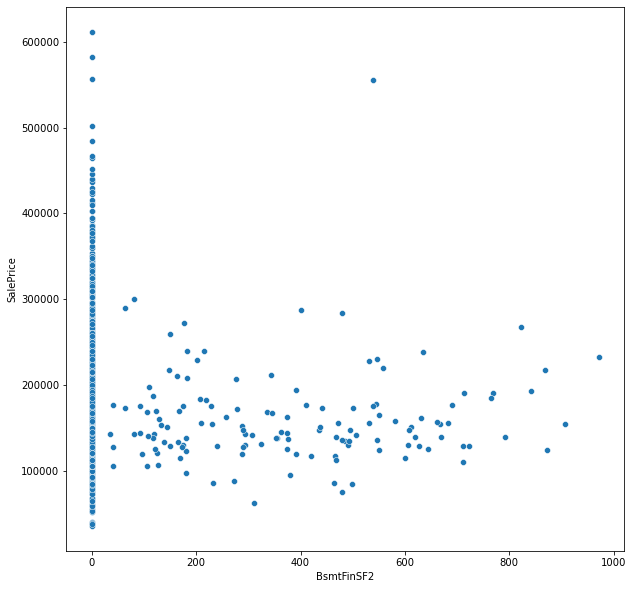

---------------- BsmtUnfSF -------------------


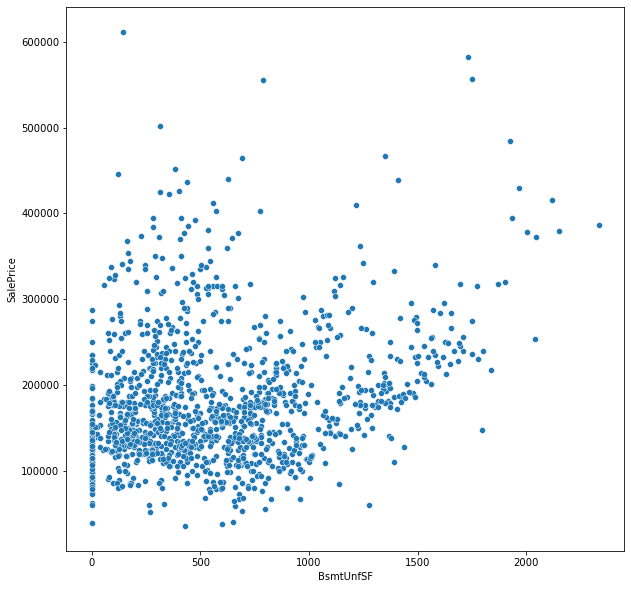

---------------- TotalBsmtSF -------------------


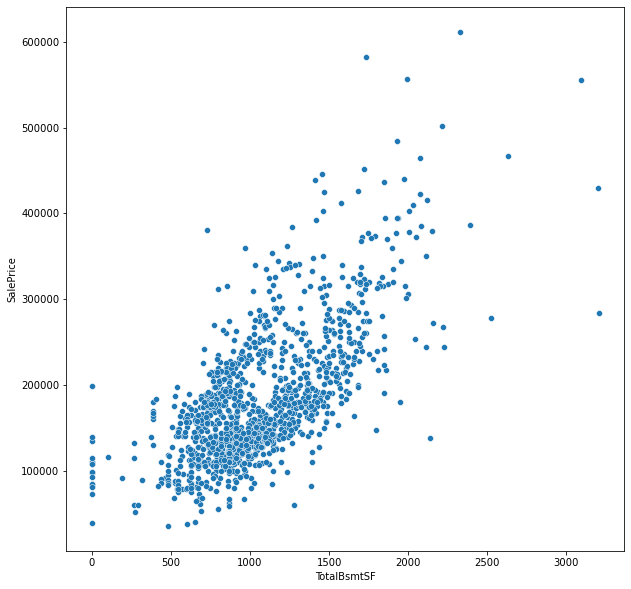

---------------- 1stFlrSF -------------------


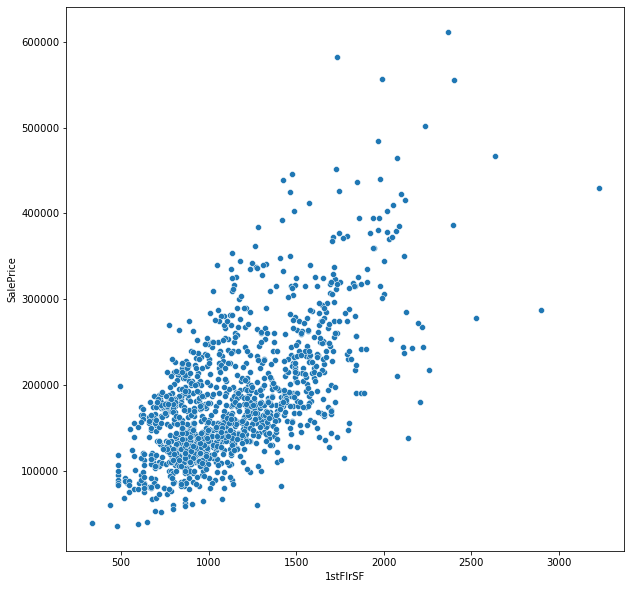

---------------- 2ndFlrSF -------------------


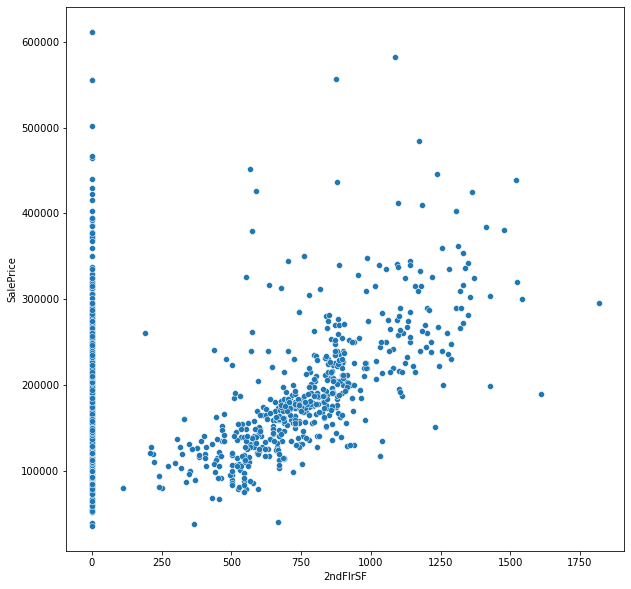

---------------- LowQualFinSF -------------------


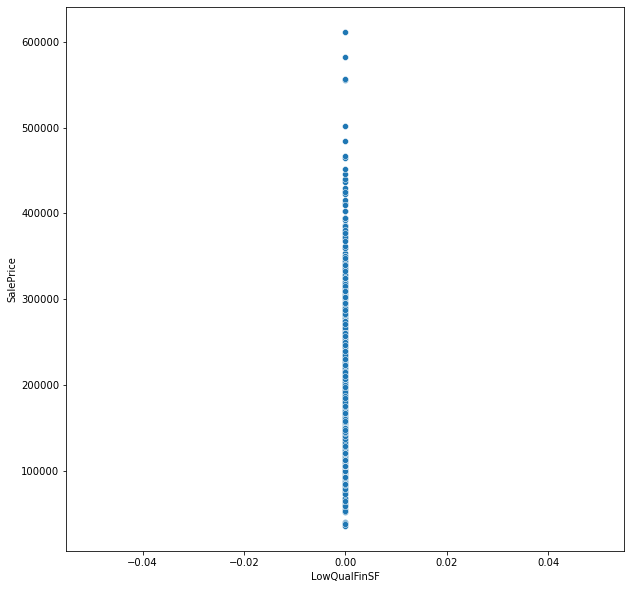

---------------- GrLivArea -------------------


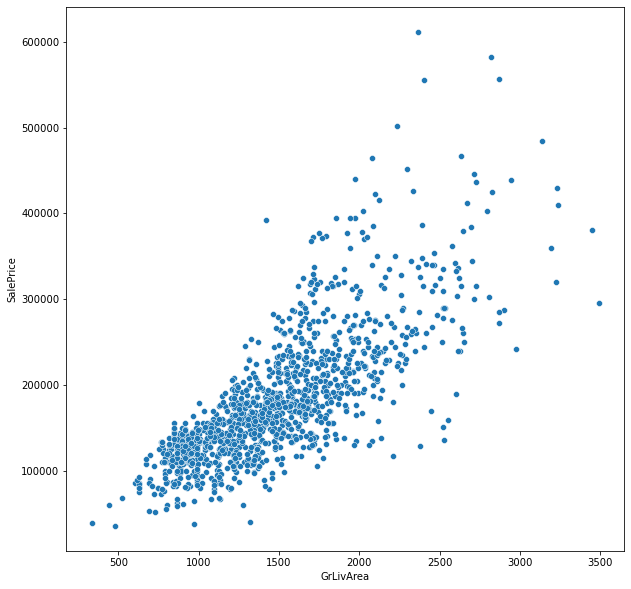

---------------- BsmtFullBath -------------------


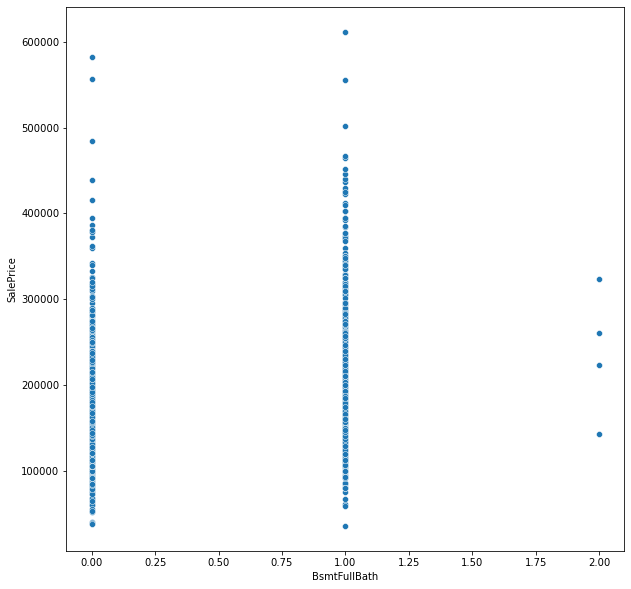

---------------- BsmtHalfBath -------------------


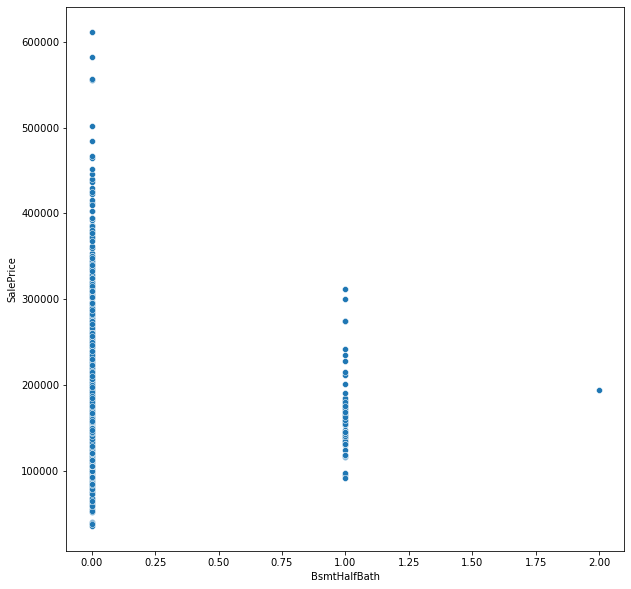

---------------- FullBath -------------------


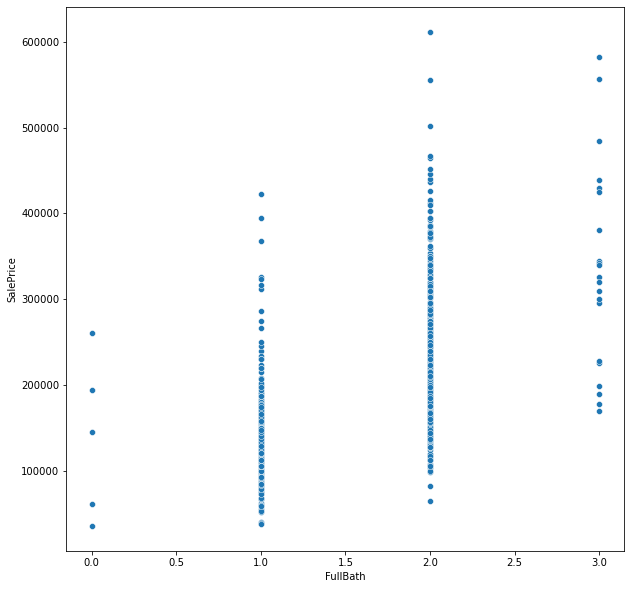

---------------- HalfBath -------------------


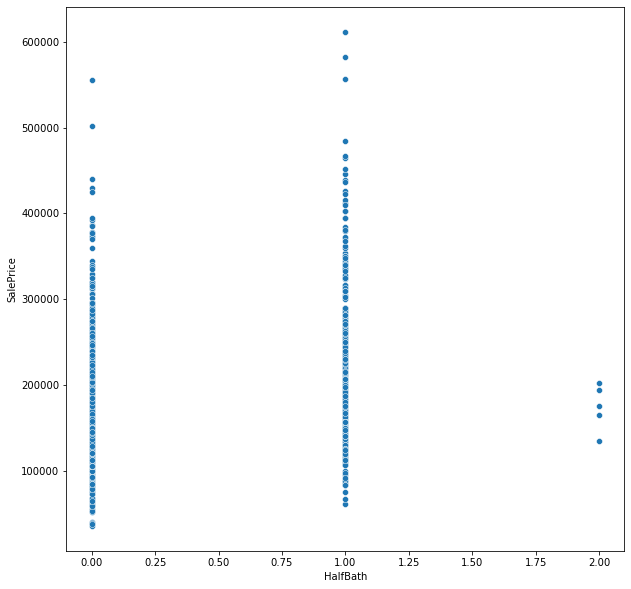

---------------- BedroomAbvGr -------------------


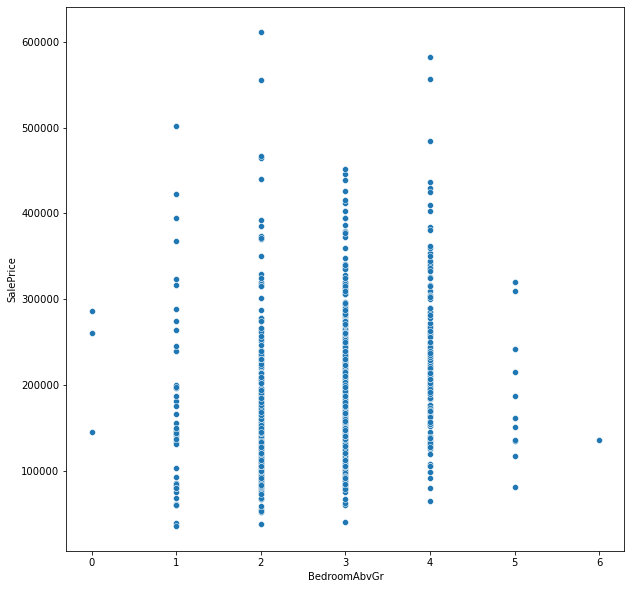

---------------- KitchenAbvGr -------------------


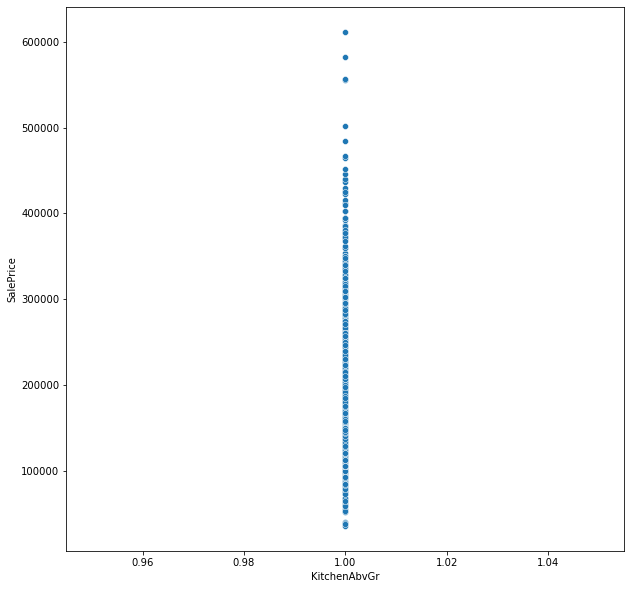

---------------- TotRmsAbvGrd -------------------


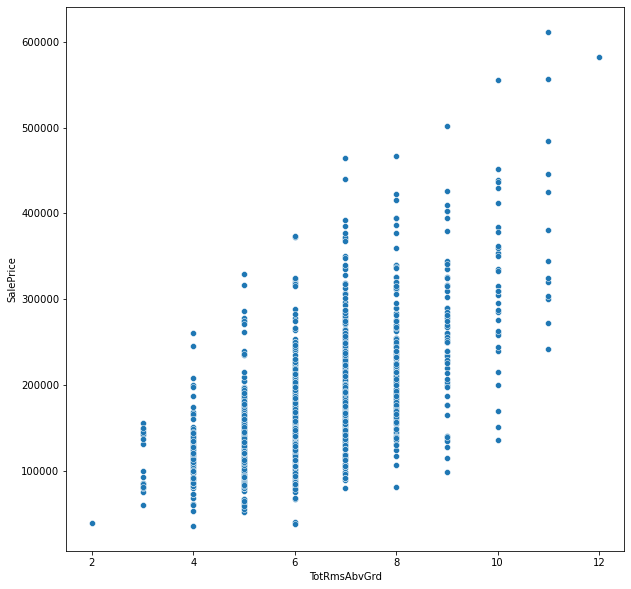

---------------- Fireplaces -------------------


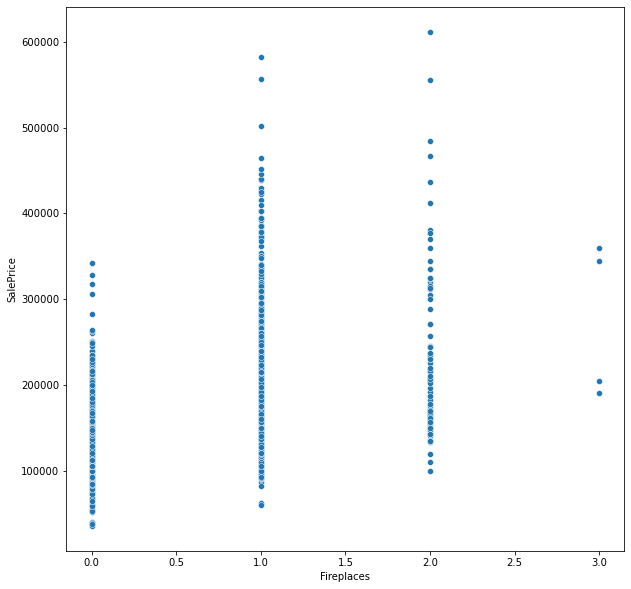

---------------- GarageYrBlt -------------------


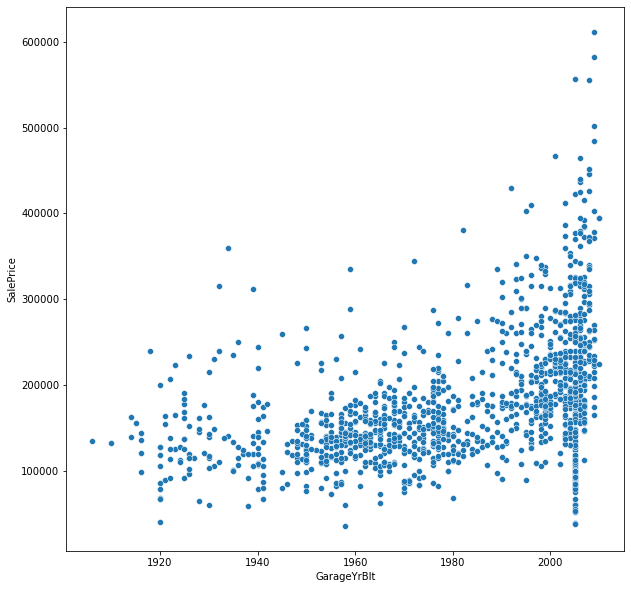

---------------- GarageCars -------------------


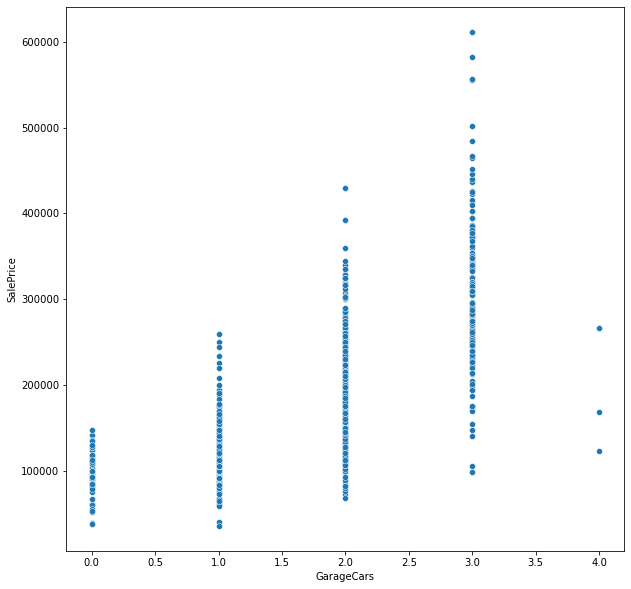

---------------- GarageArea -------------------


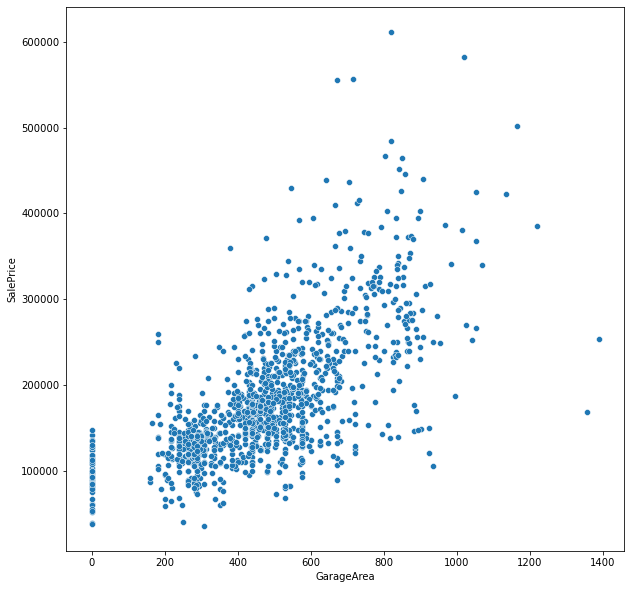

---------------- WoodDeckSF -------------------


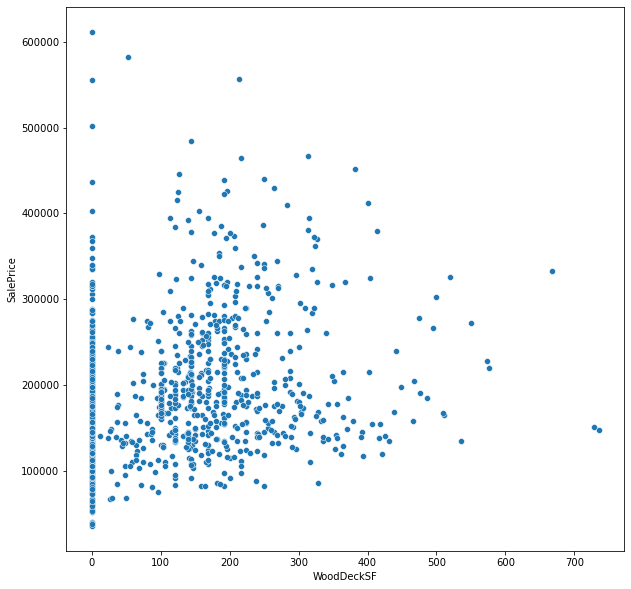

---------------- OpenPorchSF -------------------


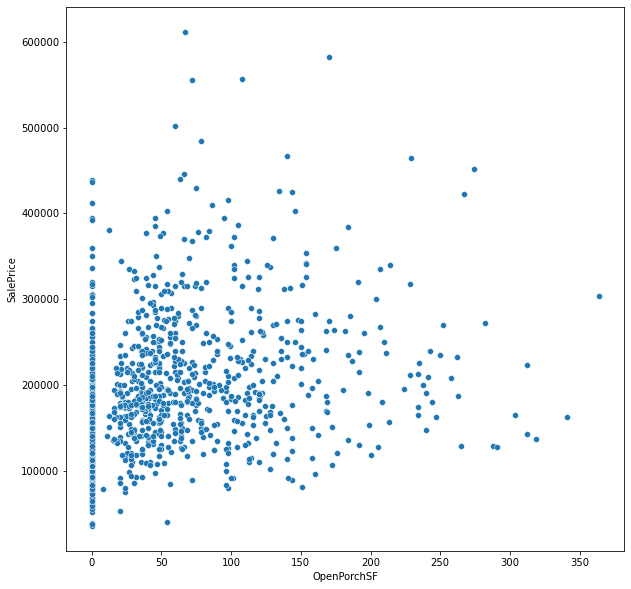

---------------- EnclosedPorch -------------------


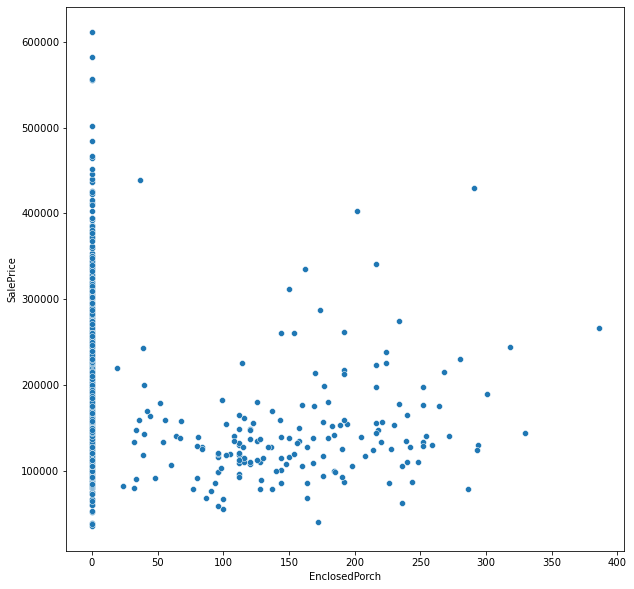

---------------- 3SsnPorch -------------------


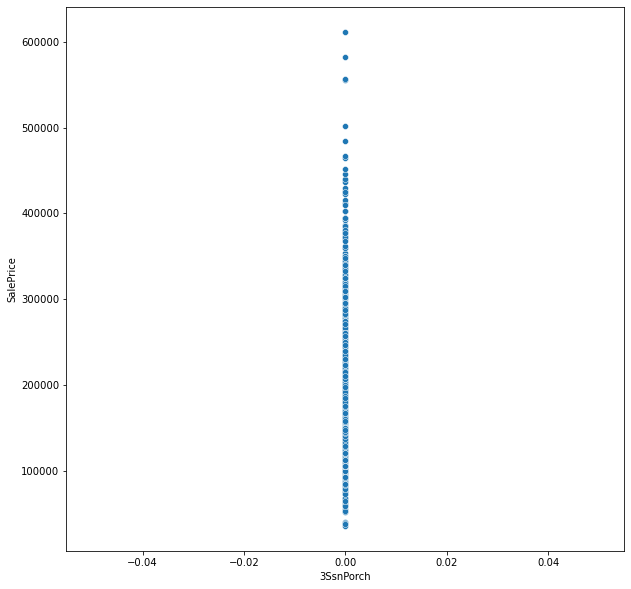

---------------- ScreenPorch -------------------


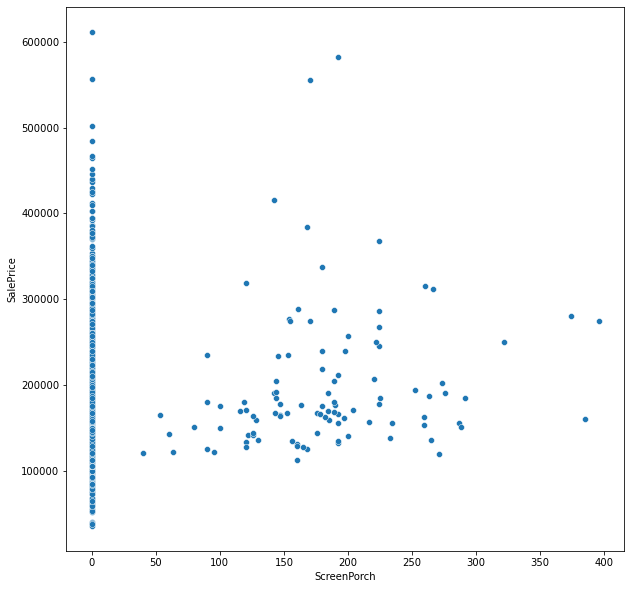

---------------- PoolArea -------------------


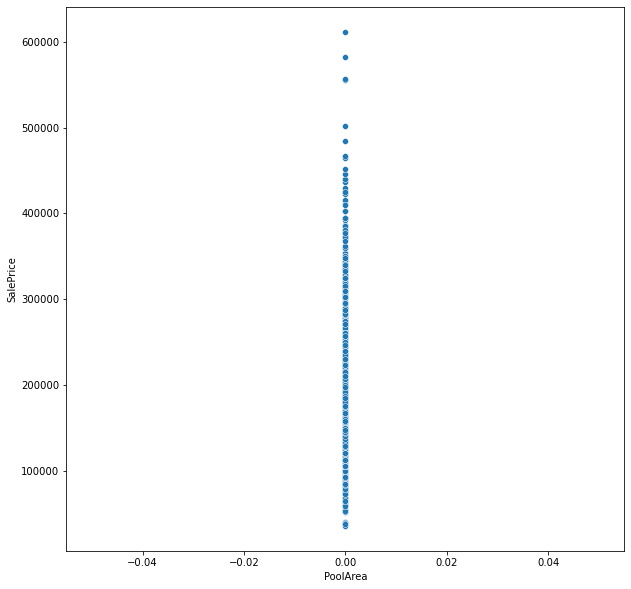

---------------- MiscVal -------------------


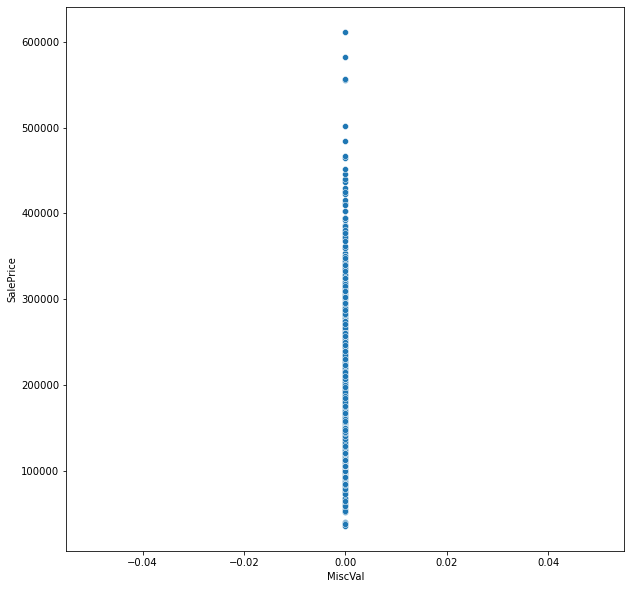

---------------- SalePrice -------------------


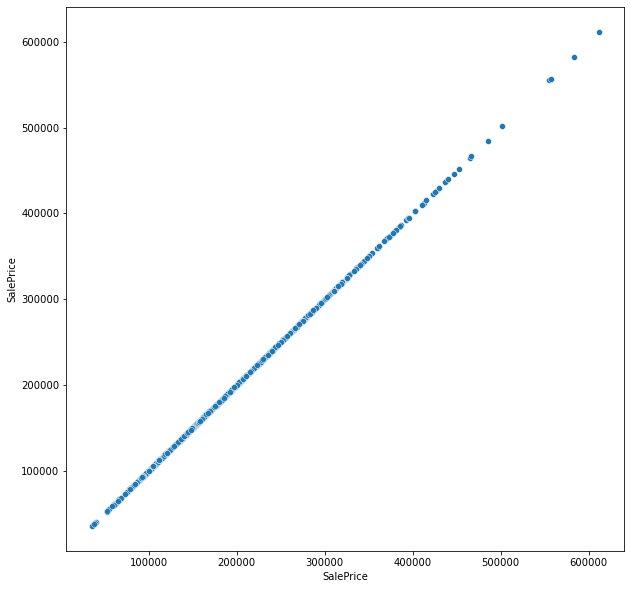

In [149]:
for i in continuous_col:
    plt.figure(figsize=(10, 10))
    print("----------------",i,"-------------------")
    sns.scatterplot(x=housing[i],y=housing['SalePrice'])
    plt.show()


#### Multivariate Analysis

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

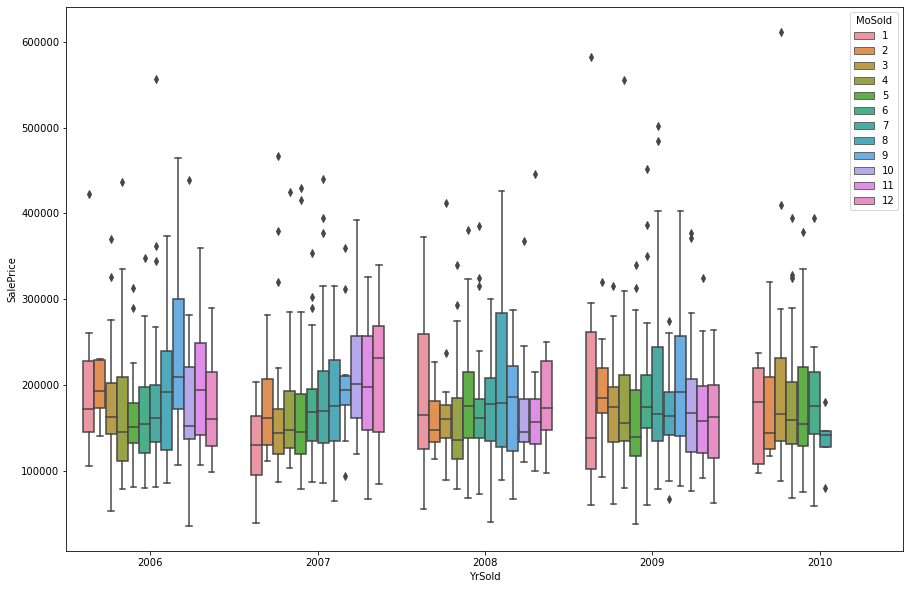

In [150]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=housing["YrSold"],y=housing['SalePrice'],hue=housing["MoSold"])

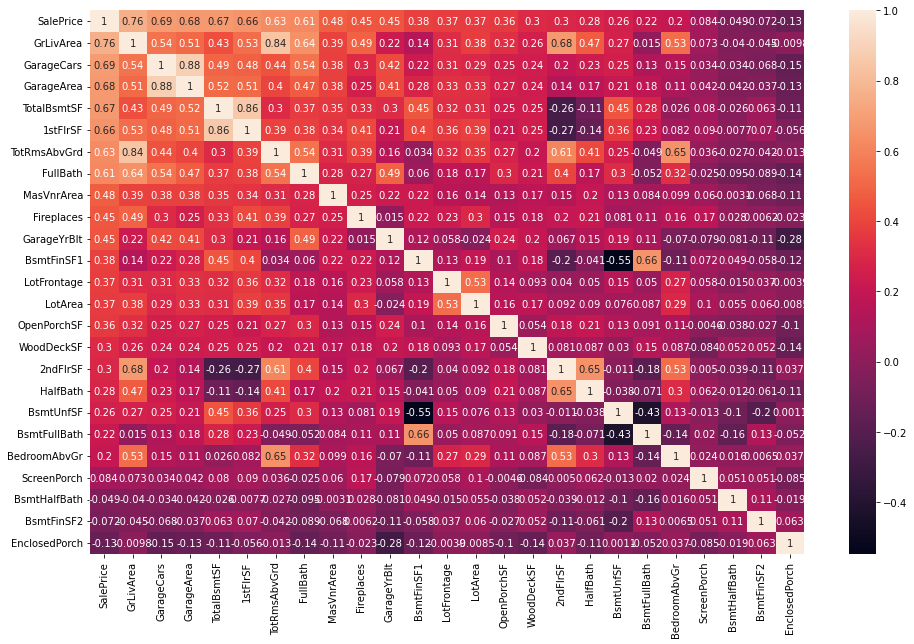

In [151]:
# sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = housing.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index

sns.heatmap(housing[cols].corr(),annot=True)
plt.show()

### GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, TotRmsAbvGrd, FullBath are highly correlated to Saleprice


### Dummy Variables

In [152]:
housing_checkpoint= housing

In [153]:
housing = housing_checkpoint

In [154]:
housing_checkpoint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1266 non-null   object 
 1   MSZoning       1266 non-null   object 
 2   LotFrontage    1266 non-null   float64
 3   LotArea        1266 non-null   int64  
 4   Street         1266 non-null   object 
 5   Alley          1266 non-null   object 
 6   LotShape       1266 non-null   object 
 7   LandContour    1266 non-null   object 
 8   Utilities      1266 non-null   object 
 9   LotConfig      1266 non-null   object 
 10  LandSlope      1266 non-null   object 
 11  Neighborhood   1266 non-null   object 
 12  Condition1     1266 non-null   object 
 13  Condition2     1266 non-null   object 
 14  BldgType       1266 non-null   object 
 15  HouseStyle     1266 non-null   object 
 16  OverallQual    1266 non-null   object 
 17  OverallCond    1266 non-null   object 
 18  YearBuil

In [155]:
housing=pd.get_dummies(housing,drop_first=True)
housing.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=448)

In [156]:
housing.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0          856       856       854             0  ...               0   
1         1262      1262         0             0  ...               0   
2          920       920       866             0  ...               0   
3          756       961       756             0  ...               0   
4         1145      1145      1053             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 448 columns]

In [157]:
housing.shape

(1266, 448)

In [158]:
y = housing["SalePrice"]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453     84500
1454    185000
1455    175000
1456    210000
1459    147500
Name: SalePrice, Length: 1266, dtype: int64

In [159]:
X = housing.drop(columns = 'SalePrice')
X

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0     8450       196.0         706           0        150   
1            80.0     9600         0.0         978           0        284   
2            68.0    11250       162.0         486           0        434   
3            60.0     9550         0.0         216           0        540   
4            84.0    14260       350.0         655           0        490   
...           ...      ...         ...         ...         ...        ...   
1453         90.0    17217         0.0           0           0       1140   
1454         62.0     7500         0.0         410           0        811   
1455         62.0     7917         0.0           0           0        953   
1456         85.0    13175       119.0         790         163        589   
1459         75.0     9937         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0             856       856       854             0  ...               0   
1            1262      1262         0             0  ...               0   
2             920       920       866             0  ...               0   
3             756       961       756             0  ...               0   
4            1145      1145      1053             0  ...               0   
...           ...       ...       ...           ...  ...             ...   
1453         1140      1140         0             0  ...               0   
1454         1221      1221         0             0  ...               0   
1455          953       953       694             0  ...               0   
1456         1542      2073         0             0  ...               0   
1459         1256      1256         0             0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1453               0             0             0            1   
1454               0             0             0            1   
1455               0             0             0            1   
1456               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1453                      0                     0                     0   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1453                     0                      0  
1454                     1                      0  
1455              

In [160]:
#To check for any null values in data

In [161]:
X.isnull().sum().sum()

0

In [162]:
y.isnull().sum().sum()

0

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [164]:
X_train

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
686          84.0    10207         0.0           0           0        874   
933          63.0     8487       210.0          20           0       1480   
1217         72.0     8640        72.0         936           0        364   
485          80.0     9600         0.0         607           0        506   
1303         73.0     8688       228.0           0           0       1616   
...           ...      ...         ...         ...         ...        ...   
937          75.0     9675         0.0         341           0        772   
64           69.0     9375       573.0         739           0        318   
408         109.0    14154       350.0           0           0       1063   
96           78.0    10264       183.0        1162           0        426   
926          93.0    11999       340.0           0           0       1181   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
686           874       874       887             0  ...               0   
933          1500      1500         0             0  ...               0   
1217         1300      1314         0             0  ...               0   
485          1113      1113         0             0  ...               0   
1303         1616      1616         0             0  ...               0   
...           ...       ...       ...           ...  ...             ...   
937          1113      1113       858             0  ...               0   
64           1057      1057       977             0  ...               0   
408          1063      1071      1101             0  ...               0   
96           1588      1588         0             0  ...               0   
926          1181      1234      1140             0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
686                0             1             0            0   
933                0             0             0            1   
1217               0             1             0            0   
485                0             0             0            1   
1303               0             0             0            1   
...              ...           ...           ...          ...   
937                0             0             0            1   
64                 0             0             0            1   
408                0             1             0            0   
96                 0             0             0            1   
926                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
686                       0                     0                     0   
933                       0                     0                     0   
1217                      0                     0                     0   
485                       0                     0                     0   
1303                      0                     0                     0   
...                     ...                   ...                   ...   
937                       0                     0                     0   
64                        0                     0                     0   
408                       0                     0                     0   
96                        0                     0                     0   
926                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
686                      0                      1  
933                      1                      0  
1217                     0                      1  
485                      1                      0  
1303                     1                      0  
...                    ...                    ...  
937                      1                      0  
64                       1                      0  
408               

In [165]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (886, 447)
X_test shape (380, 447)
y_train shape (886,)
y_test shape (380,)


### Scaling of numeric varaibles



In [166]:
X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
686          84.0    10207         0.0           0           0        874   
933          63.0     8487       210.0          20           0       1480   
1217         72.0     8640        72.0         936           0        364   
485          80.0     9600         0.0         607           0        506   
1303         73.0     8688       228.0           0           0       1616   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
686           874       874       887             0  ...               0   
933          1500      1500         0             0  ...               0   
1217         1300      1314         0             0  ...               0   
485          1113      1113         0             0  ...               0   
1303         1616      1616         0             0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
686                0             1             0            0   
933                0             0             0            1   
1217               0             1             0            0   
485                0             0             0            1   
1303               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
686                       0                     0                     0   
933                       0                     0                     0   
1217                      0                     0                     0   
485                       0                     0                     0   
1303                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
686                      0                      1  
933                      1                      0  
1217                     0                      1  
485                      1                      0  
1303                     1                      0  

[5 rows x 447 columns]

In [167]:
cols = X_train.columns
cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=447)

In [168]:
type(X_train)


pandas.core.frame.DataFrame

In [169]:
#Scaling using MinMax
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [170]:
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])


In [171]:
type(X_train)


pandas.core.frame.DataFrame

In [172]:
#Check the shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(886, 447)
(380, 447)
(886,)
(380,)


In [173]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

## Ridge Modelling

In [174]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [175]:
# list of alphas to tune

params = {'alpha': np.logspace(-3, 3, 100)}

In [176]:
params

{'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
        1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
        3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
        5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
        9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
        1.62975083e-02, 1.87381742e-02, 2.15443469e-02, 2.47707636e-02,
        2.84803587e-02, 3.27454916e-02, 3.76493581e-02, 4.32876128e-02,
        4.97702356e-02, 5.72236766e-02, 6.57933225e-02, 7.56463328e-02,
        8.69749003e-02, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
        1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
        2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
        4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
        8.11130831e-01, 9.32603347e-01, 1.07226722e+00, 1.23284674e+00,
        1.41747416e+00, 1.62975083e+00, 1.87381742e+00,

In [177]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1....
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [178]:
ridge_model_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_model_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.045158      0.012145         0.016660        0.001481       0.001   
1       0.053725      0.005635         0.011398        0.011605     0.00115   
2       0.043748      0.006251         0.012500        0.006250    0.001322   
3       0.043751      0.006247         0.012496        0.006248     0.00152   
4       0.036123      0.006348         0.009370        0.007651    0.001748   

                             params  split0_test_score  split1_test_score  \
0                  {'alpha': 0.001}      -23306.824637      -24264.038121   
1  {'alpha': 0.0011497569953977356}      -23285.781058      -24248.336847   
2  {'alpha': 0.0013219411484660286}      -23263.626181      -24230.383755   
3  {'alpha': 0.0015199110829529332}      -23238.889365      -24209.872108   
4   {'alpha': 0.001747528400007683}      -23211.346193      -24186.458284   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0      -23027.446795      -24901.110025  ...    -23877.530197      670.158964   
1      -23016.344434      -24885.726743  ...    -23861.947991      670.010092   
2      -23003.645324      -24868.064108  ...    -23844.513291      669.506263   
3      -22989.130277      -24847.793350  ...    -23824.710026      668.820115   
4      -22972.553058      -24824.542108  ...    -23802.244615      667.901122   

   rank_test_score  split0_train_score  split1_train_score  \
0               86        -8097.547285        -8454.210461   
1               85        -8098.154426        -8454.540870   
2               84        -8098.841966        -8454.918486   
3               83        -8099.619048        -8455.349687   
4               82        -8100.537959        -8455.841602   

   split2_train_score  split3_train_score  split4_train_score  \
0        -8250.564558        -8765.407926        -7908.853644   
1        -8251.322521        -8765.880799        -7909.912481   
2        -8252.201011        -8766.423296        -7911.167611   
3        -8253.228502        -8767.047477        -7912.611018   
4        -8254.401171        -8767.811741        -7914.248926   

   mean_train_score  std_train_score  
0      -8295.316774       295.534153  
1      -8295.962220       295.339021  
2      -8296.710474       295.105489  
3      -8297.571146       294.838158  
4      -8298.568280       294.547935  

[5 rows x 21 columns]

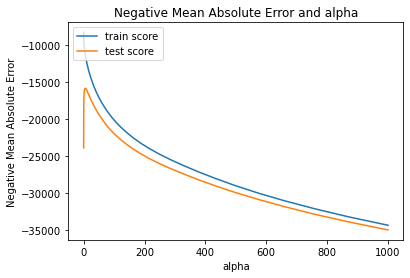

In [179]:
# plotting mean test and train scoes with alpha 
ridge_model_cv_results['param_alpha'] = ridge_model_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(ridge_model_cv_results['param_alpha'], ridge_model_cv_results['mean_train_score'])
plt.plot(ridge_model_cv_results['param_alpha'], ridge_model_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [180]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 5.72236765935022}
-15851.33362321433


## Optimum value of alpha is 5.72 in Ridge Modelling

In [181]:
alpha = 5.72
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=5.72)

In [182]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


print("Number of non-zero Coefficients {}".format(np.sum(ridge.coef_!=0)))
y_pred_train = ridge.predict(X_train)
get_error_stats(y_train,y_pred_train,name='Train')

y_pred_test = ridge.predict(X_test)
get_error_stats(y_test,y_pred_test,name='Test')

Number of non-zero Coefficients 428
MSE Train 287028982.9255326
MAE Score Train 11556.740514253355
R2 Score Train 0.9507601698554867 

MSE Test 593771554.493714
MAE Score Test 15828.323721324741
R2 Score Test 0.8927763401582672 



(593771554.493714, 15828.323721324741, 0.8927763401582672)

In [183]:
y_pred = ridge.predict(X_test)

residual = y_test - y_pred

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

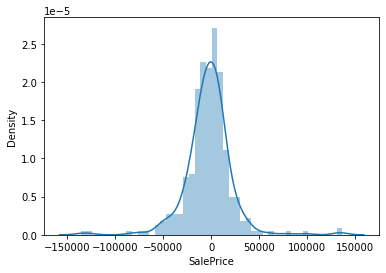

In [184]:
sns.distplot(residual)

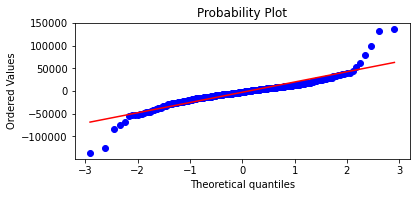

In [185]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

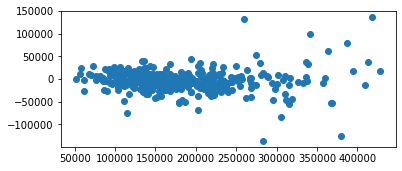

In [186]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

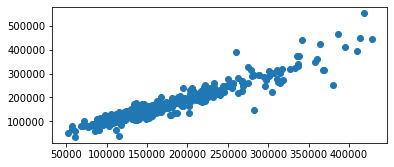

In [187]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

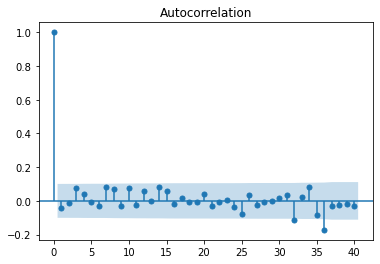

In [188]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

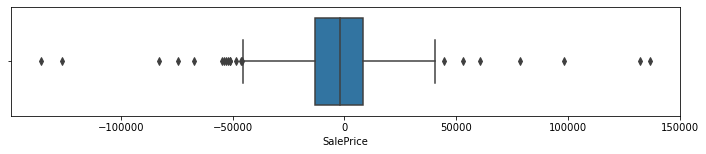

In [189]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

## Lasso Modelling

In [190]:
# list of alphas to tune

params = {'alpha': np.logspace(-3, 3, 100)}
params

{'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
        1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
        3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
        5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
        9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
        1.62975083e-02, 1.87381742e-02, 2.15443469e-02, 2.47707636e-02,
        2.84803587e-02, 3.27454916e-02, 3.76493581e-02, 4.32876128e-02,
        4.97702356e-02, 5.72236766e-02, 6.57933225e-02, 7.56463328e-02,
        8.69749003e-02, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
        1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
        2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
        4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
        8.11130831e-01, 9.32603347e-01, 1.07226722e+00, 1.23284674e+00,
        1.41747416e+00, 1.62975083e+00, 1.87381742e+00,

In [191]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1....
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [192]:
lasso_model_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_model_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.693635      0.085215         0.015118        0.001289       0.001   
1       0.786724      0.052920         0.014791        0.002784     0.00115   
2       0.670347      0.047687         0.008540        0.007616    0.001322   
3       0.478655      0.050588         0.006246        0.007649     0.00152   
4       0.459348      0.021188         0.006243        0.007646    0.001748   

                             params  split0_test_score  split1_test_score  \
0                  {'alpha': 0.001}      -22184.675985      -23446.006694   
1  {'alpha': 0.0011497569953977356}      -22184.602208      -23447.101376   
2  {'alpha': 0.0013219411484660286}      -22184.517393      -23448.359917   
3  {'alpha': 0.0015199110829529332}      -22184.419808      -23449.846015   
4   {'alpha': 0.001747528400007683}      -22184.307781      -23451.531957   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0      -22943.144109      -25281.318587  ...    -23534.140366     1030.526563   
1      -22942.210693      -25280.785087  ...    -23534.041444     1030.450888   
2      -22941.159568      -25280.172091  ...    -23533.932197     1030.362023   
3      -22940.000730      -25279.467644  ...    -23533.822515     1030.253818   
4      -22938.728844      -25278.658471  ...    -23533.705306     1030.124260   

   rank_test_score  split0_train_score  split1_train_score  \
0               87        -8109.916091        -8458.511488   
1               86        -8109.915521        -8458.512622   
2               85        -8109.914904        -8458.514857   
3               84        -8109.914548        -8458.512049   
4               82        -8109.914822        -8458.516304   

   split2_train_score  split3_train_score  split4_train_score  \
0        -8284.766209        -8791.450874        -7936.090060   
1        -8284.769505        -8791.445905        -7936.088067   
2        -8284.773295        -8791.440188        -7936.086040   
3        -8284.777962        -8791.433835        -7936.084145   
4        -8284.784336        -8791.428481        -7936.084835   

   mean_train_score  std_train_score  
0      -8316.146945       294.666130  
1      -8316.146324       294.665160  
2      -8316.145857       294.664060  
3      -8316.144508       294.662179  
4      -8316.145756       294.660510  

[5 rows x 21 columns]

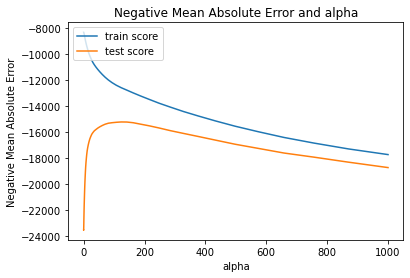

In [193]:
# plotting mean test and train scoes with alpha 
lasso_model_cv_results['param_alpha'] = lasso_model_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_train_score'])
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [194]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 123.28467394420659}
-15228.226482656866


## optimum value of alpha is 123.28

In [195]:
alpha = 123.28
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=123.28)

In [196]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso.predict(X_test)
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 114
MSE Test 342387869.4554236
MAE Score Test 12836.11508196909
R2 Score Test 0.9412633513044889 

MSE Test 561578223.1792955
MAE Score Test 15127.811933617455
R2 Score Test 0.8985898332094335 



(561578223.1792955, 15127.811933617455, 0.8985898332094335)

In [197]:
y_pred = lasso.predict(X_test)
residual = y_test - y_pred

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

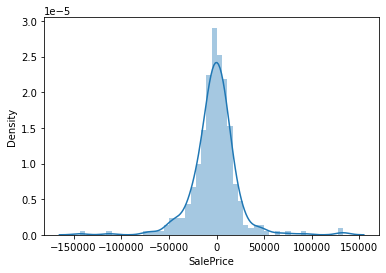

In [198]:
sns.distplot(residual)

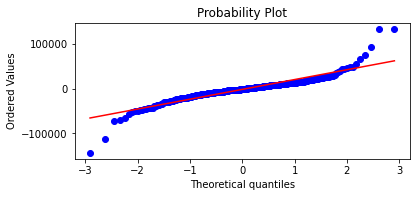

In [199]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

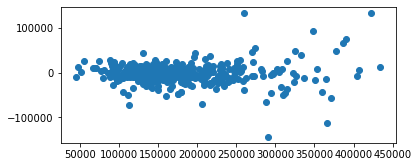

In [200]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

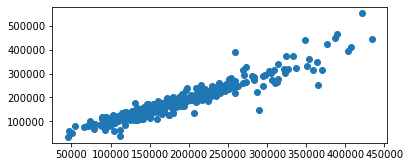

In [201]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

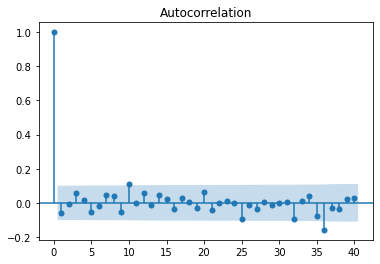

In [202]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

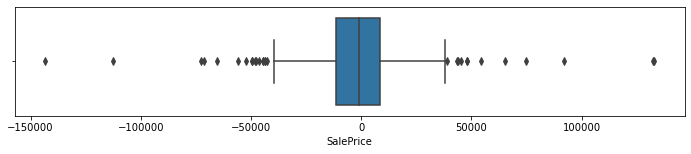

In [203]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

## observe the changes in the coefficients after regularization

In [204]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [205]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [206]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge  \
LotFrontage                                          9485.869311   
LotArea                                             13134.311106   
MasVnrArea                                          19541.493175   
BsmtFinSF1                                          34208.391836   
BsmtFinSF2                                           3971.643038   
BsmtUnfSF                                           17929.586895   
TotalBsmtSF                                         37614.445838   
1stFlrSF                                            44205.630621   
2ndFlrSF                                            20642.706597   
LowQualFinSF                                            0.000000   
GrLivArea                                           51778.507981   
BsmtFullBath                                         4022.492468   
BsmtHalfBath                                         1220.762518   
FullBath                                            20507.715231   
HalfBath                                            13195.819887   
BedroomAbvGr                                        -1094.227955   
KitchenAbvGr                                            0.000000   
TotRmsAbvGrd                                        30180.346974   
Fireplaces                                          11313.803961   
GarageYrBlt                                          -194.721618   
GarageCars                                          19122.854700   
GarageArea                                          25983.186301   
WoodDeckSF                                           6306.133304   
OpenPorchSF                                          9029.588748   
EnclosedPorch                                        8983.834606   
3SsnPorch                                               0.000000   
ScreenPorch                                         10782.089523   
PoolArea                                                0.000000   
MiscVal                                                 0.000000   
MSSubClass_ 1-1/2 STORY FINISHED ALL AGES             954.493159   
MSSubClass_ 1-STORY 1945 & OLDER                    -1599.093498   
MSSubClass_ 1-STORY 1946 & NEWER ALL STYLES          3018.144705   
MSSubClass_ 1-STORY PUD (Planned Unit Developme...  -1576.128549   
MSSubClass_ 1-STORY W/FINISHED ATTIC ALL AGES        4712.280808   
MSSubClass_ 2 FAMILY CONVERSION - ALL STYLES AN...  -3165.167675   
MSSubClass_ 2-1/2 STORY ALL AGES                      973.201642   
MSSubClass_ 2-STORY 1945 & OLDER                      357.916984   
MSSubClass_ 2-STORY 1946 & NEWER                     2358.883713   
MSSubClass_ 2-STORY PUD - 1946 & NEWER              -5561.600112   
MSSubClass_ DUPLEX - ALL STYLES AND AGES             -492.416177   
MSSubClass_ PUD - MULTILEVEL - INCL SPLIT LEV/F...   2612.279868   
MSSubClass_ SPLIT FOYER                             -4247.662058   
MSSubClass_ SPLIT OR MULTI-LEVEL                      -86.306196   
MSZoning_Floating Village Residential                4375.047808   
MSZoning_Residential High Density                    2850.544422   
MSZoning_Residential Low Density                     3648.297495   
MSZoning_Residential Medium Density                 -3846.074073   
Street_Street_Paved                                 -1221.892707   
Alley_Grvl                                            -88.305954   
Alley_Pave                                           3130.813625   
LotShape_LotShape_Moderately Irregular               4603.511837   
LotShape_LotShape_Regular                           -1494.261714   
LotShape_LotShape_Slightly irregular                -3636.515759   
LandContour_LandContour_Depression                   -579.811873   
LandContour_LandContour_Hillside                     5262.648715   
LandContour_LandContour_Near Flat/Level              2328.923744   
Utilities_Utilities_Electricity and Gas Only        -3838.295844   
LotConfig_LotConfig_Cul-de-sac                       7195.815236   
LotConfig_LotConfig_Frontage on 2 sides of prop

In [207]:
betas.sort_values(by=['Ridge'],ascending=False).head(20).index

Index(['GrLivArea', '1stFlrSF', 'OverallQual_Excellent', 'TotalBsmtSF',
       'BsmtFinSF1', 'TotRmsAbvGrd', 'GarageArea',
       'Neighborhood_Neighborhood_Northridge',
       'Neighborhood_Neighborhood_StoneBrook', '2ndFlrSF', 'FullBath',
       'MasVnrArea', 'GarageCars',
       'Neighborhood_Neighborhood_NorthridgeHeights',
       'Neighborhood_Neighborhood_Crawford', 'BsmtUnfSF', 'YearRemodAdd_2009',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'Functional_Typ'],
      dtype='object')

In [208]:
top10varailbes = betas.sort_values(by=['Lasso'],ascending=False).head(10).index.tolist()
top10varailbes

['GrLivArea',
 'TotalBsmtSF',
 'OverallQual_Excellent',
 'OverallQual_Very Excellent',
 'BsmtFinSF1',
 'GarageArea',
 'SaleType_New',
 'Neighborhood_Neighborhood_StoneBrook',
 'YearRemodAdd_2009',
 'OverallQual_Very Good']

In [209]:
top5varailbes = betas.sort_values(by=['Lasso'],ascending=False).head(5).index.tolist()
top5varailbes

['GrLivArea',
 'TotalBsmtSF',
 'OverallQual_Excellent',
 'OverallQual_Very Excellent',
 'BsmtFinSF1']

In [210]:
betas.sort_values(by=['Lasso'],ascending=False).head(10)['Lasso']

GrLivArea                               166095.973822
TotalBsmtSF                              73843.199995
OverallQual_Excellent                    60754.135612
OverallQual_Very Excellent               33352.657531
BsmtFinSF1                               30093.613025
GarageArea                               27073.838378
SaleType_New                             25483.527508
Neighborhood_Neighborhood_StoneBrook     20700.388725
YearRemodAdd_2009                        19579.796734
OverallQual_Very Good                    19266.923717
Name: Lasso, dtype: float64

## The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Analysis

## Since Lasso helps in feature selection we are using Lasso model for Analysis

## Q1-Which variables are significant in predicting the price of a house?

- #### Variables  -  Significance Of Variable on Predication
- GrLivArea  -  166095.973822
- TotalBsmtSF  -  73843.199995
- OverallQual_Excellent  -  60754.135612
- OverallQual_Very Excellent  -  33352.657531
- BsmtFinSF1  -  30093.613025
- GarageArea  -  27073.838378
- SaleType_New  -  25483.527508
- Neighborhood_Neighborhood_StoneBrook  -  20700.388725
- YearRemodAdd_2009  -  19579.796734
- OverallQual_Very Good  -  19266.923717

##  Q2 -How well those variables describe the price of a house

#### R2 Score Train 0.9412633513044889 

#### R2 Score Test 0.8985898332094335 

## Assignment Part-II

## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [211]:
# Optimal value of alpha for ridge and lasso regression are:
# ridge - 5.72
# lasso - 123.28

In [212]:
# changes in the model if you choose double the value of alpha for both ridge and lasso shown below

In [213]:
alpha = 5.72*2
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train) 

Ridge(alpha=11.44)

In [214]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


print("Number of non-zero Coefficients {}".format(np.sum(ridge.coef_!=0)))
y_pred_train = ridge2.predict(X_train)
get_error_stats(y_train,y_pred_train,name='Train')

y_pred_test = ridge2.predict(X_test)
get_error_stats(y_test,y_pred_test,name='Test')

Number of non-zero Coefficients 428
MSE Train 341799658.645763
MAE Score Train 12487.671574347201
R2 Score Train 0.9413642588855341 

MSE Test 604053693.7884015
MAE Score Test 16091.718095949287
R2 Score Test 0.8909195846471027 



(604053693.7884015, 16091.718095949287, 0.8909195846471027)

In [215]:
alpha = 123.28 * 2
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train) 

Lasso(alpha=246.56)

In [216]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso2.predict(X_train)
get_error_stats(y_train,y_pred_train,name='Train')

y_pred_test = lasso2.predict(X_test)
get_error_stats(y_test,y_pred_test,name='Test')

Number of non-zero Coefficients 114
MSE Train 403684180.9477941
MAE Score Train 13962.86500265628
R2 Score Train 0.9307479673331338 

MSE Test 608605235.0792032
MAE Score Test 16192.663047127962
R2 Score Test 0.8900976643118711 



(608605235.0792032, 16192.663047127962, 0.8900976643118711)

In [217]:
betas2 = pd.DataFrame(index=X_train.columns)
betas2.rows = X_train.columns

In [218]:
betas2 = pd.DataFrame(index=X_train.columns)
betas2.rows = X_train.columns

In [219]:
betas2 = pd.DataFrame(index=X_train.columns)
betas2.rows = X_train.columns

In [220]:
## R2score of training data has decrease and it has increase on testing data

In [221]:
## Predictors are same but the coefficent of these predictor has changed

## Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [222]:
## The r2_score of lasso is slightly higher than lasso for the test dataset so we will choose lasso regression to solve this problem

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer:

In [223]:
top5varailbes

['GrLivArea',
 'TotalBsmtSF',
 'OverallQual_Excellent',
 'OverallQual_Very Excellent',
 'BsmtFinSF1']

In [224]:
X_train2 = X_train.drop(top5varailbes,axis=1)
X_test2 = X_test.drop(top5varailbes,axis=1)

In [225]:
alpha = 123.28
lasso_Q3 = Lasso(alpha=alpha)
lasso_Q3.fit(X_train2, y_train) 

Lasso(alpha=123.28)

In [226]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train2 = lasso_Q3.predict(X_train2)
get_error_stats(y_train,y_pred_train,name='Train')

y_pred_test2 = lasso_Q3.predict(X_test2)
get_error_stats(y_test,y_pred_test,name='Test')

Number of non-zero Coefficients 114
MSE Train 403684180.9477941
MAE Score Train 13962.86500265628
R2 Score Train 0.9307479673331338 

MSE Test 608605235.0792032
MAE Score Test 16192.663047127962
R2 Score Test 0.8900976643118711 



(608605235.0792032, 16192.663047127962, 0.8900976643118711)

In [227]:
betas3 = pd.DataFrame(index=X_train2.columns)
betas3.rows = X_train2.columns

In [228]:
betas3['Lasso'] = lasso_Q3.coef_

In [229]:
pd.set_option('display.max_rows', None)
betas3.head(68)

Lasso
LotFrontage                                              0.000000
LotArea                                               8309.482968
MasVnrArea                                           19234.790594
BsmtFinSF2                                              -0.000000
BsmtUnfSF                                               -0.000000
1stFlrSF                                            212735.789516
2ndFlrSF                                             66555.979214
LowQualFinSF                                             0.000000
BsmtFullBath                                          7873.683419
BsmtHalfBath                                          1077.374763
FullBath                                             11561.220742
HalfBath                                              9332.687301
BedroomAbvGr                                            -0.000000
KitchenAbvGr                                             0.000000
TotRmsAbvGrd                                         19369.780981
Fireplaces                                           13188.808356
GarageYrBlt                                              0.000000
GarageCars                                           13658.396730
GarageArea                                           34062.730378
WoodDeckSF                                            3628.238123
OpenPorchSF                                           3124.828753
EnclosedPorch                                            0.000000
3SsnPorch                                                0.000000
ScreenPorch                                          11131.733284
PoolArea                                                 0.000000
MiscVal                                                  0.000000
MSSubClass_ 1-1/2 STORY FINISHED ALL AGES               -0.000000
MSSubClass_ 1-STORY 1945 & OLDER                      -175.798728
MSSubClass_ 1-STORY 1946 & NEWER ALL STYLES            229.687498
MSSubClass_ 1-STORY PUD (Planned Unit Developme...      -0.000000
MSSubClass_ 1-STORY W/FINISHED ATTIC ALL AGES            0.000000
MSSubClass_ 2 FAMILY CONVERSION - ALL STYLES AN...      -0.000000
MSSubClass_ 2-1/2 STORY ALL AGES                         0.000000
MSSubClass_ 2-STORY 1945 & OLDER                         0.000000
MSSubClass_ 2-STORY 1946 & NEWER                      3980.902070
MSSubClass_ 2-STORY PUD - 1946 & NEWER                  -0.000000
MSSubClass_ DUPLEX - ALL STYLES AND AGES                 0.000000
MSSubClass_ PUD - MULTILEVEL - INCL SPLIT LEV/F...       0.000000
MSSubClass_ SPLIT FOYER                                 -0.000000
MSSubClass_ SPLIT OR MULTI-LEVEL                        -0.000000
MSZoning_Floating Village Residential                    0.000000
MSZoning_Residential High Density                        0.000000
MSZoning_Residential Low Density                         0.000000
MSZoning_Residential Medium Density                  -5371.964745
Street_Street_Paved                                     -0.000000
Alley_Grvl                                              -0.000000
Alley_Pave                                               0.000000
LotShape_LotShape_Moderately Irregular                3066.460779
LotShape_LotShape_Regular                               -0.000000
LotShape_LotShape_Slightly irregular                    -0.000000
LandContour_LandContour_Depression                      -0.000000
LandContour_LandContour_Hillside                       774.704582
LandContour_LandContour_Near Flat/Level                  0.000000
Utilities_Utilities_Electricity and Gas Only            -0.000000
LotConfig_LotConfig_Cul-de-sac                        5134.676843
LotConfig_LotConfig_Frontage on 2 sides of prop...   -1537.100922
LotConfig_LotConfig_Frontage on 3 sides of prop...       0.000000
LotConfig_LotConfig_Inside lot                       -1230.090711
LandSlope_LandSlope_Moderate Slope                       0.000000
LandSlope_LandSlope_Severe Slope                        -0.000000
Neighborhood_Neighborhood_Blooming

In [230]:
betas3.sort_values(by=['Lasso'],ascending=False).head(5).index.tolist()

['1stFlrSF',
 '2ndFlrSF',
 'Neighborhood_Neighborhood_StoneBrook',
 'GarageArea',
 'Neighborhood_Neighborhood_NorthridgeHeights']

## 1stFlrSF, 2ndFlrSF, Neighborhood_Neighborhood_StoneBrook GarageArea, Neighborhood_Neighborhood_NorthridgeHeights are next five important predictor variables

## Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### The model should be generalized so that the test accuracy is not lesser than the training score. The model should be accurate for datasets other than the ones which were used during training. Too much importance should not given to the outliers so that the accuracy predicted by the model is high. To ensure that this is not the case, the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained. Those outliers which  it does not make sense to keep must be removed from the dataset. If the model is not robust, It cannot be trusted for predictive analysis.